# Logistic Regression

## The data

我们将建立一个逻辑回归模型来预测一个学生是否被大学录取。假设你是一个大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训例子，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率。

In [1]:
#三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pdData.shape

(100, 3)

Text(0, 0.5, 'Exam 2 Score')

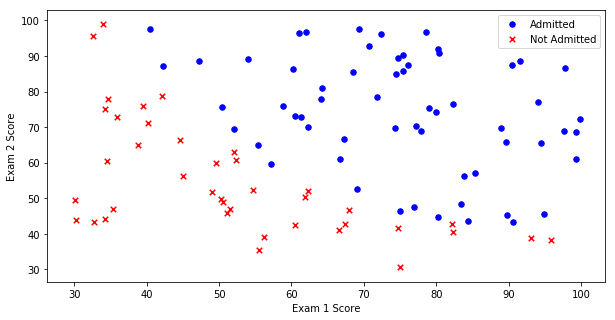

In [4]:
positive = pdData[pdData['Admitted'] == 1] # returns the subset of rows such Admitted = 1, i.e. the set of *positive* examples
negative = pdData[pdData['Admitted'] == 0] # returns the subset of rows such Admitted = 0, i.e. the set of *negative* examples

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

## The logistic regression

目标：建立分类器（求解出三个参数 $\theta_0         \theta_1         \theta_2 $）


设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

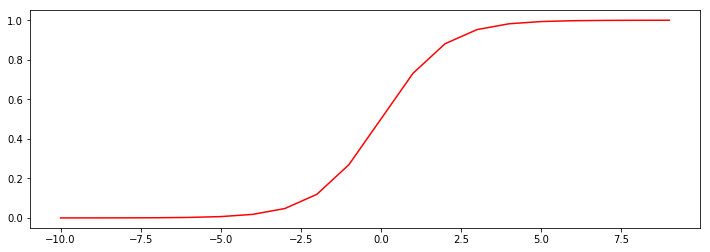

In [6]:
nums = np.arange(-10, 10, step=1) #creates a vector containing 20 equally spaced values from -10 to 10
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'r')

### Sigmoid
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$

In [7]:
def model(X, theta):
    
    return sigmoid(np.dot(X, theta.T))

$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [8]:

pdData.insert(0, 'Ones', 1) # in a try / except structure so as not to return an error if the block si executed several times


# set X (training data) and y (target variable)
orig_data = pdData.as_matrix() # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
#X = np.matrix(X.values)
#y = np.matrix(data.iloc[:,3:4].values) #np.array(y.values)
theta = np.zeros([1, 3])

D:\python3.6.3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
theta

array([[0., 0., 0.]])

In [10]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [11]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [12]:
theta

array([[0., 0., 0.]])

In [13]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

### 损失函数
将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [14]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [15]:
cost(X, y, theta)

0.6931471805599453

In [16]:
theta

array([[0., 0., 0.]])

### 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$


In [17]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad

In [18]:
g=gradient(X,y,theta)
g

array([[ -0.1       , -12.00921659, -11.26284221]])

### Gradient descent

比较3中不同梯度下降方法


In [19]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [20]:
import numpy.random
#洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [21]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 
        print("梯度",grad)

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [22]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)#
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

### 不同的停止策略

#### 设定迭代次数

In [23]:
#选择的梯度下降方法是基于所有样本的
n=100
# runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

#### 根据损失值停止

设定阈值 1E-6, 差不多需要110 000次迭代 

In [24]:
# runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

#### 根据梯度变化停止

设定阈值 0.05,差不多需要40 000次迭代

梯度 [[ -0.1        -12.00921659 -11.26284221]]
梯度 [[ 0.21820921  9.53338767 10.35761809]]
梯度 [[-0.04467439 -8.15015531 -7.527847  ]]
梯度 [[0.17523796 6.7391209  7.44519439]]
梯度 [[-0.0207111  -6.45142352 -5.93789928]]
梯度 [[0.15456392 5.40724549 6.01349601]]
梯度 [[-0.00543921 -5.35839559 -4.93568308]]
梯度 [[0.14083215 4.52994598 5.05006328]]
梯度 [[ 0.00565456 -4.5600275  -4.21256097]]
梯度 [[0.13062658 3.88180512 4.32776662]]
梯度 [[ 0.01429115 -3.93691633 -3.65164169]]
梯度 [[0.12256947 3.37199882 3.75426185]]
梯度 [[ 0.02130512 -3.43066095 -3.19672454]]
梯度 [[0.11596729 2.95501935 3.28265228]]
梯度 [[ 0.0271614  -3.00840225 -2.81680905]]
梯度 [[0.11042271 2.60498193 2.88580975]]
梯度 [[ 0.03214459 -2.64981185 -2.49311846]]
梯度 [[0.10568697 2.30582231 2.54657461]]
梯度 [[ 0.03644166 -2.34139704 -2.21344928]]
梯度 [[0.10159353 2.04688959 2.25334089]]
梯度 [[ 0.04018249 -2.07369456 -1.96940706]]
梯度 [[0.09802481 1.82073512 1.99783288]]
梯度 [[ 0.04346158 -1.83976403 -1.7549364 ]]
梯度 [[0.09489405 1.62191213 1.77389076]

梯度 [[ 0.06969429 -0.00050068 -0.00055921]]
梯度 [[ 0.06969418 -0.00046728 -0.00052498]]
梯度 [[ 0.06969311 -0.00049881 -0.00055729]]
梯度 [[ 0.06969295 -0.00046904 -0.00052677]]
梯度 [[ 0.06969194 -0.00049714 -0.00055558]]
梯度 [[ 0.06969173 -0.0004706  -0.00052837]]
梯度 [[ 0.06969076 -0.00049565 -0.00055405]]
梯度 [[ 0.06969051 -0.00047199 -0.0005298 ]]
梯度 [[ 0.06968957 -0.00049432 -0.00055269]]
梯度 [[ 0.06968929 -0.00047323 -0.00053107]]
梯度 [[ 0.06968839 -0.00049313 -0.00055147]]
梯度 [[ 0.06968807 -0.00047434 -0.0005322 ]]
梯度 [[ 0.0696872  -0.00049207 -0.00055039]]
梯度 [[ 0.06968685 -0.00047532 -0.00053321]]
梯度 [[ 0.06968602 -0.00049113 -0.00054942]]
梯度 [[ 0.06968564 -0.0004762  -0.00053411]]
梯度 [[ 0.06968483 -0.00049029 -0.00054855]]
梯度 [[ 0.06968443 -0.00047698 -0.00053491]]
梯度 [[ 0.06968364 -0.00048954 -0.00054778]]
梯度 [[ 0.06968321 -0.00047767 -0.00053562]]
梯度 [[ 0.06968245 -0.00048887 -0.00054709]]
梯度 [[ 0.069682   -0.00047829 -0.00053625]]
梯度 [[ 0.06968125 -0.00048827 -0.00054648]]
梯度 [[ 0.069

梯度 [[ 0.0695295  -0.00048251 -0.00054041]]
梯度 [[ 0.0695289  -0.00048251 -0.0005404 ]]
梯度 [[ 0.0695283 -0.0004825 -0.0005404]]
梯度 [[ 0.0695277  -0.0004825  -0.00054039]]
梯度 [[ 0.0695271  -0.0004825  -0.00054039]]
梯度 [[ 0.0695265  -0.00048249 -0.00054039]]
梯度 [[ 0.0695259  -0.00048249 -0.00054038]]
梯度 [[ 0.0695253  -0.00048248 -0.00054038]]
梯度 [[ 0.0695247  -0.00048248 -0.00054037]]
梯度 [[ 0.0695241  -0.00048248 -0.00054037]]
梯度 [[ 0.0695235  -0.00048247 -0.00054036]]
梯度 [[ 0.06952291 -0.00048247 -0.00054036]]
梯度 [[ 0.06952231 -0.00048247 -0.00054036]]
梯度 [[ 0.06952171 -0.00048246 -0.00054035]]
梯度 [[ 0.06952111 -0.00048246 -0.00054035]]
梯度 [[ 0.06952051 -0.00048246 -0.00054034]]
梯度 [[ 0.06951991 -0.00048245 -0.00054034]]
梯度 [[ 0.06951931 -0.00048245 -0.00054033]]
梯度 [[ 0.06951871 -0.00048245 -0.00054033]]
梯度 [[ 0.06951811 -0.00048244 -0.00054033]]
梯度 [[ 0.06951751 -0.00048244 -0.00054032]]
梯度 [[ 0.06951691 -0.00048243 -0.00054032]]
梯度 [[ 0.06951631 -0.00048243 -0.00054031]]
梯度 [[ 0.069515

梯度 [[ 0.0693403  -0.00048137 -0.00053903]]
梯度 [[ 0.0693397  -0.00048137 -0.00053903]]
梯度 [[ 0.06933911 -0.00048137 -0.00053902]]
梯度 [[ 0.06933851 -0.00048136 -0.00053902]]
梯度 [[ 0.06933791 -0.00048136 -0.00053901]]
梯度 [[ 0.06933731 -0.00048136 -0.00053901]]
梯度 [[ 0.06933671 -0.00048135 -0.00053901]]
梯度 [[ 0.06933612 -0.00048135 -0.000539  ]]
梯度 [[ 0.06933552 -0.00048134 -0.000539  ]]
梯度 [[ 0.06933492 -0.00048134 -0.00053899]]
梯度 [[ 0.06933432 -0.00048134 -0.00053899]]
梯度 [[ 0.06933373 -0.00048133 -0.00053898]]
梯度 [[ 0.06933313 -0.00048133 -0.00053898]]
梯度 [[ 0.06933253 -0.00048133 -0.00053897]]
梯度 [[ 0.06933193 -0.00048132 -0.00053897]]
梯度 [[ 0.06933133 -0.00048132 -0.00053897]]
梯度 [[ 0.06933074 -0.00048132 -0.00053896]]
梯度 [[ 0.06933014 -0.00048131 -0.00053896]]
梯度 [[ 0.06932954 -0.00048131 -0.00053895]]
梯度 [[ 0.06932894 -0.0004813  -0.00053895]]
梯度 [[ 0.06932834 -0.0004813  -0.00053894]]
梯度 [[ 0.06932775 -0.0004813  -0.00053894]]
梯度 [[ 0.06932715 -0.00048129 -0.00053894]]
梯度 [[ 0.069

梯度 [[ 0.06912893 -0.0004801  -0.00053749]]
梯度 [[ 0.06912833 -0.0004801  -0.00053749]]
梯度 [[ 0.06912774 -0.0004801  -0.00053748]]
梯度 [[ 0.06912714 -0.00048009 -0.00053748]]
梯度 [[ 0.06912655 -0.00048009 -0.00053747]]
梯度 [[ 0.06912595 -0.00048008 -0.00053747]]
梯度 [[ 0.06912535 -0.00048008 -0.00053747]]
梯度 [[ 0.06912476 -0.00048008 -0.00053746]]
梯度 [[ 0.06912416 -0.00048007 -0.00053746]]
梯度 [[ 0.06912357 -0.00048007 -0.00053745]]
梯度 [[ 0.06912297 -0.00048007 -0.00053745]]
梯度 [[ 0.06912237 -0.00048006 -0.00053744]]
梯度 [[ 0.06912178 -0.00048006 -0.00053744]]
梯度 [[ 0.06912118 -0.00048006 -0.00053744]]
梯度 [[ 0.06912058 -0.00048005 -0.00053743]]
梯度 [[ 0.06911999 -0.00048005 -0.00053743]]
梯度 [[ 0.06911939 -0.00048005 -0.00053742]]
梯度 [[ 0.0691188  -0.00048004 -0.00053742]]
梯度 [[ 0.0691182  -0.00048004 -0.00053741]]
梯度 [[ 0.0691176  -0.00048003 -0.00053741]]
梯度 [[ 0.06911701 -0.00048003 -0.0005374 ]]
梯度 [[ 0.06911641 -0.00048003 -0.0005374 ]]
梯度 [[ 0.06911582 -0.00048002 -0.0005374 ]]
梯度 [[ 0.069

梯度 [[ 0.06891461 -0.00047881 -0.00053593]]
梯度 [[ 0.06891401 -0.00047881 -0.00053592]]
梯度 [[ 0.06891342 -0.00047881 -0.00053592]]
梯度 [[ 0.06891282 -0.0004788  -0.00053592]]
梯度 [[ 0.06891223 -0.0004788  -0.00053591]]
梯度 [[ 0.06891163 -0.0004788  -0.00053591]]
梯度 [[ 0.06891104 -0.00047879 -0.0005359 ]]
梯度 [[ 0.06891045 -0.00047879 -0.0005359 ]]
梯度 [[ 0.06890985 -0.00047878 -0.00053589]]
梯度 [[ 0.06890926 -0.00047878 -0.00053589]]
梯度 [[ 0.06890866 -0.00047878 -0.00053589]]
梯度 [[ 0.06890807 -0.00047877 -0.00053588]]
梯度 [[ 0.06890747 -0.00047877 -0.00053588]]
梯度 [[ 0.06890688 -0.00047877 -0.00053587]]
梯度 [[ 0.06890629 -0.00047876 -0.00053587]]
梯度 [[ 0.06890569 -0.00047876 -0.00053586]]
梯度 [[ 0.0689051  -0.00047876 -0.00053586]]
梯度 [[ 0.0689045  -0.00047875 -0.00053586]]
梯度 [[ 0.06890391 -0.00047875 -0.00053585]]
梯度 [[ 0.06890331 -0.00047875 -0.00053585]]
梯度 [[ 0.06890272 -0.00047874 -0.00053584]]
梯度 [[ 0.06890212 -0.00047874 -0.00053584]]
梯度 [[ 0.06890153 -0.00047873 -0.00053583]]
梯度 [[ 0.068

梯度 [[ 0.06869263 -0.00047748 -0.00053431]]
梯度 [[ 0.06869203 -0.00047747 -0.0005343 ]]
梯度 [[ 0.06869144 -0.00047747 -0.0005343 ]]
梯度 [[ 0.06869085 -0.00047747 -0.0005343 ]]
梯度 [[ 0.06869025 -0.00047746 -0.00053429]]
梯度 [[ 0.06868966 -0.00047746 -0.00053429]]
梯度 [[ 0.06868907 -0.00047746 -0.00053428]]
梯度 [[ 0.06868848 -0.00047745 -0.00053428]]
梯度 [[ 0.06868788 -0.00047745 -0.00053427]]
梯度 [[ 0.06868729 -0.00047745 -0.00053427]]
梯度 [[ 0.0686867  -0.00047744 -0.00053427]]
梯度 [[ 0.06868611 -0.00047744 -0.00053426]]
梯度 [[ 0.06868551 -0.00047743 -0.00053426]]
梯度 [[ 0.06868492 -0.00047743 -0.00053425]]
梯度 [[ 0.06868433 -0.00047743 -0.00053425]]
梯度 [[ 0.06868374 -0.00047742 -0.00053424]]
梯度 [[ 0.06868314 -0.00047742 -0.00053424]]
梯度 [[ 0.06868255 -0.00047742 -0.00053424]]
梯度 [[ 0.06868196 -0.00047741 -0.00053423]]
梯度 [[ 0.06868137 -0.00047741 -0.00053423]]
梯度 [[ 0.06868077 -0.00047741 -0.00053422]]
梯度 [[ 0.06868018 -0.0004774  -0.00053422]]
梯度 [[ 0.06867959 -0.0004774  -0.00053421]]
梯度 [[ 0.068

梯度 [[ 0.06849438 -0.00047628 -0.00053286]]
梯度 [[ 0.06849379 -0.00047628 -0.00053286]]
梯度 [[ 0.0684932  -0.00047628 -0.00053285]]
梯度 [[ 0.06849261 -0.00047627 -0.00053285]]
梯度 [[ 0.06849202 -0.00047627 -0.00053284]]
梯度 [[ 0.06849143 -0.00047627 -0.00053284]]
梯度 [[ 0.06849084 -0.00047626 -0.00053283]]
梯度 [[ 0.06849024 -0.00047626 -0.00053283]]
梯度 [[ 0.06848965 -0.00047626 -0.00053283]]
梯度 [[ 0.06848906 -0.00047625 -0.00053282]]
梯度 [[ 0.06848847 -0.00047625 -0.00053282]]
梯度 [[ 0.06848788 -0.00047625 -0.00053281]]
梯度 [[ 0.06848729 -0.00047624 -0.00053281]]
梯度 [[ 0.0684867  -0.00047624 -0.0005328 ]]
梯度 [[ 0.06848611 -0.00047623 -0.0005328 ]]
梯度 [[ 0.06848552 -0.00047623 -0.0005328 ]]
梯度 [[ 0.06848493 -0.00047623 -0.00053279]]
梯度 [[ 0.06848434 -0.00047622 -0.00053279]]
梯度 [[ 0.06848374 -0.00047622 -0.00053278]]
梯度 [[ 0.06848315 -0.00047622 -0.00053278]]
梯度 [[ 0.06848256 -0.00047621 -0.00053277]]
梯度 [[ 0.06848197 -0.00047621 -0.00053277]]
梯度 [[ 0.06848138 -0.00047621 -0.00053277]]
梯度 [[ 0.068

梯度 [[ 0.06829964 -0.00047511 -0.00053144]]
梯度 [[ 0.06829905 -0.00047511 -0.00053143]]
梯度 [[ 0.06829846 -0.0004751  -0.00053143]]
梯度 [[ 0.06829788 -0.0004751  -0.00053142]]
梯度 [[ 0.06829729 -0.0004751  -0.00053142]]
梯度 [[ 0.0682967  -0.00047509 -0.00053142]]
梯度 [[ 0.06829611 -0.00047509 -0.00053141]]
梯度 [[ 0.06829552 -0.00047509 -0.00053141]]
梯度 [[ 0.06829493 -0.00047508 -0.0005314 ]]
梯度 [[ 0.06829434 -0.00047508 -0.0005314 ]]
梯度 [[ 0.06829375 -0.00047508 -0.00053139]]
梯度 [[ 0.06829316 -0.00047507 -0.00053139]]
梯度 [[ 0.06829257 -0.00047507 -0.00053138]]
梯度 [[ 0.06829198 -0.00047507 -0.00053138]]
梯度 [[ 0.06829139 -0.00047506 -0.00053138]]
梯度 [[ 0.0682908  -0.00047506 -0.00053137]]
梯度 [[ 0.06829022 -0.00047505 -0.00053137]]
梯度 [[ 0.06828963 -0.00047505 -0.00053136]]
梯度 [[ 0.06828904 -0.00047505 -0.00053136]]
梯度 [[ 0.06828845 -0.00047504 -0.00053135]]
梯度 [[ 0.06828786 -0.00047504 -0.00053135]]
梯度 [[ 0.06828727 -0.00047504 -0.00053135]]
梯度 [[ 0.06828668 -0.00047503 -0.00053134]]
梯度 [[ 0.068

梯度 [[ 0.06816895 -0.00047432 -0.00053048]]
梯度 [[ 0.06816836 -0.00047432 -0.00053048]]
梯度 [[ 0.06816777 -0.00047432 -0.00053047]]
梯度 [[ 0.06816718 -0.00047431 -0.00053047]]
梯度 [[ 0.06816659 -0.00047431 -0.00053046]]
梯度 [[ 0.068166   -0.00047431 -0.00053046]]
梯度 [[ 0.06816542 -0.0004743  -0.00053045]]
梯度 [[ 0.06816483 -0.0004743  -0.00053045]]
梯度 [[ 0.06816424 -0.0004743  -0.00053045]]
梯度 [[ 0.06816365 -0.00047429 -0.00053044]]
梯度 [[ 0.06816306 -0.00047429 -0.00053044]]
梯度 [[ 0.06816248 -0.00047429 -0.00053043]]
梯度 [[ 0.06816189 -0.00047428 -0.00053043]]
梯度 [[ 0.0681613  -0.00047428 -0.00053042]]
梯度 [[ 0.06816071 -0.00047427 -0.00053042]]
梯度 [[ 0.06816012 -0.00047427 -0.00053042]]
梯度 [[ 0.06815954 -0.00047427 -0.00053041]]
梯度 [[ 0.06815895 -0.00047426 -0.00053041]]
梯度 [[ 0.06815836 -0.00047426 -0.0005304 ]]
梯度 [[ 0.06815777 -0.00047426 -0.0005304 ]]
梯度 [[ 0.06815718 -0.00047425 -0.00053039]]
梯度 [[ 0.06815659 -0.00047425 -0.00053039]]
梯度 [[ 0.06815601 -0.00047425 -0.00053039]]
梯度 [[ 0.068

梯度 [[ 0.06804202 -0.00047356 -0.00052955]]
梯度 [[ 0.06804143 -0.00047356 -0.00052955]]
梯度 [[ 0.06804084 -0.00047355 -0.00052954]]
梯度 [[ 0.06804026 -0.00047355 -0.00052954]]
梯度 [[ 0.06803967 -0.00047355 -0.00052953]]
梯度 [[ 0.06803908 -0.00047354 -0.00052953]]
梯度 [[ 0.0680385  -0.00047354 -0.00052952]]
梯度 [[ 0.06803791 -0.00047353 -0.00052952]]
梯度 [[ 0.06803732 -0.00047353 -0.00052952]]
梯度 [[ 0.06803673 -0.00047353 -0.00052951]]
梯度 [[ 0.06803615 -0.00047352 -0.00052951]]
梯度 [[ 0.06803556 -0.00047352 -0.0005295 ]]
梯度 [[ 0.06803497 -0.00047352 -0.0005295 ]]
梯度 [[ 0.06803439 -0.00047351 -0.00052949]]
梯度 [[ 0.0680338  -0.00047351 -0.00052949]]
梯度 [[ 0.06803321 -0.00047351 -0.00052949]]
梯度 [[ 0.06803263 -0.0004735  -0.00052948]]
梯度 [[ 0.06803204 -0.0004735  -0.00052948]]
梯度 [[ 0.06803145 -0.0004735  -0.00052947]]
梯度 [[ 0.06803086 -0.00047349 -0.00052947]]
梯度 [[ 0.06803028 -0.00047349 -0.00052946]]
梯度 [[ 0.06802969 -0.00047348 -0.00052946]]
梯度 [[ 0.0680291  -0.00047348 -0.00052946]]
梯度 [[ 0.068

梯度 [[ 0.06791591 -0.0004728  -0.00052863]]
梯度 [[ 0.06791533 -0.0004728  -0.00052862]]
梯度 [[ 0.06791474 -0.00047279 -0.00052862]]
梯度 [[ 0.06791415 -0.00047279 -0.00052861]]
梯度 [[ 0.06791357 -0.00047278 -0.00052861]]
梯度 [[ 0.06791298 -0.00047278 -0.00052861]]
梯度 [[ 0.0679124  -0.00047278 -0.0005286 ]]
梯度 [[ 0.06791181 -0.00047277 -0.0005286 ]]
梯度 [[ 0.06791123 -0.00047277 -0.00052859]]
梯度 [[ 0.06791064 -0.00047277 -0.00052859]]
梯度 [[ 0.06791005 -0.00047276 -0.00052858]]
梯度 [[ 0.06790947 -0.00047276 -0.00052858]]
梯度 [[ 0.06790888 -0.00047276 -0.00052858]]
梯度 [[ 0.0679083  -0.00047275 -0.00052857]]
梯度 [[ 0.06790771 -0.00047275 -0.00052857]]
梯度 [[ 0.06790712 -0.00047275 -0.00052856]]
梯度 [[ 0.06790654 -0.00047274 -0.00052856]]
梯度 [[ 0.06790595 -0.00047274 -0.00052855]]
梯度 [[ 0.06790537 -0.00047274 -0.00052855]]
梯度 [[ 0.06790478 -0.00047273 -0.00052855]]
梯度 [[ 0.06790419 -0.00047273 -0.00052854]]
梯度 [[ 0.06790361 -0.00047272 -0.00052854]]
梯度 [[ 0.06790302 -0.00047272 -0.00052853]]
梯度 [[ 0.067

梯度 [[ 0.0677918  -0.00047205 -0.00052772]]
梯度 [[ 0.06779121 -0.00047205 -0.00052771]]
梯度 [[ 0.06779063 -0.00047204 -0.00052771]]
梯度 [[ 0.06779004 -0.00047204 -0.0005277 ]]
梯度 [[ 0.06778946 -0.00047204 -0.0005277 ]]
梯度 [[ 0.06778887 -0.00047203 -0.0005277 ]]
梯度 [[ 0.06778829 -0.00047203 -0.00052769]]
梯度 [[ 0.0677877  -0.00047203 -0.00052769]]
梯度 [[ 0.06778712 -0.00047202 -0.00052768]]
梯度 [[ 0.06778653 -0.00047202 -0.00052768]]
梯度 [[ 0.06778595 -0.00047202 -0.00052767]]
梯度 [[ 0.06778536 -0.00047201 -0.00052767]]
梯度 [[ 0.06778478 -0.00047201 -0.00052767]]
梯度 [[ 0.06778419 -0.000472   -0.00052766]]
梯度 [[ 0.06778361 -0.000472   -0.00052766]]
梯度 [[ 0.06778302 -0.000472   -0.00052765]]
梯度 [[ 0.06778244 -0.00047199 -0.00052765]]
梯度 [[ 0.06778185 -0.00047199 -0.00052764]]
梯度 [[ 0.06778127 -0.00047199 -0.00052764]]
梯度 [[ 0.06778068 -0.00047198 -0.00052764]]
梯度 [[ 0.0677801  -0.00047198 -0.00052763]]
梯度 [[ 0.06777951 -0.00047198 -0.00052763]]
梯度 [[ 0.06777893 -0.00047197 -0.00052762]]
梯度 [[ 0.067

梯度 [[ 0.06766849 -0.00047131 -0.00052681]]
梯度 [[ 0.06766791 -0.0004713  -0.00052681]]
梯度 [[ 0.06766733 -0.0004713  -0.0005268 ]]
梯度 [[ 0.06766674 -0.0004713  -0.0005268 ]]
梯度 [[ 0.06766616 -0.00047129 -0.0005268 ]]
梯度 [[ 0.06766557 -0.00047129 -0.00052679]]
梯度 [[ 0.06766499 -0.00047129 -0.00052679]]
梯度 [[ 0.06766441 -0.00047128 -0.00052678]]
梯度 [[ 0.06766382 -0.00047128 -0.00052678]]
梯度 [[ 0.06766324 -0.00047128 -0.00052677]]
梯度 [[ 0.06766266 -0.00047127 -0.00052677]]
梯度 [[ 0.06766207 -0.00047127 -0.00052677]]
梯度 [[ 0.06766149 -0.00047126 -0.00052676]]
梯度 [[ 0.0676609  -0.00047126 -0.00052676]]
梯度 [[ 0.06766032 -0.00047126 -0.00052675]]
梯度 [[ 0.06765974 -0.00047125 -0.00052675]]
梯度 [[ 0.06765915 -0.00047125 -0.00052674]]
梯度 [[ 0.06765857 -0.00047125 -0.00052674]]
梯度 [[ 0.06765798 -0.00047124 -0.00052674]]
梯度 [[ 0.0676574  -0.00047124 -0.00052673]]
梯度 [[ 0.06765682 -0.00047124 -0.00052673]]
梯度 [[ 0.06765623 -0.00047123 -0.00052672]]
梯度 [[ 0.06765565 -0.00047123 -0.00052672]]
梯度 [[ 0.067

梯度 [[ 0.06754483 -0.00047056 -0.0005259 ]]
梯度 [[ 0.06754425 -0.00047056 -0.0005259 ]]
梯度 [[ 0.06754367 -0.00047055 -0.0005259 ]]
梯度 [[ 0.06754309 -0.00047055 -0.00052589]]
梯度 [[ 0.0675425  -0.00047055 -0.00052589]]
梯度 [[ 0.06754192 -0.00047054 -0.00052588]]
梯度 [[ 0.06754134 -0.00047054 -0.00052588]]
梯度 [[ 0.06754075 -0.00047054 -0.00052587]]
梯度 [[ 0.06754017 -0.00047053 -0.00052587]]
梯度 [[ 0.06753959 -0.00047053 -0.00052587]]
梯度 [[ 0.06753901 -0.00047053 -0.00052586]]
梯度 [[ 0.06753842 -0.00047052 -0.00052586]]
梯度 [[ 0.06753784 -0.00047052 -0.00052585]]
梯度 [[ 0.06753726 -0.00047052 -0.00052585]]
梯度 [[ 0.06753668 -0.00047051 -0.00052584]]
梯度 [[ 0.06753609 -0.00047051 -0.00052584]]
梯度 [[ 0.06753551 -0.0004705  -0.00052584]]
梯度 [[ 0.06753493 -0.0004705  -0.00052583]]
梯度 [[ 0.06753435 -0.0004705  -0.00052583]]
梯度 [[ 0.06753376 -0.00047049 -0.00052582]]
梯度 [[ 0.06753318 -0.00047049 -0.00052582]]
梯度 [[ 0.0675326  -0.00047049 -0.00052581]]
梯度 [[ 0.06753201 -0.00047048 -0.00052581]]
梯度 [[ 0.067

梯度 [[ 0.06741675 -0.00046979 -0.00052496]]
梯度 [[ 0.06741617 -0.00046978 -0.00052496]]
梯度 [[ 0.06741559 -0.00046978 -0.00052496]]
梯度 [[ 0.06741501 -0.00046978 -0.00052495]]
梯度 [[ 0.06741443 -0.00046977 -0.00052495]]
梯度 [[ 0.06741384 -0.00046977 -0.00052494]]
梯度 [[ 0.06741326 -0.00046977 -0.00052494]]
梯度 [[ 0.06741268 -0.00046976 -0.00052493]]
梯度 [[ 0.0674121  -0.00046976 -0.00052493]]
梯度 [[ 0.06741152 -0.00046976 -0.00052493]]
梯度 [[ 0.06741094 -0.00046975 -0.00052492]]
梯度 [[ 0.06741035 -0.00046975 -0.00052492]]
梯度 [[ 0.06740977 -0.00046975 -0.00052491]]
梯度 [[ 0.06740919 -0.00046974 -0.00052491]]
梯度 [[ 0.06740861 -0.00046974 -0.0005249 ]]
梯度 [[ 0.06740803 -0.00046974 -0.0005249 ]]
梯度 [[ 0.06740745 -0.00046973 -0.0005249 ]]
梯度 [[ 0.06740686 -0.00046973 -0.00052489]]
梯度 [[ 0.06740628 -0.00046972 -0.00052489]]
梯度 [[ 0.0674057  -0.00046972 -0.00052488]]
梯度 [[ 0.06740512 -0.00046972 -0.00052488]]
梯度 [[ 0.06740454 -0.00046971 -0.00052487]]
梯度 [[ 0.06740396 -0.00046971 -0.00052487]]
梯度 [[ 0.067

梯度 [[ 0.06729588 -0.00046906 -0.00052408]]
梯度 [[ 0.0672953  -0.00046905 -0.00052407]]
梯度 [[ 0.06729472 -0.00046905 -0.00052407]]
梯度 [[ 0.06729414 -0.00046905 -0.00052406]]
梯度 [[ 0.06729356 -0.00046904 -0.00052406]]
梯度 [[ 0.06729298 -0.00046904 -0.00052405]]
梯度 [[ 0.0672924  -0.00046904 -0.00052405]]
梯度 [[ 0.06729182 -0.00046903 -0.00052405]]
梯度 [[ 0.06729124 -0.00046903 -0.00052404]]
梯度 [[ 0.06729066 -0.00046903 -0.00052404]]
梯度 [[ 0.06729008 -0.00046902 -0.00052403]]
梯度 [[ 0.0672895  -0.00046902 -0.00052403]]
梯度 [[ 0.06728892 -0.00046902 -0.00052402]]
梯度 [[ 0.06728834 -0.00046901 -0.00052402]]
梯度 [[ 0.06728776 -0.00046901 -0.00052402]]
梯度 [[ 0.06728718 -0.00046901 -0.00052401]]
梯度 [[ 0.0672866  -0.000469   -0.00052401]]
梯度 [[ 0.06728602 -0.000469   -0.000524  ]]
梯度 [[ 0.06728544 -0.000469   -0.000524  ]]
梯度 [[ 0.06728485 -0.00046899 -0.00052399]]
梯度 [[ 0.06728427 -0.00046899 -0.00052399]]
梯度 [[ 0.06728369 -0.00046898 -0.00052399]]
梯度 [[ 0.06728311 -0.00046898 -0.00052398]]
梯度 [[ 0.067

梯度 [[ 0.06718451 -0.00046839 -0.00052326]]
梯度 [[ 0.06718393 -0.00046838 -0.00052325]]
梯度 [[ 0.06718335 -0.00046838 -0.00052325]]
梯度 [[ 0.06718277 -0.00046838 -0.00052324]]
梯度 [[ 0.06718219 -0.00046837 -0.00052324]]
梯度 [[ 0.06718161 -0.00046837 -0.00052324]]
梯度 [[ 0.06718104 -0.00046836 -0.00052323]]
梯度 [[ 0.06718046 -0.00046836 -0.00052323]]
梯度 [[ 0.06717988 -0.00046836 -0.00052322]]
梯度 [[ 0.0671793  -0.00046835 -0.00052322]]
梯度 [[ 0.06717872 -0.00046835 -0.00052321]]
梯度 [[ 0.06717814 -0.00046835 -0.00052321]]
梯度 [[ 0.06717756 -0.00046834 -0.00052321]]
梯度 [[ 0.06717698 -0.00046834 -0.0005232 ]]
梯度 [[ 0.0671764  -0.00046834 -0.0005232 ]]
梯度 [[ 0.06717582 -0.00046833 -0.00052319]]
梯度 [[ 0.06717524 -0.00046833 -0.00052319]]
梯度 [[ 0.06717466 -0.00046833 -0.00052318]]
梯度 [[ 0.06717408 -0.00046832 -0.00052318]]
梯度 [[ 0.0671735  -0.00046832 -0.00052318]]
梯度 [[ 0.06717292 -0.00046832 -0.00052317]]
梯度 [[ 0.06717234 -0.00046831 -0.00052317]]
梯度 [[ 0.06717176 -0.00046831 -0.00052316]]
梯度 [[ 0.067

梯度 [[ 0.06697967 -0.00046715 -0.00052175]]
梯度 [[ 0.06697909 -0.00046714 -0.00052175]]
梯度 [[ 0.06697851 -0.00046714 -0.00052174]]
梯度 [[ 0.06697794 -0.00046714 -0.00052174]]
梯度 [[ 0.06697736 -0.00046713 -0.00052173]]
梯度 [[ 0.06697678 -0.00046713 -0.00052173]]
梯度 [[ 0.0669762  -0.00046713 -0.00052172]]
梯度 [[ 0.06697563 -0.00046712 -0.00052172]]
梯度 [[ 0.06697505 -0.00046712 -0.00052172]]
梯度 [[ 0.06697447 -0.00046712 -0.00052171]]
梯度 [[ 0.06697389 -0.00046711 -0.00052171]]
梯度 [[ 0.06697331 -0.00046711 -0.0005217 ]]
梯度 [[ 0.06697274 -0.00046711 -0.0005217 ]]
梯度 [[ 0.06697216 -0.0004671  -0.00052169]]
梯度 [[ 0.06697158 -0.0004671  -0.00052169]]
梯度 [[ 0.066971   -0.0004671  -0.00052169]]
梯度 [[ 0.06697043 -0.00046709 -0.00052168]]
梯度 [[ 0.06696985 -0.00046709 -0.00052168]]
梯度 [[ 0.06696927 -0.00046709 -0.00052167]]
梯度 [[ 0.06696869 -0.00046708 -0.00052167]]
梯度 [[ 0.06696812 -0.00046708 -0.00052166]]
梯度 [[ 0.06696754 -0.00046707 -0.00052166]]
梯度 [[ 0.06696696 -0.00046707 -0.00052166]]
梯度 [[ 0.066

梯度 [[ 0.06677893 -0.00046594 -0.00052027]]
梯度 [[ 0.06677836 -0.00046593 -0.00052027]]
梯度 [[ 0.06677778 -0.00046593 -0.00052026]]
梯度 [[ 0.0667772  -0.00046592 -0.00052026]]
梯度 [[ 0.06677663 -0.00046592 -0.00052025]]
梯度 [[ 0.06677605 -0.00046592 -0.00052025]]
梯度 [[ 0.06677548 -0.00046591 -0.00052025]]
梯度 [[ 0.0667749  -0.00046591 -0.00052024]]
梯度 [[ 0.06677433 -0.00046591 -0.00052024]]
梯度 [[ 0.06677375 -0.0004659  -0.00052023]]
梯度 [[ 0.06677317 -0.0004659  -0.00052023]]
梯度 [[ 0.0667726  -0.0004659  -0.00052022]]
梯度 [[ 0.06677202 -0.00046589 -0.00052022]]
梯度 [[ 0.06677145 -0.00046589 -0.00052022]]
梯度 [[ 0.06677087 -0.00046589 -0.00052021]]
梯度 [[ 0.06677029 -0.00046588 -0.00052021]]
梯度 [[ 0.06676972 -0.00046588 -0.0005202 ]]
梯度 [[ 0.06676914 -0.00046588 -0.0005202 ]]
梯度 [[ 0.06676857 -0.00046587 -0.0005202 ]]
梯度 [[ 0.06676799 -0.00046587 -0.00052019]]
梯度 [[ 0.06676742 -0.00046587 -0.00052019]]
梯度 [[ 0.06676684 -0.00046586 -0.00052018]]
梯度 [[ 0.06676626 -0.00046586 -0.00052018]]
梯度 [[ 0.066

梯度 [[ 0.066665   -0.00046525 -0.00051943]]
梯度 [[ 0.06666443 -0.00046524 -0.00051943]]
梯度 [[ 0.06666385 -0.00046524 -0.00051942]]
梯度 [[ 0.06666328 -0.00046524 -0.00051942]]
梯度 [[ 0.0666627  -0.00046523 -0.00051941]]
梯度 [[ 0.06666213 -0.00046523 -0.00051941]]
梯度 [[ 0.06666155 -0.00046523 -0.00051941]]
梯度 [[ 0.06666098 -0.00046522 -0.0005194 ]]
梯度 [[ 0.0666604  -0.00046522 -0.0005194 ]]
梯度 [[ 0.06665983 -0.00046521 -0.00051939]]
梯度 [[ 0.06665925 -0.00046521 -0.00051939]]
梯度 [[ 0.06665868 -0.00046521 -0.00051939]]
梯度 [[ 0.0666581  -0.0004652  -0.00051938]]
梯度 [[ 0.06665753 -0.0004652  -0.00051938]]
梯度 [[ 0.06665695 -0.0004652  -0.00051937]]
梯度 [[ 0.06665638 -0.00046519 -0.00051937]]
梯度 [[ 0.0666558  -0.00046519 -0.00051936]]
梯度 [[ 0.06665523 -0.00046519 -0.00051936]]
梯度 [[ 0.06665465 -0.00046518 -0.00051936]]
梯度 [[ 0.06665408 -0.00046518 -0.00051935]]
梯度 [[ 0.0666535  -0.00046518 -0.00051935]]
梯度 [[ 0.06665293 -0.00046517 -0.00051934]]
梯度 [[ 0.06665235 -0.00046517 -0.00051934]]
梯度 [[ 0.066

梯度 [[ 0.06645494 -0.00046398 -0.00051788]]
梯度 [[ 0.06645437 -0.00046397 -0.00051788]]
梯度 [[ 0.06645379 -0.00046397 -0.00051787]]
梯度 [[ 0.06645322 -0.00046397 -0.00051787]]
梯度 [[ 0.06645265 -0.00046396 -0.00051787]]
梯度 [[ 0.06645208 -0.00046396 -0.00051786]]
梯度 [[ 0.0664515  -0.00046395 -0.00051786]]
梯度 [[ 0.06645093 -0.00046395 -0.00051785]]
梯度 [[ 0.06645036 -0.00046395 -0.00051785]]
梯度 [[ 0.06644978 -0.00046394 -0.00051784]]
梯度 [[ 0.06644921 -0.00046394 -0.00051784]]
梯度 [[ 0.06644864 -0.00046394 -0.00051784]]
梯度 [[ 0.06644807 -0.00046393 -0.00051783]]
梯度 [[ 0.06644749 -0.00046393 -0.00051783]]
梯度 [[ 0.06644692 -0.00046393 -0.00051782]]
梯度 [[ 0.06644635 -0.00046392 -0.00051782]]
梯度 [[ 0.06644577 -0.00046392 -0.00051782]]
梯度 [[ 0.0664452  -0.00046392 -0.00051781]]
梯度 [[ 0.06644463 -0.00046391 -0.00051781]]
梯度 [[ 0.06644406 -0.00046391 -0.0005178 ]]
梯度 [[ 0.06644348 -0.00046391 -0.0005178 ]]
梯度 [[ 0.06644291 -0.0004639  -0.00051779]]
梯度 [[ 0.06644234 -0.0004639  -0.00051779]]
梯度 [[ 0.066

梯度 [[ 0.06625701 -0.00046278 -0.00051642]]
梯度 [[ 0.06625643 -0.00046277 -0.00051642]]
梯度 [[ 0.06625586 -0.00046277 -0.00051641]]
梯度 [[ 0.06625529 -0.00046277 -0.00051641]]
梯度 [[ 0.06625472 -0.00046276 -0.0005164 ]]
梯度 [[ 0.06625415 -0.00046276 -0.0005164 ]]
梯度 [[ 0.06625358 -0.00046276 -0.0005164 ]]
梯度 [[ 0.06625301 -0.00046275 -0.00051639]]
梯度 [[ 0.06625244 -0.00046275 -0.00051639]]
梯度 [[ 0.06625186 -0.00046275 -0.00051638]]
梯度 [[ 0.06625129 -0.00046274 -0.00051638]]
梯度 [[ 0.06625072 -0.00046274 -0.00051638]]
梯度 [[ 0.06625015 -0.00046274 -0.00051637]]
梯度 [[ 0.06624958 -0.00046273 -0.00051637]]
梯度 [[ 0.06624901 -0.00046273 -0.00051636]]
梯度 [[ 0.06624844 -0.00046273 -0.00051636]]
梯度 [[ 0.06624787 -0.00046272 -0.00051635]]
梯度 [[ 0.0662473  -0.00046272 -0.00051635]]
梯度 [[ 0.06624673 -0.00046272 -0.00051635]]
梯度 [[ 0.06624615 -0.00046271 -0.00051634]]
梯度 [[ 0.06624558 -0.00046271 -0.00051634]]
梯度 [[ 0.06624501 -0.00046271 -0.00051633]]
梯度 [[ 0.06624444 -0.0004627  -0.00051633]]
梯度 [[ 0.066

梯度 [[ 0.06605002 -0.00046152 -0.00051489]]
梯度 [[ 0.06604945 -0.00046152 -0.00051489]]
梯度 [[ 0.06604888 -0.00046152 -0.00051488]]
梯度 [[ 0.06604831 -0.00046151 -0.00051488]]
梯度 [[ 0.06604774 -0.00046151 -0.00051488]]
梯度 [[ 0.06604718 -0.00046151 -0.00051487]]
梯度 [[ 0.06604661 -0.0004615  -0.00051487]]
梯度 [[ 0.06604604 -0.0004615  -0.00051486]]
梯度 [[ 0.06604547 -0.0004615  -0.00051486]]
梯度 [[ 0.0660449  -0.00046149 -0.00051485]]
梯度 [[ 0.06604433 -0.00046149 -0.00051485]]
梯度 [[ 0.06604376 -0.00046149 -0.00051485]]
梯度 [[ 0.06604319 -0.00046148 -0.00051484]]
梯度 [[ 0.06604262 -0.00046148 -0.00051484]]
梯度 [[ 0.06604205 -0.00046148 -0.00051483]]
梯度 [[ 0.06604148 -0.00046147 -0.00051483]]
梯度 [[ 0.06604091 -0.00046147 -0.00051482]]
梯度 [[ 0.06604035 -0.00046147 -0.00051482]]
梯度 [[ 0.06603978 -0.00046146 -0.00051482]]
梯度 [[ 0.06603921 -0.00046146 -0.00051481]]
梯度 [[ 0.06603864 -0.00046146 -0.00051481]]
梯度 [[ 0.06603807 -0.00046145 -0.0005148 ]]
梯度 [[ 0.0660375  -0.00046145 -0.0005148 ]]
梯度 [[ 0.066

梯度 [[ 0.06588971 -0.00046055 -0.00051371]]
梯度 [[ 0.06588914 -0.00046055 -0.0005137 ]]
梯度 [[ 0.06588857 -0.00046055 -0.0005137 ]]
梯度 [[ 0.065888   -0.00046054 -0.00051369]]
梯度 [[ 0.06588743 -0.00046054 -0.00051369]]
梯度 [[ 0.06588687 -0.00046054 -0.00051369]]
梯度 [[ 0.0658863  -0.00046053 -0.00051368]]
梯度 [[ 0.06588573 -0.00046053 -0.00051368]]
梯度 [[ 0.06588516 -0.00046053 -0.00051367]]
梯度 [[ 0.0658846  -0.00046052 -0.00051367]]
梯度 [[ 0.06588403 -0.00046052 -0.00051366]]
梯度 [[ 0.06588346 -0.00046052 -0.00051366]]
梯度 [[ 0.06588289 -0.00046051 -0.00051366]]
梯度 [[ 0.06588233 -0.00046051 -0.00051365]]
梯度 [[ 0.06588176 -0.00046051 -0.00051365]]
梯度 [[ 0.06588119 -0.0004605  -0.00051364]]
梯度 [[ 0.06588062 -0.0004605  -0.00051364]]
梯度 [[ 0.06588005 -0.0004605  -0.00051364]]
梯度 [[ 0.06587949 -0.00046049 -0.00051363]]
梯度 [[ 0.06587892 -0.00046049 -0.00051363]]
梯度 [[ 0.06587835 -0.00046049 -0.00051362]]
梯度 [[ 0.06587778 -0.00046048 -0.00051362]]
梯度 [[ 0.06587722 -0.00046048 -0.00051361]]
梯度 [[ 0.065

梯度 [[ 0.0657015  -0.00045941 -0.00051231]]
梯度 [[ 0.06570094 -0.00045941 -0.00051231]]
梯度 [[ 0.06570037 -0.00045941 -0.00051231]]
梯度 [[ 0.06569981 -0.0004594  -0.0005123 ]]
梯度 [[ 0.06569924 -0.0004594  -0.0005123 ]]
梯度 [[ 0.06569867 -0.0004594  -0.00051229]]
梯度 [[ 0.06569811 -0.00045939 -0.00051229]]
梯度 [[ 0.06569754 -0.00045939 -0.00051228]]
梯度 [[ 0.06569698 -0.00045939 -0.00051228]]
梯度 [[ 0.06569641 -0.00045938 -0.00051228]]
梯度 [[ 0.06569585 -0.00045938 -0.00051227]]
梯度 [[ 0.06569528 -0.00045938 -0.00051227]]
梯度 [[ 0.06569471 -0.00045937 -0.00051226]]
梯度 [[ 0.06569415 -0.00045937 -0.00051226]]
梯度 [[ 0.06569358 -0.00045937 -0.00051226]]
梯度 [[ 0.06569302 -0.00045936 -0.00051225]]
梯度 [[ 0.06569245 -0.00045936 -0.00051225]]
梯度 [[ 0.06569188 -0.00045936 -0.00051224]]
梯度 [[ 0.06569132 -0.00045935 -0.00051224]]
梯度 [[ 0.06569075 -0.00045935 -0.00051223]]
梯度 [[ 0.06569019 -0.00045935 -0.00051223]]
梯度 [[ 0.06568962 -0.00045934 -0.00051223]]
梯度 [[ 0.06568905 -0.00045934 -0.00051222]]
梯度 [[ 0.065

梯度 [[ 0.06551671 -0.00045829 -0.00051095]]
梯度 [[ 0.06551615 -0.00045829 -0.00051094]]
梯度 [[ 0.06551558 -0.00045829 -0.00051094]]
梯度 [[ 0.06551502 -0.00045828 -0.00051093]]
梯度 [[ 0.06551445 -0.00045828 -0.00051093]]
梯度 [[ 0.06551389 -0.00045828 -0.00051092]]
梯度 [[ 0.06551333 -0.00045827 -0.00051092]]
梯度 [[ 0.06551276 -0.00045827 -0.00051092]]
梯度 [[ 0.0655122  -0.00045827 -0.00051091]]
梯度 [[ 0.06551163 -0.00045826 -0.00051091]]
梯度 [[ 0.06551107 -0.00045826 -0.0005109 ]]
梯度 [[ 0.06551051 -0.00045826 -0.0005109 ]]
梯度 [[ 0.06550994 -0.00045825 -0.0005109 ]]
梯度 [[ 0.06550938 -0.00045825 -0.00051089]]
梯度 [[ 0.06550881 -0.00045825 -0.00051089]]
梯度 [[ 0.06550825 -0.00045824 -0.00051088]]
梯度 [[ 0.06550768 -0.00045824 -0.00051088]]
梯度 [[ 0.06550712 -0.00045824 -0.00051087]]
梯度 [[ 0.06550656 -0.00045823 -0.00051087]]
梯度 [[ 0.06550599 -0.00045823 -0.00051087]]
梯度 [[ 0.06550543 -0.00045822 -0.00051086]]
梯度 [[ 0.06550486 -0.00045822 -0.00051086]]
梯度 [[ 0.0655043  -0.00045822 -0.00051085]]
梯度 [[ 0.065

梯度 [[ 0.06533136 -0.00045717 -0.00050957]]
梯度 [[ 0.0653308  -0.00045717 -0.00050957]]
梯度 [[ 0.06533024 -0.00045716 -0.00050956]]
梯度 [[ 0.06532968 -0.00045716 -0.00050956]]
梯度 [[ 0.06532911 -0.00045716 -0.00050955]]
梯度 [[ 0.06532855 -0.00045715 -0.00050955]]
梯度 [[ 0.06532799 -0.00045715 -0.00050955]]
梯度 [[ 0.06532743 -0.00045715 -0.00050954]]
梯度 [[ 0.06532686 -0.00045714 -0.00050954]]
梯度 [[ 0.0653263  -0.00045714 -0.00050953]]
梯度 [[ 0.06532574 -0.00045714 -0.00050953]]
梯度 [[ 0.06532518 -0.00045713 -0.00050953]]
梯度 [[ 0.06532461 -0.00045713 -0.00050952]]
梯度 [[ 0.06532405 -0.00045712 -0.00050952]]
梯度 [[ 0.06532349 -0.00045712 -0.00050951]]
梯度 [[ 0.06532293 -0.00045712 -0.00050951]]
梯度 [[ 0.06532236 -0.00045711 -0.0005095 ]]
梯度 [[ 0.0653218  -0.00045711 -0.0005095 ]]
梯度 [[ 0.06532124 -0.00045711 -0.0005095 ]]
梯度 [[ 0.06532068 -0.0004571  -0.00050949]]
梯度 [[ 0.06532012 -0.0004571  -0.00050949]]
梯度 [[ 0.06531955 -0.0004571  -0.00050948]]
梯度 [[ 0.06531899 -0.00045709 -0.00050948]]
梯度 [[ 0.065

梯度 [[ 0.06513987 -0.00045601 -0.00050815]]
梯度 [[ 0.06513931 -0.000456   -0.00050815]]
梯度 [[ 0.06513875 -0.000456   -0.00050814]]
梯度 [[ 0.06513819 -0.000456   -0.00050814]]
梯度 [[ 0.06513762 -0.00045599 -0.00050813]]
梯度 [[ 0.06513706 -0.00045599 -0.00050813]]
梯度 [[ 0.0651365  -0.00045599 -0.00050813]]
梯度 [[ 0.06513594 -0.00045598 -0.00050812]]
梯度 [[ 0.06513538 -0.00045598 -0.00050812]]
梯度 [[ 0.06513482 -0.00045598 -0.00050811]]
梯度 [[ 0.06513426 -0.00045597 -0.00050811]]
梯度 [[ 0.0651337  -0.00045597 -0.00050811]]
梯度 [[ 0.06513314 -0.00045597 -0.0005081 ]]
梯度 [[ 0.06513258 -0.00045596 -0.0005081 ]]
梯度 [[ 0.06513202 -0.00045596 -0.00050809]]
梯度 [[ 0.06513146 -0.00045596 -0.00050809]]
梯度 [[ 0.0651309  -0.00045595 -0.00050808]]
梯度 [[ 0.06513034 -0.00045595 -0.00050808]]
梯度 [[ 0.06512978 -0.00045595 -0.00050808]]
梯度 [[ 0.06512922 -0.00045594 -0.00050807]]
梯度 [[ 0.06512866 -0.00045594 -0.00050807]]
梯度 [[ 0.06512809 -0.00045594 -0.00050806]]
梯度 [[ 0.06512753 -0.00045593 -0.00050806]]
梯度 [[ 0.065

梯度 [[ 0.06497247 -0.00045499 -0.00050691]]
梯度 [[ 0.06497191 -0.00045499 -0.0005069 ]]
梯度 [[ 0.06497135 -0.00045498 -0.0005069 ]]
梯度 [[ 0.06497079 -0.00045498 -0.0005069 ]]
梯度 [[ 0.06497023 -0.00045498 -0.00050689]]
梯度 [[ 0.06496968 -0.00045497 -0.00050689]]
梯度 [[ 0.06496912 -0.00045497 -0.00050688]]
梯度 [[ 0.06496856 -0.00045497 -0.00050688]]
梯度 [[ 0.064968   -0.00045496 -0.00050688]]
梯度 [[ 0.06496744 -0.00045496 -0.00050687]]
梯度 [[ 0.06496688 -0.00045496 -0.00050687]]
梯度 [[ 0.06496632 -0.00045495 -0.00050686]]
梯度 [[ 0.06496576 -0.00045495 -0.00050686]]
梯度 [[ 0.0649652  -0.00045495 -0.00050685]]
梯度 [[ 0.06496464 -0.00045494 -0.00050685]]
梯度 [[ 0.06496409 -0.00045494 -0.00050685]]
梯度 [[ 0.06496353 -0.00045494 -0.00050684]]
梯度 [[ 0.06496297 -0.00045493 -0.00050684]]
梯度 [[ 0.06496241 -0.00045493 -0.00050683]]
梯度 [[ 0.06496185 -0.00045493 -0.00050683]]
梯度 [[ 0.06496129 -0.00045492 -0.00050683]]
梯度 [[ 0.06496073 -0.00045492 -0.00050682]]
梯度 [[ 0.06496017 -0.00045492 -0.00050682]]
梯度 [[ 0.064

梯度 [[ 0.06479775 -0.00045393 -0.00050561]]
梯度 [[ 0.06479719 -0.00045393 -0.00050561]]
梯度 [[ 0.06479664 -0.00045392 -0.0005056 ]]
梯度 [[ 0.06479608 -0.00045392 -0.0005056 ]]
梯度 [[ 0.06479552 -0.00045392 -0.00050559]]
梯度 [[ 0.06479496 -0.00045391 -0.00050559]]
梯度 [[ 0.06479441 -0.00045391 -0.00050559]]
梯度 [[ 0.06479385 -0.00045391 -0.00050558]]
梯度 [[ 0.06479329 -0.0004539  -0.00050558]]
梯度 [[ 0.06479273 -0.0004539  -0.00050557]]
梯度 [[ 0.06479218 -0.0004539  -0.00050557]]
梯度 [[ 0.06479162 -0.00045389 -0.00050556]]
梯度 [[ 0.06479106 -0.00045389 -0.00050556]]
梯度 [[ 0.06479051 -0.00045389 -0.00050556]]
梯度 [[ 0.06478995 -0.00045388 -0.00050555]]
梯度 [[ 0.06478939 -0.00045388 -0.00050555]]
梯度 [[ 0.06478883 -0.00045388 -0.00050554]]
梯度 [[ 0.06478828 -0.00045387 -0.00050554]]
梯度 [[ 0.06478772 -0.00045387 -0.00050554]]
梯度 [[ 0.06478716 -0.00045387 -0.00050553]]
梯度 [[ 0.0647866  -0.00045386 -0.00050553]]
梯度 [[ 0.06478605 -0.00045386 -0.00050552]]
梯度 [[ 0.06478549 -0.00045386 -0.00050552]]
梯度 [[ 0.064

梯度 [[ 0.064603   -0.00045275 -0.00050416]]
梯度 [[ 0.06460245 -0.00045274 -0.00050416]]
梯度 [[ 0.06460189 -0.00045274 -0.00050415]]
梯度 [[ 0.06460134 -0.00045274 -0.00050415]]
梯度 [[ 0.06460078 -0.00045273 -0.00050415]]
梯度 [[ 0.06460023 -0.00045273 -0.00050414]]
梯度 [[ 0.06459967 -0.00045273 -0.00050414]]
梯度 [[ 0.06459912 -0.00045272 -0.00050413]]
梯度 [[ 0.06459856 -0.00045272 -0.00050413]]
梯度 [[ 0.064598   -0.00045272 -0.00050413]]
梯度 [[ 0.06459745 -0.00045271 -0.00050412]]
梯度 [[ 0.06459689 -0.00045271 -0.00050412]]
梯度 [[ 0.06459634 -0.00045271 -0.00050411]]
梯度 [[ 0.06459578 -0.0004527  -0.00050411]]
梯度 [[ 0.06459523 -0.0004527  -0.0005041 ]]
梯度 [[ 0.06459467 -0.0004527  -0.0005041 ]]
梯度 [[ 0.06459412 -0.00045269 -0.0005041 ]]
梯度 [[ 0.06459356 -0.00045269 -0.00050409]]
梯度 [[ 0.06459301 -0.00045269 -0.00050409]]
梯度 [[ 0.06459245 -0.00045268 -0.00050408]]
梯度 [[ 0.0645919  -0.00045268 -0.00050408]]
梯度 [[ 0.06459134 -0.00045268 -0.00050408]]
梯度 [[ 0.06459078 -0.00045267 -0.00050407]]
梯度 [[ 0.064

梯度 [[ 0.06441556 -0.00045161 -0.00050277]]
梯度 [[ 0.06441501 -0.0004516  -0.00050276]]
梯度 [[ 0.06441446 -0.0004516  -0.00050276]]
梯度 [[ 0.0644139  -0.0004516  -0.00050276]]
梯度 [[ 0.06441335 -0.00045159 -0.00050275]]
梯度 [[ 0.06441279 -0.00045159 -0.00050275]]
梯度 [[ 0.06441224 -0.00045159 -0.00050274]]
梯度 [[ 0.06441169 -0.00045158 -0.00050274]]
梯度 [[ 0.06441113 -0.00045158 -0.00050273]]
梯度 [[ 0.06441058 -0.00045158 -0.00050273]]
梯度 [[ 0.06441003 -0.00045157 -0.00050273]]
梯度 [[ 0.06440947 -0.00045157 -0.00050272]]
梯度 [[ 0.06440892 -0.00045157 -0.00050272]]
梯度 [[ 0.06440837 -0.00045156 -0.00050271]]
梯度 [[ 0.06440781 -0.00045156 -0.00050271]]
梯度 [[ 0.06440726 -0.00045156 -0.00050271]]
梯度 [[ 0.06440671 -0.00045155 -0.0005027 ]]
梯度 [[ 0.06440615 -0.00045155 -0.0005027 ]]
梯度 [[ 0.0644056  -0.00045155 -0.00050269]]
梯度 [[ 0.06440504 -0.00045154 -0.00050269]]
梯度 [[ 0.06440449 -0.00045154 -0.00050269]]
梯度 [[ 0.06440394 -0.00045154 -0.00050268]]
梯度 [[ 0.06440338 -0.00045153 -0.00050268]]
梯度 [[ 0.064

梯度 [[ 0.064295   -0.00045087 -0.00050187]]
梯度 [[ 0.06429445 -0.00045087 -0.00050187]]
梯度 [[ 0.06429389 -0.00045087 -0.00050186]]
梯度 [[ 0.06429334 -0.00045086 -0.00050186]]
梯度 [[ 0.06429279 -0.00045086 -0.00050185]]
梯度 [[ 0.06429224 -0.00045086 -0.00050185]]
梯度 [[ 0.06429168 -0.00045085 -0.00050185]]
梯度 [[ 0.06429113 -0.00045085 -0.00050184]]
梯度 [[ 0.06429058 -0.00045085 -0.00050184]]
梯度 [[ 0.06429003 -0.00045084 -0.00050183]]
梯度 [[ 0.06428947 -0.00045084 -0.00050183]]
梯度 [[ 0.06428892 -0.00045084 -0.00050182]]
梯度 [[ 0.06428837 -0.00045083 -0.00050182]]
梯度 [[ 0.06428782 -0.00045083 -0.00050182]]
梯度 [[ 0.06428726 -0.00045083 -0.00050181]]
梯度 [[ 0.06428671 -0.00045082 -0.00050181]]
梯度 [[ 0.06428616 -0.00045082 -0.0005018 ]]
梯度 [[ 0.06428561 -0.00045082 -0.0005018 ]]
梯度 [[ 0.06428505 -0.00045081 -0.0005018 ]]
梯度 [[ 0.0642845  -0.00045081 -0.00050179]]
梯度 [[ 0.06428395 -0.00045081 -0.00050179]]
梯度 [[ 0.0642834  -0.0004508  -0.00050178]]
梯度 [[ 0.06428284 -0.0004508  -0.00050178]]
梯度 [[ 0.064

梯度 [[ 0.06415264 -0.00045001 -0.00050081]]
梯度 [[ 0.06415209 -0.00045001 -0.00050081]]
梯度 [[ 0.06415154 -0.00045    -0.0005008 ]]
梯度 [[ 0.06415099 -0.00045    -0.0005008 ]]
梯度 [[ 0.06415044 -0.00045    -0.00050079]]
梯度 [[ 0.06414989 -0.00044999 -0.00050079]]
梯度 [[ 0.06414934 -0.00044999 -0.00050078]]
梯度 [[ 0.06414879 -0.00044999 -0.00050078]]
梯度 [[ 0.06414824 -0.00044998 -0.00050078]]
梯度 [[ 0.06414768 -0.00044998 -0.00050077]]
梯度 [[ 0.06414713 -0.00044998 -0.00050077]]
梯度 [[ 0.06414658 -0.00044997 -0.00050076]]
梯度 [[ 0.06414603 -0.00044997 -0.00050076]]
梯度 [[ 0.06414548 -0.00044997 -0.00050076]]
梯度 [[ 0.06414493 -0.00044996 -0.00050075]]
梯度 [[ 0.06414438 -0.00044996 -0.00050075]]
梯度 [[ 0.06414383 -0.00044996 -0.00050074]]
梯度 [[ 0.06414328 -0.00044995 -0.00050074]]
梯度 [[ 0.06414273 -0.00044995 -0.00050074]]
梯度 [[ 0.06414217 -0.00044995 -0.00050073]]
梯度 [[ 0.06414162 -0.00044994 -0.00050073]]
梯度 [[ 0.06414107 -0.00044994 -0.00050072]]
梯度 [[ 0.06414052 -0.00044993 -0.00050072]]
梯度 [[ 0.064

梯度 [[ 0.06401175 -0.00044915 -0.00049976]]
梯度 [[ 0.0640112  -0.00044915 -0.00049975]]
梯度 [[ 0.06401065 -0.00044914 -0.00049975]]
梯度 [[ 0.0640101  -0.00044914 -0.00049975]]
梯度 [[ 0.06400955 -0.00044914 -0.00049974]]
梯度 [[ 0.064009   -0.00044913 -0.00049974]]
梯度 [[ 0.06400845 -0.00044913 -0.00049973]]
梯度 [[ 0.0640079  -0.00044913 -0.00049973]]
梯度 [[ 0.06400735 -0.00044912 -0.00049973]]
梯度 [[ 0.0640068  -0.00044912 -0.00049972]]
梯度 [[ 0.06400625 -0.00044912 -0.00049972]]
梯度 [[ 0.06400571 -0.00044911 -0.00049971]]
梯度 [[ 0.06400516 -0.00044911 -0.00049971]]
梯度 [[ 0.06400461 -0.00044911 -0.00049971]]
梯度 [[ 0.06400406 -0.0004491  -0.0004997 ]]
梯度 [[ 0.06400351 -0.0004491  -0.0004997 ]]
梯度 [[ 0.06400296 -0.0004491  -0.00049969]]
梯度 [[ 0.06400241 -0.00044909 -0.00049969]]
梯度 [[ 0.06400186 -0.00044909 -0.00049969]]
梯度 [[ 0.06400131 -0.00044909 -0.00049968]]
梯度 [[ 0.06400076 -0.00044908 -0.00049968]]
梯度 [[ 0.06400021 -0.00044908 -0.00049967]]
梯度 [[ 0.06399966 -0.00044908 -0.00049967]]
梯度 [[ 0.063

梯度 [[ 0.06385532 -0.0004482  -0.00049859]]
梯度 [[ 0.06385477 -0.0004482  -0.00049859]]
梯度 [[ 0.06385422 -0.00044819 -0.00049858]]
梯度 [[ 0.06385367 -0.00044819 -0.00049858]]
梯度 [[ 0.06385313 -0.00044819 -0.00049858]]
梯度 [[ 0.06385258 -0.00044818 -0.00049857]]
梯度 [[ 0.06385203 -0.00044818 -0.00049857]]
梯度 [[ 0.06385148 -0.00044818 -0.00049856]]
梯度 [[ 0.06385093 -0.00044817 -0.00049856]]
梯度 [[ 0.06385039 -0.00044817 -0.00049856]]
梯度 [[ 0.06384984 -0.00044817 -0.00049855]]
梯度 [[ 0.06384929 -0.00044816 -0.00049855]]
梯度 [[ 0.06384874 -0.00044816 -0.00049854]]
梯度 [[ 0.06384819 -0.00044816 -0.00049854]]
梯度 [[ 0.06384765 -0.00044815 -0.00049853]]
梯度 [[ 0.0638471  -0.00044815 -0.00049853]]
梯度 [[ 0.06384655 -0.00044815 -0.00049853]]
梯度 [[ 0.063846   -0.00044814 -0.00049852]]
梯度 [[ 0.06384545 -0.00044814 -0.00049852]]
梯度 [[ 0.06384491 -0.00044814 -0.00049851]]
梯度 [[ 0.06384436 -0.00044813 -0.00049851]]
梯度 [[ 0.06384381 -0.00044813 -0.00049851]]
梯度 [[ 0.06384326 -0.00044813 -0.0004985 ]]
梯度 [[ 0.063

梯度 [[ 0.06374909 -0.00044755 -0.0004978 ]]
梯度 [[ 0.06374854 -0.00044755 -0.0004978 ]]
梯度 [[ 0.06374799 -0.00044755 -0.00049779]]
梯度 [[ 0.06374745 -0.00044754 -0.00049779]]
梯度 [[ 0.0637469  -0.00044754 -0.00049778]]
梯度 [[ 0.06374635 -0.00044754 -0.00049778]]
梯度 [[ 0.06374581 -0.00044753 -0.00049777]]
梯度 [[ 0.06374526 -0.00044753 -0.00049777]]
梯度 [[ 0.06374471 -0.00044753 -0.00049777]]
梯度 [[ 0.06374416 -0.00044752 -0.00049776]]
梯度 [[ 0.06374362 -0.00044752 -0.00049776]]
梯度 [[ 0.06374307 -0.00044752 -0.00049775]]
梯度 [[ 0.06374252 -0.00044751 -0.00049775]]
梯度 [[ 0.06374198 -0.00044751 -0.00049775]]
梯度 [[ 0.06374143 -0.00044751 -0.00049774]]
梯度 [[ 0.06374088 -0.0004475  -0.00049774]]
梯度 [[ 0.06374034 -0.0004475  -0.00049773]]
梯度 [[ 0.06373979 -0.0004475  -0.00049773]]
梯度 [[ 0.06373924 -0.00044749 -0.00049773]]
梯度 [[ 0.06373869 -0.00044749 -0.00049772]]
梯度 [[ 0.06373815 -0.00044749 -0.00049772]]
梯度 [[ 0.0637376  -0.00044748 -0.00049771]]
梯度 [[ 0.06373705 -0.00044748 -0.00049771]]
梯度 [[ 0.063

梯度 [[ 0.0636245  -0.00044679 -0.00049687]]
梯度 [[ 0.06362396 -0.00044679 -0.00049687]]
梯度 [[ 0.06362341 -0.00044679 -0.00049686]]
梯度 [[ 0.06362287 -0.00044678 -0.00049686]]
梯度 [[ 0.06362232 -0.00044678 -0.00049685]]
梯度 [[ 0.06362177 -0.00044678 -0.00049685]]
梯度 [[ 0.06362123 -0.00044677 -0.00049684]]
梯度 [[ 0.06362068 -0.00044677 -0.00049684]]
梯度 [[ 0.06362014 -0.00044677 -0.00049684]]
梯度 [[ 0.06361959 -0.00044676 -0.00049683]]
梯度 [[ 0.06361904 -0.00044676 -0.00049683]]
梯度 [[ 0.0636185  -0.00044676 -0.00049682]]
梯度 [[ 0.06361795 -0.00044675 -0.00049682]]
梯度 [[ 0.06361741 -0.00044675 -0.00049682]]
梯度 [[ 0.06361686 -0.00044675 -0.00049681]]
梯度 [[ 0.06361632 -0.00044674 -0.00049681]]
梯度 [[ 0.06361577 -0.00044674 -0.0004968 ]]
梯度 [[ 0.06361522 -0.00044674 -0.0004968 ]]
梯度 [[ 0.06361468 -0.00044673 -0.0004968 ]]
梯度 [[ 0.06361413 -0.00044673 -0.00049679]]
梯度 [[ 0.06361359 -0.00044673 -0.00049679]]
梯度 [[ 0.06361304 -0.00044672 -0.00049678]]
梯度 [[ 0.0636125  -0.00044672 -0.00049678]]
梯度 [[ 0.063

梯度 [[ 0.06350619 -0.00044607 -0.00049599]]
梯度 [[ 0.06350565 -0.00044607 -0.00049598]]
梯度 [[ 0.0635051  -0.00044607 -0.00049598]]
梯度 [[ 0.06350456 -0.00044606 -0.00049597]]
梯度 [[ 0.06350401 -0.00044606 -0.00049597]]
梯度 [[ 0.06350347 -0.00044606 -0.00049596]]
梯度 [[ 0.06350292 -0.00044605 -0.00049596]]
梯度 [[ 0.06350238 -0.00044605 -0.00049596]]
梯度 [[ 0.06350184 -0.00044605 -0.00049595]]
梯度 [[ 0.06350129 -0.00044604 -0.00049595]]
梯度 [[ 0.06350075 -0.00044604 -0.00049594]]
梯度 [[ 0.0635002  -0.00044604 -0.00049594]]
梯度 [[ 0.06349966 -0.00044603 -0.00049594]]
梯度 [[ 0.06349911 -0.00044603 -0.00049593]]
梯度 [[ 0.06349857 -0.00044603 -0.00049593]]
梯度 [[ 0.06349802 -0.00044602 -0.00049592]]
梯度 [[ 0.06349748 -0.00044602 -0.00049592]]
梯度 [[ 0.06349693 -0.00044602 -0.00049592]]
梯度 [[ 0.06349639 -0.00044601 -0.00049591]]
梯度 [[ 0.06349585 -0.00044601 -0.00049591]]
梯度 [[ 0.0634953  -0.00044601 -0.0004959 ]]
梯度 [[ 0.06349476 -0.000446   -0.0004959 ]]
梯度 [[ 0.06349421 -0.000446   -0.0004959 ]]
梯度 [[ 0.063

梯度 [[ 0.0633876  -0.00044535 -0.0004951 ]]
梯度 [[ 0.06338705 -0.00044535 -0.00049509]]
梯度 [[ 0.06338651 -0.00044534 -0.00049509]]
梯度 [[ 0.06338597 -0.00044534 -0.00049509]]
梯度 [[ 0.06338542 -0.00044534 -0.00049508]]
梯度 [[ 0.06338488 -0.00044533 -0.00049508]]
梯度 [[ 0.06338434 -0.00044533 -0.00049507]]
梯度 [[ 0.06338379 -0.00044533 -0.00049507]]
梯度 [[ 0.06338325 -0.00044532 -0.00049507]]
梯度 [[ 0.06338271 -0.00044532 -0.00049506]]
梯度 [[ 0.06338216 -0.00044532 -0.00049506]]
梯度 [[ 0.06338162 -0.00044531 -0.00049505]]
梯度 [[ 0.06338108 -0.00044531 -0.00049505]]
梯度 [[ 0.06338053 -0.00044531 -0.00049505]]
梯度 [[ 0.06337999 -0.0004453  -0.00049504]]
梯度 [[ 0.06337945 -0.0004453  -0.00049504]]
梯度 [[ 0.0633789  -0.0004453  -0.00049503]]
梯度 [[ 0.06337836 -0.00044529 -0.00049503]]
梯度 [[ 0.06337782 -0.00044529 -0.00049503]]
梯度 [[ 0.06337727 -0.00044529 -0.00049502]]
梯度 [[ 0.06337673 -0.00044528 -0.00049502]]
梯度 [[ 0.06337619 -0.00044528 -0.00049501]]
梯度 [[ 0.06337564 -0.00044528 -0.00049501]]
梯度 [[ 0.063

梯度 [[ 0.06326872 -0.00044462 -0.00049421]]
梯度 [[ 0.06326818 -0.00044462 -0.00049421]]
梯度 [[ 0.06326763 -0.00044462 -0.0004942 ]]
梯度 [[ 0.06326709 -0.00044461 -0.0004942 ]]
梯度 [[ 0.06326655 -0.00044461 -0.00049419]]
梯度 [[ 0.06326601 -0.00044461 -0.00049419]]
梯度 [[ 0.06326547 -0.00044461 -0.00049419]]
梯度 [[ 0.06326492 -0.0004446  -0.00049418]]
梯度 [[ 0.06326438 -0.0004446  -0.00049418]]
梯度 [[ 0.06326384 -0.0004446  -0.00049417]]
梯度 [[ 0.0632633  -0.00044459 -0.00049417]]
梯度 [[ 0.06326276 -0.00044459 -0.00049417]]
梯度 [[ 0.06326221 -0.00044459 -0.00049416]]
梯度 [[ 0.06326167 -0.00044458 -0.00049416]]
梯度 [[ 0.06326113 -0.00044458 -0.00049415]]
梯度 [[ 0.06326059 -0.00044458 -0.00049415]]
梯度 [[ 0.06326004 -0.00044457 -0.00049415]]
梯度 [[ 0.0632595  -0.00044457 -0.00049414]]
梯度 [[ 0.06325896 -0.00044457 -0.00049414]]
梯度 [[ 0.06325842 -0.00044456 -0.00049413]]
梯度 [[ 0.06325788 -0.00044456 -0.00049413]]
梯度 [[ 0.06325733 -0.00044456 -0.00049412]]
梯度 [[ 0.06325679 -0.00044455 -0.00049412]]
梯度 [[ 0.063

梯度 [[ 0.06315497 -0.00044393 -0.00049336]]
梯度 [[ 0.06315443 -0.00044393 -0.00049336]]
梯度 [[ 0.06315389 -0.00044392 -0.00049335]]
梯度 [[ 0.06315335 -0.00044392 -0.00049335]]
梯度 [[ 0.06315281 -0.00044392 -0.00049334]]
梯度 [[ 0.06315227 -0.00044391 -0.00049334]]
梯度 [[ 0.06315173 -0.00044391 -0.00049333]]
梯度 [[ 0.06315119 -0.00044391 -0.00049333]]
梯度 [[ 0.06315065 -0.0004439  -0.00049333]]
梯度 [[ 0.06315011 -0.0004439  -0.00049332]]
梯度 [[ 0.06314956 -0.0004439  -0.00049332]]
梯度 [[ 0.06314902 -0.00044389 -0.00049331]]
梯度 [[ 0.06314848 -0.00044389 -0.00049331]]
梯度 [[ 0.06314794 -0.00044389 -0.00049331]]
梯度 [[ 0.0631474  -0.00044388 -0.0004933 ]]
梯度 [[ 0.06314686 -0.00044388 -0.0004933 ]]
梯度 [[ 0.06314632 -0.00044388 -0.00049329]]
梯度 [[ 0.06314578 -0.00044388 -0.00049329]]
梯度 [[ 0.06314524 -0.00044387 -0.00049329]]
梯度 [[ 0.0631447  -0.00044387 -0.00049328]]
梯度 [[ 0.06314415 -0.00044387 -0.00049328]]
梯度 [[ 0.06314361 -0.00044386 -0.00049327]]
梯度 [[ 0.06314307 -0.00044386 -0.00049327]]
梯度 [[ 0.063

梯度 [[ 0.0630296  -0.00044317 -0.00049242]]
梯度 [[ 0.06302906 -0.00044316 -0.00049242]]
梯度 [[ 0.06302852 -0.00044316 -0.00049241]]
梯度 [[ 0.06302798 -0.00044316 -0.00049241]]
梯度 [[ 0.06302744 -0.00044315 -0.0004924 ]]
梯度 [[ 0.0630269  -0.00044315 -0.0004924 ]]
梯度 [[ 0.06302636 -0.00044315 -0.0004924 ]]
梯度 [[ 0.06302582 -0.00044314 -0.00049239]]
梯度 [[ 0.06302528 -0.00044314 -0.00049239]]
梯度 [[ 0.06302474 -0.00044314 -0.00049238]]
梯度 [[ 0.0630242  -0.00044313 -0.00049238]]
梯度 [[ 0.06302366 -0.00044313 -0.00049238]]
梯度 [[ 0.06302312 -0.00044313 -0.00049237]]
梯度 [[ 0.06302258 -0.00044312 -0.00049237]]
梯度 [[ 0.06302204 -0.00044312 -0.00049236]]
梯度 [[ 0.0630215  -0.00044312 -0.00049236]]
梯度 [[ 0.06302096 -0.00044311 -0.00049236]]
梯度 [[ 0.06302042 -0.00044311 -0.00049235]]
梯度 [[ 0.06301988 -0.00044311 -0.00049235]]
梯度 [[ 0.06301934 -0.0004431  -0.00049234]]
梯度 [[ 0.0630188  -0.0004431  -0.00049234]]
梯度 [[ 0.06301826 -0.0004431  -0.00049234]]
梯度 [[ 0.06301772 -0.00044309 -0.00049233]]
梯度 [[ 0.063

梯度 [[ 0.06291259 -0.00044245 -0.00049154]]
梯度 [[ 0.06291205 -0.00044245 -0.00049154]]
梯度 [[ 0.06291151 -0.00044245 -0.00049154]]
梯度 [[ 0.06291098 -0.00044244 -0.00049153]]
梯度 [[ 0.06291044 -0.00044244 -0.00049153]]
梯度 [[ 0.0629099  -0.00044244 -0.00049152]]
梯度 [[ 0.06290936 -0.00044243 -0.00049152]]
梯度 [[ 0.06290882 -0.00044243 -0.00049152]]
梯度 [[ 0.06290828 -0.00044243 -0.00049151]]
梯度 [[ 0.06290774 -0.00044242 -0.00049151]]
梯度 [[ 0.06290721 -0.00044242 -0.0004915 ]]
梯度 [[ 0.06290667 -0.00044242 -0.0004915 ]]
梯度 [[ 0.06290613 -0.00044241 -0.0004915 ]]
梯度 [[ 0.06290559 -0.00044241 -0.00049149]]
梯度 [[ 0.06290505 -0.00044241 -0.00049149]]
梯度 [[ 0.06290451 -0.0004424  -0.00049148]]
梯度 [[ 0.06290397 -0.0004424  -0.00049148]]
梯度 [[ 0.06290344 -0.0004424  -0.00049148]]
梯度 [[ 0.0629029  -0.00044239 -0.00049147]]
梯度 [[ 0.06290236 -0.00044239 -0.00049147]]
梯度 [[ 0.06290182 -0.00044239 -0.00049146]]
梯度 [[ 0.06290128 -0.00044238 -0.00049146]]
梯度 [[ 0.06290074 -0.00044238 -0.00049146]]
梯度 [[ 0.062

梯度 [[ 0.06277382 -0.00044161 -0.0004905 ]]
梯度 [[ 0.06277328 -0.0004416  -0.0004905 ]]
梯度 [[ 0.06277274 -0.0004416  -0.0004905 ]]
梯度 [[ 0.06277221 -0.0004416  -0.00049049]]
梯度 [[ 0.06277167 -0.00044159 -0.00049049]]
梯度 [[ 0.06277113 -0.00044159 -0.00049048]]
梯度 [[ 0.06277059 -0.00044159 -0.00049048]]
梯度 [[ 0.06277006 -0.00044158 -0.00049048]]
梯度 [[ 0.06276952 -0.00044158 -0.00049047]]
梯度 [[ 0.06276898 -0.00044158 -0.00049047]]
梯度 [[ 0.06276845 -0.00044157 -0.00049046]]
梯度 [[ 0.06276791 -0.00044157 -0.00049046]]
梯度 [[ 0.06276737 -0.00044157 -0.00049046]]
梯度 [[ 0.06276683 -0.00044156 -0.00049045]]
梯度 [[ 0.0627663  -0.00044156 -0.00049045]]
梯度 [[ 0.06276576 -0.00044156 -0.00049044]]
梯度 [[ 0.06276522 -0.00044155 -0.00049044]]
梯度 [[ 0.06276469 -0.00044155 -0.00049044]]
梯度 [[ 0.06276415 -0.00044155 -0.00049043]]
梯度 [[ 0.06276361 -0.00044154 -0.00049043]]
梯度 [[ 0.06276308 -0.00044154 -0.00049042]]
梯度 [[ 0.06276254 -0.00044154 -0.00049042]]
梯度 [[ 0.062762   -0.00044153 -0.00049042]]
梯度 [[ 0.062

梯度 [[ 0.06262898 -0.00044072 -0.00048942]]
梯度 [[ 0.06262845 -0.00044072 -0.00048942]]
梯度 [[ 0.06262791 -0.00044071 -0.00048941]]
梯度 [[ 0.06262737 -0.00044071 -0.00048941]]
梯度 [[ 0.06262684 -0.00044071 -0.0004894 ]]
梯度 [[ 0.0626263 -0.0004407 -0.0004894]]
梯度 [[ 0.06262577 -0.0004407  -0.00048939]]
梯度 [[ 0.06262523 -0.0004407  -0.00048939]]
梯度 [[ 0.0626247  -0.00044069 -0.00048939]]
梯度 [[ 0.06262416 -0.00044069 -0.00048938]]
梯度 [[ 0.06262363 -0.00044069 -0.00048938]]
梯度 [[ 0.06262309 -0.00044068 -0.00048937]]
梯度 [[ 0.06262255 -0.00044068 -0.00048937]]
梯度 [[ 0.06262202 -0.00044068 -0.00048937]]
梯度 [[ 0.06262148 -0.00044067 -0.00048936]]
梯度 [[ 0.06262095 -0.00044067 -0.00048936]]
梯度 [[ 0.06262041 -0.00044067 -0.00048935]]
梯度 [[ 0.06261988 -0.00044066 -0.00048935]]
梯度 [[ 0.06261934 -0.00044066 -0.00048935]]
梯度 [[ 0.0626188  -0.00044066 -0.00048934]]
梯度 [[ 0.06261827 -0.00044066 -0.00048934]]
梯度 [[ 0.06261773 -0.00044065 -0.00048933]]
梯度 [[ 0.0626172  -0.00044065 -0.00048933]]
梯度 [[ 0.062616

梯度 [[ 0.06248562 -0.00043984 -0.00048834]]
梯度 [[ 0.06248508 -0.00043984 -0.00048834]]
梯度 [[ 0.06248455 -0.00043984 -0.00048834]]
梯度 [[ 0.06248401 -0.00043983 -0.00048833]]
梯度 [[ 0.06248348 -0.00043983 -0.00048833]]
梯度 [[ 0.06248295 -0.00043983 -0.00048832]]
梯度 [[ 0.06248241 -0.00043983 -0.00048832]]
梯度 [[ 0.06248188 -0.00043982 -0.00048832]]
梯度 [[ 0.06248134 -0.00043982 -0.00048831]]
梯度 [[ 0.06248081 -0.00043982 -0.00048831]]
梯度 [[ 0.06248028 -0.00043981 -0.0004883 ]]
梯度 [[ 0.06247974 -0.00043981 -0.0004883 ]]
梯度 [[ 0.06247921 -0.00043981 -0.0004883 ]]
梯度 [[ 0.06247867 -0.0004398  -0.00048829]]
梯度 [[ 0.06247814 -0.0004398  -0.00048829]]
梯度 [[ 0.0624776  -0.0004398  -0.00048828]]
梯度 [[ 0.06247707 -0.00043979 -0.00048828]]
梯度 [[ 0.06247654 -0.00043979 -0.00048828]]
梯度 [[ 0.062476   -0.00043979 -0.00048827]]
梯度 [[ 0.06247547 -0.00043978 -0.00048827]]
梯度 [[ 0.06247493 -0.00043978 -0.00048826]]
梯度 [[ 0.0624744  -0.00043978 -0.00048826]]
梯度 [[ 0.06247387 -0.00043977 -0.00048826]]
梯度 [[ 0.062

梯度 [[ 0.06236716 -0.00043912 -0.00048745]]
梯度 [[ 0.06236663 -0.00043912 -0.00048745]]
梯度 [[ 0.06236609 -0.00043911 -0.00048745]]
梯度 [[ 0.06236556 -0.00043911 -0.00048744]]
梯度 [[ 0.06236503 -0.00043911 -0.00048744]]
梯度 [[ 0.0623645  -0.0004391  -0.00048743]]
梯度 [[ 0.06236396 -0.0004391  -0.00048743]]
梯度 [[ 0.06236343 -0.0004391  -0.00048743]]
梯度 [[ 0.0623629  -0.00043909 -0.00048742]]
梯度 [[ 0.06236236 -0.00043909 -0.00048742]]
梯度 [[ 0.06236183 -0.00043909 -0.00048741]]
梯度 [[ 0.0623613  -0.00043908 -0.00048741]]
梯度 [[ 0.06236076 -0.00043908 -0.00048741]]
梯度 [[ 0.06236023 -0.00043908 -0.0004874 ]]
梯度 [[ 0.0623597  -0.00043908 -0.0004874 ]]
梯度 [[ 0.06235917 -0.00043907 -0.00048739]]
梯度 [[ 0.06235863 -0.00043907 -0.00048739]]
梯度 [[ 0.0623581  -0.00043907 -0.00048739]]
梯度 [[ 0.06235757 -0.00043906 -0.00048738]]
梯度 [[ 0.06235703 -0.00043906 -0.00048738]]
梯度 [[ 0.0623565  -0.00043906 -0.00048737]]
梯度 [[ 0.06235597 -0.00043905 -0.00048737]]
梯度 [[ 0.06235544 -0.00043905 -0.00048737]]
梯度 [[ 0.062

梯度 [[ 0.06222824 -0.00043827 -0.00048641]]
梯度 [[ 0.06222771 -0.00043827 -0.00048641]]
梯度 [[ 0.06222718 -0.00043826 -0.0004864 ]]
梯度 [[ 0.06222665 -0.00043826 -0.0004864 ]]
梯度 [[ 0.06222612 -0.00043826 -0.0004864 ]]
梯度 [[ 0.06222558 -0.00043826 -0.00048639]]
梯度 [[ 0.06222505 -0.00043825 -0.00048639]]
梯度 [[ 0.06222452 -0.00043825 -0.00048638]]
梯度 [[ 0.06222399 -0.00043825 -0.00048638]]
梯度 [[ 0.06222346 -0.00043824 -0.00048638]]
梯度 [[ 0.06222293 -0.00043824 -0.00048637]]
梯度 [[ 0.0622224  -0.00043824 -0.00048637]]
梯度 [[ 0.06222186 -0.00043823 -0.00048636]]
梯度 [[ 0.06222133 -0.00043823 -0.00048636]]
梯度 [[ 0.0622208  -0.00043823 -0.00048636]]
梯度 [[ 0.06222027 -0.00043822 -0.00048635]]
梯度 [[ 0.06221974 -0.00043822 -0.00048635]]
梯度 [[ 0.06221921 -0.00043822 -0.00048634]]
梯度 [[ 0.06221868 -0.00043821 -0.00048634]]
梯度 [[ 0.06221814 -0.00043821 -0.00048634]]
梯度 [[ 0.06221761 -0.00043821 -0.00048633]]
梯度 [[ 0.06221708 -0.0004382  -0.00048633]]
梯度 [[ 0.06221655 -0.0004382  -0.00048632]]
梯度 [[ 0.062

梯度 [[ 0.06211303 -0.00043757 -0.00048555]]
梯度 [[ 0.0621125  -0.00043756 -0.00048554]]
梯度 [[ 0.06211197 -0.00043756 -0.00048554]]
梯度 [[ 0.06211144 -0.00043756 -0.00048553]]
梯度 [[ 0.06211091 -0.00043755 -0.00048553]]
梯度 [[ 0.06211038 -0.00043755 -0.00048553]]
梯度 [[ 0.06210985 -0.00043755 -0.00048552]]
梯度 [[ 0.06210932 -0.00043754 -0.00048552]]
梯度 [[ 0.06210879 -0.00043754 -0.00048551]]
梯度 [[ 0.06210826 -0.00043754 -0.00048551]]
梯度 [[ 0.06210773 -0.00043753 -0.00048551]]
梯度 [[ 0.0621072  -0.00043753 -0.0004855 ]]
梯度 [[ 0.06210667 -0.00043753 -0.0004855 ]]
梯度 [[ 0.06210614 -0.00043752 -0.00048549]]
梯度 [[ 0.06210561 -0.00043752 -0.00048549]]
梯度 [[ 0.06210508 -0.00043752 -0.00048549]]
梯度 [[ 0.06210454 -0.00043751 -0.00048548]]
梯度 [[ 0.06210401 -0.00043751 -0.00048548]]
梯度 [[ 0.06210348 -0.00043751 -0.00048547]]
梯度 [[ 0.06210295 -0.00043751 -0.00048547]]
梯度 [[ 0.06210242 -0.0004375  -0.00048547]]
梯度 [[ 0.06210189 -0.0004375  -0.00048546]]
梯度 [[ 0.06210136 -0.0004375  -0.00048546]]
梯度 [[ 0.062

梯度 [[ 0.06199808 -0.00043686 -0.00048468]]
梯度 [[ 0.06199755 -0.00043686 -0.00048468]]
梯度 [[ 0.06199702 -0.00043686 -0.00048467]]
梯度 [[ 0.06199649 -0.00043685 -0.00048467]]
梯度 [[ 0.06199596 -0.00043685 -0.00048467]]
梯度 [[ 0.06199543 -0.00043685 -0.00048466]]
梯度 [[ 0.0619949  -0.00043684 -0.00048466]]
梯度 [[ 0.06199437 -0.00043684 -0.00048465]]
梯度 [[ 0.06199385 -0.00043684 -0.00048465]]
梯度 [[ 0.06199332 -0.00043683 -0.00048465]]
梯度 [[ 0.06199279 -0.00043683 -0.00048464]]
梯度 [[ 0.06199226 -0.00043683 -0.00048464]]
梯度 [[ 0.06199173 -0.00043682 -0.00048463]]
梯度 [[ 0.0619912  -0.00043682 -0.00048463]]
梯度 [[ 0.06199067 -0.00043682 -0.00048463]]
梯度 [[ 0.06199014 -0.00043682 -0.00048462]]
梯度 [[ 0.06198961 -0.00043681 -0.00048462]]
梯度 [[ 0.06198908 -0.00043681 -0.00048461]]
梯度 [[ 0.06198855 -0.00043681 -0.00048461]]
梯度 [[ 0.06198803 -0.0004368  -0.00048461]]
梯度 [[ 0.0619875 -0.0004368 -0.0004846]]
梯度 [[ 0.06198697 -0.0004368  -0.0004846 ]]
梯度 [[ 0.06198644 -0.00043679 -0.0004846 ]]
梯度 [[ 0.061985

梯度 [[ 0.06187652 -0.00043612 -0.00048377]]
梯度 [[ 0.061876   -0.00043612 -0.00048376]]
梯度 [[ 0.06187547 -0.00043611 -0.00048376]]
梯度 [[ 0.06187494 -0.00043611 -0.00048376]]
梯度 [[ 0.06187441 -0.00043611 -0.00048375]]
梯度 [[ 0.06187389 -0.0004361  -0.00048375]]
梯度 [[ 0.06187336 -0.0004361  -0.00048374]]
梯度 [[ 0.06187283 -0.0004361  -0.00048374]]
梯度 [[ 0.0618723  -0.00043609 -0.00048374]]
梯度 [[ 0.06187177 -0.00043609 -0.00048373]]
梯度 [[ 0.06187125 -0.00043609 -0.00048373]]
梯度 [[ 0.06187072 -0.00043608 -0.00048372]]
梯度 [[ 0.06187019 -0.00043608 -0.00048372]]
梯度 [[ 0.06186966 -0.00043608 -0.00048372]]
梯度 [[ 0.06186914 -0.00043607 -0.00048371]]
梯度 [[ 0.06186861 -0.00043607 -0.00048371]]
梯度 [[ 0.06186808 -0.00043607 -0.00048371]]
梯度 [[ 0.06186755 -0.00043606 -0.0004837 ]]
梯度 [[ 0.06186702 -0.00043606 -0.0004837 ]]
梯度 [[ 0.0618665  -0.00043606 -0.00048369]]
梯度 [[ 0.06186597 -0.00043606 -0.00048369]]
梯度 [[ 0.06186544 -0.00043605 -0.00048369]]
梯度 [[ 0.06186491 -0.00043605 -0.00048368]]
梯度 [[ 0.061

梯度 [[ 0.0617579  -0.00043539 -0.00048288]]
梯度 [[ 0.06175737 -0.00043539 -0.00048287]]
梯度 [[ 0.06175684 -0.00043539 -0.00048287]]
梯度 [[ 0.06175632 -0.00043538 -0.00048286]]
梯度 [[ 0.06175579 -0.00043538 -0.00048286]]
梯度 [[ 0.06175526 -0.00043538 -0.00048286]]
梯度 [[ 0.06175474 -0.00043537 -0.00048285]]
梯度 [[ 0.06175421 -0.00043537 -0.00048285]]
梯度 [[ 0.06175368 -0.00043537 -0.00048284]]
梯度 [[ 0.06175316 -0.00043536 -0.00048284]]
梯度 [[ 0.06175263 -0.00043536 -0.00048284]]
梯度 [[ 0.06175211 -0.00043536 -0.00048283]]
梯度 [[ 0.06175158 -0.00043535 -0.00048283]]
梯度 [[ 0.06175105 -0.00043535 -0.00048282]]
梯度 [[ 0.06175053 -0.00043535 -0.00048282]]
梯度 [[ 0.06175    -0.00043535 -0.00048282]]
梯度 [[ 0.06174947 -0.00043534 -0.00048281]]
梯度 [[ 0.06174895 -0.00043534 -0.00048281]]
梯度 [[ 0.06174842 -0.00043534 -0.00048281]]
梯度 [[ 0.06174789 -0.00043533 -0.0004828 ]]
梯度 [[ 0.06174737 -0.00043533 -0.0004828 ]]
梯度 [[ 0.06174684 -0.00043533 -0.00048279]]
梯度 [[ 0.06174631 -0.00043532 -0.00048279]]
梯度 [[ 0.061

梯度 [[ 0.06164165 -0.00043468 -0.000482  ]]
梯度 [[ 0.06164113 -0.00043468 -0.000482  ]]
梯度 [[ 0.0616406  -0.00043468 -0.00048199]]
梯度 [[ 0.06164008 -0.00043467 -0.00048199]]
梯度 [[ 0.06163955 -0.00043467 -0.00048199]]
梯度 [[ 0.06163903 -0.00043467 -0.00048198]]
梯度 [[ 0.0616385  -0.00043466 -0.00048198]]
梯度 [[ 0.06163797 -0.00043466 -0.00048197]]
梯度 [[ 0.06163745 -0.00043466 -0.00048197]]
梯度 [[ 0.06163692 -0.00043465 -0.00048197]]
梯度 [[ 0.0616364  -0.00043465 -0.00048196]]
梯度 [[ 0.06163587 -0.00043465 -0.00048196]]
梯度 [[ 0.06163535 -0.00043464 -0.00048195]]
梯度 [[ 0.06163482 -0.00043464 -0.00048195]]
梯度 [[ 0.0616343  -0.00043464 -0.00048195]]
梯度 [[ 0.06163377 -0.00043463 -0.00048194]]
梯度 [[ 0.06163325 -0.00043463 -0.00048194]]
梯度 [[ 0.06163272 -0.00043463 -0.00048193]]
梯度 [[ 0.0616322  -0.00043462 -0.00048193]]
梯度 [[ 0.06163167 -0.00043462 -0.00048193]]
梯度 [[ 0.06163115 -0.00043462 -0.00048192]]
梯度 [[ 0.06163062 -0.00043461 -0.00048192]]
梯度 [[ 0.0616301  -0.00043461 -0.00048191]]
梯度 [[ 0.061

梯度 [[ 0.06152882 -0.00043399 -0.00048115]]
梯度 [[ 0.0615283  -0.00043399 -0.00048115]]
梯度 [[ 0.06152778 -0.00043398 -0.00048114]]
梯度 [[ 0.06152725 -0.00043398 -0.00048114]]
梯度 [[ 0.06152673 -0.00043398 -0.00048114]]
梯度 [[ 0.0615262  -0.00043397 -0.00048113]]
梯度 [[ 0.06152568 -0.00043397 -0.00048113]]
梯度 [[ 0.06152515 -0.00043397 -0.00048112]]
梯度 [[ 0.06152463 -0.00043396 -0.00048112]]
梯度 [[ 0.06152411 -0.00043396 -0.00048112]]
梯度 [[ 0.06152358 -0.00043396 -0.00048111]]
梯度 [[ 0.06152306 -0.00043396 -0.00048111]]
梯度 [[ 0.06152253 -0.00043395 -0.0004811 ]]
梯度 [[ 0.06152201 -0.00043395 -0.0004811 ]]
梯度 [[ 0.06152149 -0.00043395 -0.0004811 ]]
梯度 [[ 0.06152096 -0.00043394 -0.00048109]]
梯度 [[ 0.06152044 -0.00043394 -0.00048109]]
梯度 [[ 0.06151991 -0.00043394 -0.00048109]]
梯度 [[ 0.06151939 -0.00043393 -0.00048108]]
梯度 [[ 0.06151886 -0.00043393 -0.00048108]]
梯度 [[ 0.06151834 -0.00043393 -0.00048107]]
梯度 [[ 0.06151782 -0.00043392 -0.00048107]]
梯度 [[ 0.06151729 -0.00043392 -0.00048107]]
梯度 [[ 0.061

梯度 [[ 0.06141991 -0.00043332 -0.00048033]]
梯度 [[ 0.06141939 -0.00043332 -0.00048033]]
梯度 [[ 0.06141887 -0.00043332 -0.00048032]]
梯度 [[ 0.06141834 -0.00043331 -0.00048032]]
梯度 [[ 0.06141782 -0.00043331 -0.00048032]]
梯度 [[ 0.0614173  -0.00043331 -0.00048031]]
梯度 [[ 0.06141677 -0.0004333  -0.00048031]]
梯度 [[ 0.06141625 -0.0004333  -0.0004803 ]]
梯度 [[ 0.06141573 -0.0004333  -0.0004803 ]]
梯度 [[ 0.06141521 -0.00043329 -0.0004803 ]]
梯度 [[ 0.06141468 -0.00043329 -0.00048029]]
梯度 [[ 0.06141416 -0.00043329 -0.00048029]]
梯度 [[ 0.06141364 -0.00043328 -0.00048028]]
梯度 [[ 0.06141311 -0.00043328 -0.00048028]]
梯度 [[ 0.06141259 -0.00043328 -0.00048028]]
梯度 [[ 0.06141207 -0.00043328 -0.00048027]]
梯度 [[ 0.06141154 -0.00043327 -0.00048027]]
梯度 [[ 0.06141102 -0.00043327 -0.00048026]]
梯度 [[ 0.0614105  -0.00043327 -0.00048026]]
梯度 [[ 0.06140998 -0.00043326 -0.00048026]]
梯度 [[ 0.06140945 -0.00043326 -0.00048025]]
梯度 [[ 0.06140893 -0.00043326 -0.00048025]]
梯度 [[ 0.06140841 -0.00043325 -0.00048025]]
梯度 [[ 0.061

梯度 [[ 0.06130863 -0.00043264 -0.00047949]]
梯度 [[ 0.06130811 -0.00043264 -0.00047949]]
梯度 [[ 0.06130759 -0.00043263 -0.00047949]]
梯度 [[ 0.06130707 -0.00043263 -0.00047948]]
梯度 [[ 0.06130654 -0.00043263 -0.00047948]]
梯度 [[ 0.06130602 -0.00043263 -0.00047947]]
梯度 [[ 0.0613055  -0.00043262 -0.00047947]]
梯度 [[ 0.06130498 -0.00043262 -0.00047947]]
梯度 [[ 0.06130446 -0.00043262 -0.00047946]]
梯度 [[ 0.06130394 -0.00043261 -0.00047946]]
梯度 [[ 0.06130341 -0.00043261 -0.00047945]]
梯度 [[ 0.06130289 -0.00043261 -0.00047945]]
梯度 [[ 0.06130237 -0.0004326  -0.00047945]]
梯度 [[ 0.06130185 -0.0004326  -0.00047944]]
梯度 [[ 0.06130133 -0.0004326  -0.00047944]]
梯度 [[ 0.0613008  -0.00043259 -0.00047943]]
梯度 [[ 0.06130028 -0.00043259 -0.00047943]]
梯度 [[ 0.06129976 -0.00043259 -0.00047943]]
梯度 [[ 0.06129924 -0.00043258 -0.00047942]]
梯度 [[ 0.06129872 -0.00043258 -0.00047942]]
梯度 [[ 0.0612982  -0.00043258 -0.00047941]]
梯度 [[ 0.06129767 -0.00043257 -0.00047941]]
梯度 [[ 0.06129715 -0.00043257 -0.00047941]]
梯度 [[ 0.061

梯度 [[ 0.06119656 -0.00043195 -0.00047865]]
梯度 [[ 0.06119604 -0.00043195 -0.00047864]]
梯度 [[ 0.06119552 -0.00043195 -0.00047864]]
梯度 [[ 0.061195   -0.00043194 -0.00047864]]
梯度 [[ 0.06119448 -0.00043194 -0.00047863]]
梯度 [[ 0.06119396 -0.00043194 -0.00047863]]
梯度 [[ 0.06119344 -0.00043193 -0.00047863]]
梯度 [[ 0.06119292 -0.00043193 -0.00047862]]
梯度 [[ 0.0611924  -0.00043193 -0.00047862]]
梯度 [[ 0.06119188 -0.00043193 -0.00047861]]
梯度 [[ 0.06119136 -0.00043192 -0.00047861]]
梯度 [[ 0.06119084 -0.00043192 -0.00047861]]
梯度 [[ 0.06119031 -0.00043192 -0.0004786 ]]
梯度 [[ 0.06118979 -0.00043191 -0.0004786 ]]
梯度 [[ 0.06118927 -0.00043191 -0.00047859]]
梯度 [[ 0.06118875 -0.00043191 -0.00047859]]
梯度 [[ 0.06118823 -0.0004319  -0.00047859]]
梯度 [[ 0.06118771 -0.0004319  -0.00047858]]
梯度 [[ 0.06118719 -0.0004319  -0.00047858]]
梯度 [[ 0.06118667 -0.00043189 -0.00047857]]
梯度 [[ 0.06118615 -0.00043189 -0.00047857]]
梯度 [[ 0.06118563 -0.00043189 -0.00047857]]
梯度 [[ 0.06118511 -0.00043188 -0.00047856]]
梯度 [[ 0.061

梯度 [[ 0.06108111 -0.00043125 -0.00047778]]
梯度 [[ 0.06108059 -0.00043124 -0.00047777]]
梯度 [[ 0.06108007 -0.00043124 -0.00047777]]
梯度 [[ 0.06107956 -0.00043124 -0.00047777]]
梯度 [[ 0.06107904 -0.00043123 -0.00047776]]
梯度 [[ 0.06107852 -0.00043123 -0.00047776]]
梯度 [[ 0.061078   -0.00043123 -0.00047775]]
梯度 [[ 0.06107748 -0.00043122 -0.00047775]]
梯度 [[ 0.06107696 -0.00043122 -0.00047775]]
梯度 [[ 0.06107644 -0.00043122 -0.00047774]]
梯度 [[ 0.06107592 -0.00043121 -0.00047774]]
梯度 [[ 0.0610754  -0.00043121 -0.00047773]]
梯度 [[ 0.06107488 -0.00043121 -0.00047773]]
梯度 [[ 0.06107436 -0.0004312  -0.00047773]]
梯度 [[ 0.06107384 -0.0004312  -0.00047772]]
梯度 [[ 0.06107332 -0.0004312  -0.00047772]]
梯度 [[ 0.0610728  -0.00043119 -0.00047772]]
梯度 [[ 0.06107228 -0.00043119 -0.00047771]]
梯度 [[ 0.06107176 -0.00043119 -0.00047771]]
梯度 [[ 0.06107125 -0.00043119 -0.0004777 ]]
梯度 [[ 0.06107073 -0.00043118 -0.0004777 ]]
梯度 [[ 0.06107021 -0.00043118 -0.0004777 ]]
梯度 [[ 0.06106969 -0.00043118 -0.00047769]]
梯度 [[ 0.061

梯度 [[ 0.06096179 -0.00043051 -0.00047688]]
梯度 [[ 0.06096127 -0.00043051 -0.00047687]]
梯度 [[ 0.06096076 -0.00043051 -0.00047687]]
梯度 [[ 0.06096024 -0.0004305  -0.00047687]]
梯度 [[ 0.06095972 -0.0004305  -0.00047686]]
梯度 [[ 0.0609592  -0.0004305  -0.00047686]]
梯度 [[ 0.06095868 -0.00043049 -0.00047685]]
梯度 [[ 0.06095817 -0.00043049 -0.00047685]]
梯度 [[ 0.06095765 -0.00043049 -0.00047685]]
梯度 [[ 0.06095713 -0.00043049 -0.00047684]]
梯度 [[ 0.06095661 -0.00043048 -0.00047684]]
梯度 [[ 0.06095609 -0.00043048 -0.00047683]]
梯度 [[ 0.06095558 -0.00043048 -0.00047683]]
梯度 [[ 0.06095506 -0.00043047 -0.00047683]]
梯度 [[ 0.06095454 -0.00043047 -0.00047682]]
梯度 [[ 0.06095402 -0.00043047 -0.00047682]]
梯度 [[ 0.0609535  -0.00043046 -0.00047682]]
梯度 [[ 0.06095299 -0.00043046 -0.00047681]]
梯度 [[ 0.06095247 -0.00043046 -0.00047681]]
梯度 [[ 0.06095195 -0.00043045 -0.0004768 ]]
梯度 [[ 0.06095143 -0.00043045 -0.0004768 ]]
梯度 [[ 0.06095091 -0.00043045 -0.0004768 ]]
梯度 [[ 0.0609504  -0.00043044 -0.00047679]]
梯度 [[ 0.060

梯度 [[ 0.06084432 -0.00042979 -0.00047599]]
梯度 [[ 0.0608438  -0.00042979 -0.00047599]]
梯度 [[ 0.06084328 -0.00042979 -0.00047598]]
梯度 [[ 0.06084277 -0.00042978 -0.00047598]]
梯度 [[ 0.06084225 -0.00042978 -0.00047598]]
梯度 [[ 0.06084173 -0.00042978 -0.00047597]]
梯度 [[ 0.06084122 -0.00042977 -0.00047597]]
梯度 [[ 0.0608407  -0.00042977 -0.00047596]]
梯度 [[ 0.06084018 -0.00042977 -0.00047596]]
梯度 [[ 0.06083967 -0.00042976 -0.00047596]]
梯度 [[ 0.06083915 -0.00042976 -0.00047595]]
梯度 [[ 0.06083863 -0.00042976 -0.00047595]]
梯度 [[ 0.06083812 -0.00042975 -0.00047594]]
梯度 [[ 0.0608376  -0.00042975 -0.00047594]]
梯度 [[ 0.06083708 -0.00042975 -0.00047594]]
梯度 [[ 0.06083656 -0.00042975 -0.00047593]]
梯度 [[ 0.06083605 -0.00042974 -0.00047593]]
梯度 [[ 0.06083553 -0.00042974 -0.00047592]]
梯度 [[ 0.06083501 -0.00042974 -0.00047592]]
梯度 [[ 0.0608345  -0.00042973 -0.00047592]]
梯度 [[ 0.06083398 -0.00042973 -0.00047591]]
梯度 [[ 0.06083346 -0.00042973 -0.00047591]]
梯度 [[ 0.06083295 -0.00042972 -0.00047591]]
梯度 [[ 0.060

梯度 [[ 0.06073074 -0.0004291  -0.00047513]]
梯度 [[ 0.06073022 -0.00042909 -0.00047513]]
梯度 [[ 0.06072971 -0.00042909 -0.00047513]]
梯度 [[ 0.06072919 -0.00042909 -0.00047512]]
梯度 [[ 0.06072867 -0.00042908 -0.00047512]]
梯度 [[ 0.06072816 -0.00042908 -0.00047511]]
梯度 [[ 0.06072764 -0.00042908 -0.00047511]]
梯度 [[ 0.06072713 -0.00042907 -0.00047511]]
梯度 [[ 0.06072661 -0.00042907 -0.0004751 ]]
梯度 [[ 0.0607261  -0.00042907 -0.0004751 ]]
梯度 [[ 0.06072558 -0.00042906 -0.00047509]]
梯度 [[ 0.06072507 -0.00042906 -0.00047509]]
梯度 [[ 0.06072455 -0.00042906 -0.00047509]]
梯度 [[ 0.06072403 -0.00042905 -0.00047508]]
梯度 [[ 0.06072352 -0.00042905 -0.00047508]]
梯度 [[ 0.060723   -0.00042905 -0.00047508]]
梯度 [[ 0.06072249 -0.00042904 -0.00047507]]
梯度 [[ 0.06072197 -0.00042904 -0.00047507]]
梯度 [[ 0.06072146 -0.00042904 -0.00047506]]
梯度 [[ 0.06072094 -0.00042904 -0.00047506]]
梯度 [[ 0.06072043 -0.00042903 -0.00047506]]
梯度 [[ 0.06071991 -0.00042903 -0.00047505]]
梯度 [[ 0.06071939 -0.00042903 -0.00047505]]
梯度 [[ 0.060

梯度 [[ 0.0606164  -0.00042839 -0.00047427]]
梯度 [[ 0.06061588 -0.00042839 -0.00047427]]
梯度 [[ 0.06061537 -0.00042839 -0.00047426]]
梯度 [[ 0.06061485 -0.00042838 -0.00047426]]
梯度 [[ 0.06061434 -0.00042838 -0.00047425]]
梯度 [[ 0.06061383 -0.00042838 -0.00047425]]
梯度 [[ 0.06061331 -0.00042837 -0.00047425]]
梯度 [[ 0.0606128  -0.00042837 -0.00047424]]
梯度 [[ 0.06061228 -0.00042837 -0.00047424]]
梯度 [[ 0.06061177 -0.00042836 -0.00047423]]
梯度 [[ 0.06061125 -0.00042836 -0.00047423]]
梯度 [[ 0.06061074 -0.00042836 -0.00047423]]
梯度 [[ 0.06061023 -0.00042836 -0.00047422]]
梯度 [[ 0.06060971 -0.00042835 -0.00047422]]
梯度 [[ 0.0606092  -0.00042835 -0.00047422]]
梯度 [[ 0.06060868 -0.00042835 -0.00047421]]
梯度 [[ 0.06060817 -0.00042834 -0.00047421]]
梯度 [[ 0.06060765 -0.00042834 -0.0004742 ]]
梯度 [[ 0.06060714 -0.00042834 -0.0004742 ]]
梯度 [[ 0.06060663 -0.00042833 -0.0004742 ]]
梯度 [[ 0.06060611 -0.00042833 -0.00047419]]
梯度 [[ 0.0606056  -0.00042833 -0.00047419]]
梯度 [[ 0.06060508 -0.00042832 -0.00047418]]
梯度 [[ 0.060

梯度 [[ 0.06050439 -0.00042771 -0.00047342]]
梯度 [[ 0.06050387 -0.0004277  -0.00047342]]
梯度 [[ 0.06050336 -0.0004277  -0.00047342]]
梯度 [[ 0.06050285 -0.0004277  -0.00047341]]
梯度 [[ 0.06050233 -0.00042769 -0.00047341]]
梯度 [[ 0.06050182 -0.00042769 -0.0004734 ]]
梯度 [[ 0.06050131 -0.00042769 -0.0004734 ]]
梯度 [[ 0.06050079 -0.00042768 -0.0004734 ]]
梯度 [[ 0.06050028 -0.00042768 -0.00047339]]
梯度 [[ 0.06049977 -0.00042768 -0.00047339]]
梯度 [[ 0.06049925 -0.00042767 -0.00047338]]
梯度 [[ 0.06049874 -0.00042767 -0.00047338]]
梯度 [[ 0.06049823 -0.00042767 -0.00047338]]
梯度 [[ 0.06049771 -0.00042766 -0.00047337]]
梯度 [[ 0.0604972  -0.00042766 -0.00047337]]
梯度 [[ 0.06049669 -0.00042766 -0.00047337]]
梯度 [[ 0.06049617 -0.00042765 -0.00047336]]
梯度 [[ 0.06049566 -0.00042765 -0.00047336]]
梯度 [[ 0.06049515 -0.00042765 -0.00047335]]
梯度 [[ 0.06049464 -0.00042765 -0.00047335]]
梯度 [[ 0.06049412 -0.00042764 -0.00047335]]
梯度 [[ 0.06049361 -0.00042764 -0.00047334]]
梯度 [[ 0.0604931  -0.00042764 -0.00047334]]
梯度 [[ 0.060

梯度 [[ 0.06038854 -0.00042699 -0.00047255]]
梯度 [[ 0.06038803 -0.00042699 -0.00047254]]
梯度 [[ 0.06038752 -0.00042699 -0.00047254]]
梯度 [[ 0.06038701 -0.00042698 -0.00047254]]
梯度 [[ 0.06038649 -0.00042698 -0.00047253]]
梯度 [[ 0.06038598 -0.00042698 -0.00047253]]
梯度 [[ 0.06038547 -0.00042697 -0.00047252]]
梯度 [[ 0.06038496 -0.00042697 -0.00047252]]
梯度 [[ 0.06038445 -0.00042697 -0.00047252]]
梯度 [[ 0.06038393 -0.00042696 -0.00047251]]
梯度 [[ 0.06038342 -0.00042696 -0.00047251]]
梯度 [[ 0.06038291 -0.00042696 -0.00047251]]
梯度 [[ 0.0603824  -0.00042696 -0.0004725 ]]
梯度 [[ 0.06038189 -0.00042695 -0.0004725 ]]
梯度 [[ 0.06038137 -0.00042695 -0.00047249]]
梯度 [[ 0.06038086 -0.00042695 -0.00047249]]
梯度 [[ 0.06038035 -0.00042694 -0.00047249]]
梯度 [[ 0.06037984 -0.00042694 -0.00047248]]
梯度 [[ 0.06037933 -0.00042694 -0.00047248]]
梯度 [[ 0.06037882 -0.00042693 -0.00047247]]
梯度 [[ 0.0603783  -0.00042693 -0.00047247]]
梯度 [[ 0.06037779 -0.00042693 -0.00047247]]
梯度 [[ 0.06037728 -0.00042692 -0.00047246]]
梯度 [[ 0.060

梯度 [[ 0.06027809 -0.00042631 -0.00047171]]
梯度 [[ 0.06027758 -0.00042631 -0.00047171]]
梯度 [[ 0.06027707 -0.00042631 -0.0004717 ]]
梯度 [[ 0.06027656 -0.0004263  -0.0004717 ]]
梯度 [[ 0.06027605 -0.0004263  -0.0004717 ]]
梯度 [[ 0.06027554 -0.0004263  -0.00047169]]
梯度 [[ 0.06027502 -0.0004263  -0.00047169]]
梯度 [[ 0.06027451 -0.00042629 -0.00047169]]
梯度 [[ 0.060274   -0.00042629 -0.00047168]]
梯度 [[ 0.06027349 -0.00042629 -0.00047168]]
梯度 [[ 0.06027298 -0.00042628 -0.00047167]]
梯度 [[ 0.06027247 -0.00042628 -0.00047167]]
梯度 [[ 0.06027196 -0.00042628 -0.00047167]]
梯度 [[ 0.06027145 -0.00042627 -0.00047166]]
梯度 [[ 0.06027094 -0.00042627 -0.00047166]]
梯度 [[ 0.06027043 -0.00042627 -0.00047165]]
梯度 [[ 0.06026992 -0.00042626 -0.00047165]]
梯度 [[ 0.06026941 -0.00042626 -0.00047165]]
梯度 [[ 0.0602689  -0.00042626 -0.00047164]]
梯度 [[ 0.06026839 -0.00042625 -0.00047164]]
梯度 [[ 0.06026787 -0.00042625 -0.00047163]]
梯度 [[ 0.06026736 -0.00042625 -0.00047163]]
梯度 [[ 0.06026685 -0.00042625 -0.00047163]]
梯度 [[ 0.060

梯度 [[ 0.06016331 -0.00042561 -0.00047084]]
梯度 [[ 0.0601628  -0.00042561 -0.00047084]]
梯度 [[ 0.06016229 -0.0004256  -0.00047084]]
梯度 [[ 0.06016178 -0.0004256  -0.00047083]]
梯度 [[ 0.06016127 -0.0004256  -0.00047083]]
梯度 [[ 0.06016076 -0.00042559 -0.00047082]]
梯度 [[ 0.06016025 -0.00042559 -0.00047082]]
梯度 [[ 0.06015974 -0.00042559 -0.00047082]]
梯度 [[ 0.06015923 -0.00042558 -0.00047081]]
梯度 [[ 0.06015872 -0.00042558 -0.00047081]]
梯度 [[ 0.06015822 -0.00042558 -0.00047081]]
梯度 [[ 0.06015771 -0.00042557 -0.0004708 ]]
梯度 [[ 0.0601572  -0.00042557 -0.0004708 ]]
梯度 [[ 0.06015669 -0.00042557 -0.00047079]]
梯度 [[ 0.06015618 -0.00042556 -0.00047079]]
梯度 [[ 0.06015567 -0.00042556 -0.00047079]]
梯度 [[ 0.06015516 -0.00042556 -0.00047078]]
梯度 [[ 0.06015465 -0.00042556 -0.00047078]]
梯度 [[ 0.06015414 -0.00042555 -0.00047077]]
梯度 [[ 0.06015363 -0.00042555 -0.00047077]]
梯度 [[ 0.06015312 -0.00042555 -0.00047077]]
梯度 [[ 0.06015261 -0.00042554 -0.00047076]]
梯度 [[ 0.0601521  -0.00042554 -0.00047076]]
梯度 [[ 0.060

梯度 [[ 0.06005135 -0.00042492 -0.00047   ]]
梯度 [[ 0.06005085 -0.00042492 -0.00046999]]
梯度 [[ 0.06005034 -0.00042491 -0.00046999]]
梯度 [[ 0.06004983 -0.00042491 -0.00046998]]
梯度 [[ 0.06004932 -0.00042491 -0.00046998]]
梯度 [[ 0.06004881 -0.0004249  -0.00046998]]
梯度 [[ 0.0600483  -0.0004249  -0.00046997]]
梯度 [[ 0.0600478  -0.0004249  -0.00046997]]
梯度 [[ 0.06004729 -0.00042489 -0.00046997]]
梯度 [[ 0.06004678 -0.00042489 -0.00046996]]
梯度 [[ 0.06004627 -0.00042489 -0.00046996]]
梯度 [[ 0.06004576 -0.00042489 -0.00046995]]
梯度 [[ 0.06004525 -0.00042488 -0.00046995]]
梯度 [[ 0.06004475 -0.00042488 -0.00046995]]
梯度 [[ 0.06004424 -0.00042488 -0.00046994]]
梯度 [[ 0.06004373 -0.00042487 -0.00046994]]
梯度 [[ 0.06004322 -0.00042487 -0.00046993]]
梯度 [[ 0.06004271 -0.00042487 -0.00046993]]
梯度 [[ 0.06004221 -0.00042486 -0.00046993]]
梯度 [[ 0.0600417  -0.00042486 -0.00046992]]
梯度 [[ 0.06004119 -0.00042486 -0.00046992]]
梯度 [[ 0.06004068 -0.00042485 -0.00046992]]
梯度 [[ 0.06004017 -0.00042485 -0.00046991]]
梯度 [[ 0.060

梯度 [[ 0.05990267 -0.000424   -0.00046887]]
梯度 [[ 0.05990216 -0.000424   -0.00046887]]
梯度 [[ 0.05990165 -0.000424   -0.00046886]]
梯度 [[ 0.05990115 -0.000424   -0.00046886]]
梯度 [[ 0.05990064 -0.00042399 -0.00046886]]
梯度 [[ 0.05990013 -0.00042399 -0.00046885]]
梯度 [[ 0.05989963 -0.00042399 -0.00046885]]
梯度 [[ 0.05989912 -0.00042398 -0.00046884]]
梯度 [[ 0.05989861 -0.00042398 -0.00046884]]
梯度 [[ 0.05989811 -0.00042398 -0.00046884]]
梯度 [[ 0.0598976  -0.00042397 -0.00046883]]
梯度 [[ 0.05989709 -0.00042397 -0.00046883]]
梯度 [[ 0.05989659 -0.00042397 -0.00046882]]
梯度 [[ 0.05989608 -0.00042396 -0.00046882]]
梯度 [[ 0.05989557 -0.00042396 -0.00046882]]
梯度 [[ 0.05989507 -0.00042396 -0.00046881]]
梯度 [[ 0.05989456 -0.00042395 -0.00046881]]
梯度 [[ 0.05989405 -0.00042395 -0.00046881]]
梯度 [[ 0.05989355 -0.00042395 -0.0004688 ]]
梯度 [[ 0.05989304 -0.00042395 -0.0004688 ]]
梯度 [[ 0.05989253 -0.00042394 -0.00046879]]
梯度 [[ 0.05989203 -0.00042394 -0.00046879]]
梯度 [[ 0.05989152 -0.00042394 -0.00046879]]
梯度 [[ 0.059

梯度 [[ 0.05979387 -0.00042333 -0.00046805]]
梯度 [[ 0.05979336 -0.00042333 -0.00046804]]
梯度 [[ 0.05979285 -0.00042333 -0.00046804]]
梯度 [[ 0.05979235 -0.00042333 -0.00046803]]
梯度 [[ 0.05979184 -0.00042332 -0.00046803]]
梯度 [[ 0.05979134 -0.00042332 -0.00046803]]
梯度 [[ 0.05979083 -0.00042332 -0.00046802]]
梯度 [[ 0.05979033 -0.00042331 -0.00046802]]
梯度 [[ 0.05978982 -0.00042331 -0.00046802]]
梯度 [[ 0.05978932 -0.00042331 -0.00046801]]
梯度 [[ 0.05978881 -0.0004233  -0.00046801]]
梯度 [[ 0.05978831 -0.0004233  -0.000468  ]]
梯度 [[ 0.0597878 -0.0004233 -0.000468 ]]
梯度 [[ 0.0597873  -0.00042329 -0.000468  ]]
梯度 [[ 0.05978679 -0.00042329 -0.00046799]]
梯度 [[ 0.05978628 -0.00042329 -0.00046799]]
梯度 [[ 0.05978578 -0.00042329 -0.00046798]]
梯度 [[ 0.05978527 -0.00042328 -0.00046798]]
梯度 [[ 0.05978477 -0.00042328 -0.00046798]]
梯度 [[ 0.05978426 -0.00042328 -0.00046797]]
梯度 [[ 0.05978376 -0.00042327 -0.00046797]]
梯度 [[ 0.05978325 -0.00042327 -0.00046797]]
梯度 [[ 0.05978275 -0.00042327 -0.00046796]]
梯度 [[ 0.059782

梯度 [[ 0.05968734 -0.00042268 -0.00046724]]
梯度 [[ 0.05968683 -0.00042268 -0.00046723]]
梯度 [[ 0.05968633 -0.00042267 -0.00046723]]
梯度 [[ 0.05968583 -0.00042267 -0.00046723]]
梯度 [[ 0.05968532 -0.00042267 -0.00046722]]
梯度 [[ 0.05968482 -0.00042266 -0.00046722]]
梯度 [[ 0.05968431 -0.00042266 -0.00046722]]
梯度 [[ 0.05968381 -0.00042266 -0.00046721]]
梯度 [[ 0.0596833  -0.00042265 -0.00046721]]
梯度 [[ 0.0596828  -0.00042265 -0.0004672 ]]
梯度 [[ 0.0596823  -0.00042265 -0.0004672 ]]
梯度 [[ 0.05968179 -0.00042264 -0.0004672 ]]
梯度 [[ 0.05968129 -0.00042264 -0.00046719]]
梯度 [[ 0.05968078 -0.00042264 -0.00046719]]
梯度 [[ 0.05968028 -0.00042264 -0.00046719]]
梯度 [[ 0.05967977 -0.00042263 -0.00046718]]
梯度 [[ 0.05967927 -0.00042263 -0.00046718]]
梯度 [[ 0.05967877 -0.00042263 -0.00046717]]
梯度 [[ 0.05967826 -0.00042262 -0.00046717]]
梯度 [[ 0.05967776 -0.00042262 -0.00046717]]
梯度 [[ 0.05967725 -0.00042262 -0.00046716]]
梯度 [[ 0.05967675 -0.00042261 -0.00046716]]
梯度 [[ 0.05967625 -0.00042261 -0.00046715]]
梯度 [[ 0.059

梯度 [[ 0.05951168 -0.0004216  -0.00046591]]
梯度 [[ 0.05951118 -0.00042159 -0.0004659 ]]
梯度 [[ 0.05951068 -0.00042159 -0.0004659 ]]
梯度 [[ 0.05951018 -0.00042159 -0.0004659 ]]
梯度 [[ 0.05950967 -0.00042158 -0.00046589]]
梯度 [[ 0.05950917 -0.00042158 -0.00046589]]
梯度 [[ 0.05950867 -0.00042158 -0.00046588]]
梯度 [[ 0.05950817 -0.00042158 -0.00046588]]
梯度 [[ 0.05950766 -0.00042157 -0.00046588]]
梯度 [[ 0.05950716 -0.00042157 -0.00046587]]
梯度 [[ 0.05950666 -0.00042157 -0.00046587]]
梯度 [[ 0.05950616 -0.00042156 -0.00046586]]
梯度 [[ 0.05950566 -0.00042156 -0.00046586]]
梯度 [[ 0.05950515 -0.00042156 -0.00046586]]
梯度 [[ 0.05950465 -0.00042155 -0.00046585]]
梯度 [[ 0.05950415 -0.00042155 -0.00046585]]
梯度 [[ 0.05950365 -0.00042155 -0.00046585]]
梯度 [[ 0.05950314 -0.00042154 -0.00046584]]
梯度 [[ 0.05950264 -0.00042154 -0.00046584]]
梯度 [[ 0.05950214 -0.00042154 -0.00046583]]
梯度 [[ 0.05950164 -0.00042153 -0.00046583]]
梯度 [[ 0.05950113 -0.00042153 -0.00046583]]
梯度 [[ 0.05950063 -0.00042153 -0.00046582]]
梯度 [[ 0.059

梯度 [[ 0.05939629 -0.00042089 -0.00046503]]
梯度 [[ 0.05939579 -0.00042088 -0.00046503]]
梯度 [[ 0.05939529 -0.00042088 -0.00046502]]
梯度 [[ 0.05939479 -0.00042088 -0.00046502]]
梯度 [[ 0.05939429 -0.00042087 -0.00046502]]
梯度 [[ 0.05939379 -0.00042087 -0.00046501]]
梯度 [[ 0.05939328 -0.00042087 -0.00046501]]
梯度 [[ 0.05939278 -0.00042086 -0.000465  ]]
梯度 [[ 0.05939228 -0.00042086 -0.000465  ]]
梯度 [[ 0.05939178 -0.00042086 -0.000465  ]]
梯度 [[ 0.05939128 -0.00042085 -0.00046499]]
梯度 [[ 0.05939078 -0.00042085 -0.00046499]]
梯度 [[ 0.05939028 -0.00042085 -0.00046499]]
梯度 [[ 0.05938978 -0.00042085 -0.00046498]]
梯度 [[ 0.05938928 -0.00042084 -0.00046498]]
梯度 [[ 0.05938878 -0.00042084 -0.00046497]]
梯度 [[ 0.05938827 -0.00042084 -0.00046497]]
梯度 [[ 0.05938777 -0.00042083 -0.00046497]]
梯度 [[ 0.05938727 -0.00042083 -0.00046496]]
梯度 [[ 0.05938677 -0.00042083 -0.00046496]]
梯度 [[ 0.05938627 -0.00042082 -0.00046496]]
梯度 [[ 0.05938577 -0.00042082 -0.00046495]]
梯度 [[ 0.05938527 -0.00042082 -0.00046495]]
梯度 [[ 0.059

梯度 [[ 0.05928619 -0.00042021 -0.0004642 ]]
梯度 [[ 0.05928569 -0.0004202  -0.00046419]]
梯度 [[ 0.05928519 -0.0004202  -0.00046419]]
梯度 [[ 0.05928469 -0.0004202  -0.00046418]]
梯度 [[ 0.05928419 -0.00042019 -0.00046418]]
梯度 [[ 0.05928369 -0.00042019 -0.00046418]]
梯度 [[ 0.05928319 -0.00042019 -0.00046417]]
梯度 [[ 0.05928269 -0.00042019 -0.00046417]]
梯度 [[ 0.05928219 -0.00042018 -0.00046417]]
梯度 [[ 0.05928169 -0.00042018 -0.00046416]]
梯度 [[ 0.05928119 -0.00042018 -0.00046416]]
梯度 [[ 0.05928069 -0.00042017 -0.00046415]]
梯度 [[ 0.05928019 -0.00042017 -0.00046415]]
梯度 [[ 0.05927969 -0.00042017 -0.00046415]]
梯度 [[ 0.05927919 -0.00042016 -0.00046414]]
梯度 [[ 0.05927869 -0.00042016 -0.00046414]]
梯度 [[ 0.05927819 -0.00042016 -0.00046414]]
梯度 [[ 0.05927769 -0.00042015 -0.00046413]]
梯度 [[ 0.0592772  -0.00042015 -0.00046413]]
梯度 [[ 0.0592767  -0.00042015 -0.00046412]]
梯度 [[ 0.0592762  -0.00042015 -0.00046412]]
梯度 [[ 0.0592757  -0.00042014 -0.00046412]]
梯度 [[ 0.0592752  -0.00042014 -0.00046411]]
梯度 [[ 0.059

梯度 [[ 0.05917387 -0.00041951 -0.00046334]]
梯度 [[ 0.05917337 -0.00041951 -0.00046334]]
梯度 [[ 0.05917287 -0.00041951 -0.00046334]]
梯度 [[ 0.05917237 -0.0004195  -0.00046333]]
梯度 [[ 0.05917187 -0.0004195  -0.00046333]]
梯度 [[ 0.05917137 -0.0004195  -0.00046332]]
梯度 [[ 0.05917088 -0.0004195  -0.00046332]]
梯度 [[ 0.05917038 -0.00041949 -0.00046332]]
梯度 [[ 0.05916988 -0.00041949 -0.00046331]]
梯度 [[ 0.05916938 -0.00041949 -0.00046331]]
梯度 [[ 0.05916888 -0.00041948 -0.00046331]]
梯度 [[ 0.05916838 -0.00041948 -0.0004633 ]]
梯度 [[ 0.05916788 -0.00041948 -0.0004633 ]]
梯度 [[ 0.05916739 -0.00041947 -0.00046329]]
梯度 [[ 0.05916689 -0.00041947 -0.00046329]]
梯度 [[ 0.05916639 -0.00041947 -0.00046329]]
梯度 [[ 0.05916589 -0.00041946 -0.00046328]]
梯度 [[ 0.05916539 -0.00041946 -0.00046328]]
梯度 [[ 0.05916489 -0.00041946 -0.00046328]]
梯度 [[ 0.0591644  -0.00041946 -0.00046327]]
梯度 [[ 0.0591639  -0.00041945 -0.00046327]]
梯度 [[ 0.0591634  -0.00041945 -0.00046326]]
梯度 [[ 0.0591629  -0.00041945 -0.00046326]]
梯度 [[ 0.059

梯度 [[ 0.05906779 -0.00041886 -0.00046254]]
梯度 [[ 0.0590673  -0.00041886 -0.00046253]]
梯度 [[ 0.0590668  -0.00041885 -0.00046253]]
梯度 [[ 0.0590663  -0.00041885 -0.00046253]]
梯度 [[ 0.0590658  -0.00041885 -0.00046252]]
梯度 [[ 0.05906531 -0.00041884 -0.00046252]]
梯度 [[ 0.05906481 -0.00041884 -0.00046251]]
梯度 [[ 0.05906431 -0.00041884 -0.00046251]]
梯度 [[ 0.05906381 -0.00041884 -0.00046251]]
梯度 [[ 0.05906332 -0.00041883 -0.0004625 ]]
梯度 [[ 0.05906282 -0.00041883 -0.0004625 ]]
梯度 [[ 0.05906232 -0.00041883 -0.0004625 ]]
梯度 [[ 0.05906182 -0.00041882 -0.00046249]]
梯度 [[ 0.05906133 -0.00041882 -0.00046249]]
梯度 [[ 0.05906083 -0.00041882 -0.00046248]]
梯度 [[ 0.05906033 -0.00041881 -0.00046248]]
梯度 [[ 0.05905984 -0.00041881 -0.00046248]]
梯度 [[ 0.05905934 -0.00041881 -0.00046247]]
梯度 [[ 0.05905884 -0.0004188  -0.00046247]]
梯度 [[ 0.05905834 -0.0004188  -0.00046247]]
梯度 [[ 0.05905785 -0.0004188  -0.00046246]]
梯度 [[ 0.05905735 -0.0004188  -0.00046246]]
梯度 [[ 0.05905685 -0.00041879 -0.00046245]]
梯度 [[ 0.059

梯度 [[ 0.05895552 -0.00041817 -0.00046168]]
梯度 [[ 0.05895502 -0.00041816 -0.00046168]]
梯度 [[ 0.05895453 -0.00041816 -0.00046168]]
梯度 [[ 0.05895403 -0.00041816 -0.00046167]]
梯度 [[ 0.05895354 -0.00041815 -0.00046167]]
梯度 [[ 0.05895304 -0.00041815 -0.00046167]]
梯度 [[ 0.05895254 -0.00041815 -0.00046166]]
梯度 [[ 0.05895205 -0.00041815 -0.00046166]]
梯度 [[ 0.05895155 -0.00041814 -0.00046165]]
梯度 [[ 0.05895105 -0.00041814 -0.00046165]]
梯度 [[ 0.05895056 -0.00041814 -0.00046165]]
梯度 [[ 0.05895006 -0.00041813 -0.00046164]]
梯度 [[ 0.05894957 -0.00041813 -0.00046164]]
梯度 [[ 0.05894907 -0.00041813 -0.00046164]]
梯度 [[ 0.05894857 -0.00041812 -0.00046163]]
梯度 [[ 0.05894808 -0.00041812 -0.00046163]]
梯度 [[ 0.05894758 -0.00041812 -0.00046162]]
梯度 [[ 0.05894709 -0.00041811 -0.00046162]]
梯度 [[ 0.05894659 -0.00041811 -0.00046162]]
梯度 [[ 0.05894609 -0.00041811 -0.00046161]]
梯度 [[ 0.0589456  -0.00041811 -0.00046161]]
梯度 [[ 0.0589451  -0.0004181  -0.00046161]]
梯度 [[ 0.05894461 -0.0004181  -0.0004616 ]]
梯度 [[ 0.058

梯度 [[ 0.05885145 -0.00041752 -0.00046089]]
梯度 [[ 0.05885095 -0.00041752 -0.00046089]]
梯度 [[ 0.05885046 -0.00041752 -0.00046089]]
梯度 [[ 0.05884996 -0.00041752 -0.00046088]]
梯度 [[ 0.05884947 -0.00041751 -0.00046088]]
梯度 [[ 0.05884897 -0.00041751 -0.00046087]]
梯度 [[ 0.05884848 -0.00041751 -0.00046087]]
梯度 [[ 0.05884798 -0.0004175  -0.00046087]]
梯度 [[ 0.05884749 -0.0004175  -0.00046086]]
梯度 [[ 0.05884699 -0.0004175  -0.00046086]]
梯度 [[ 0.0588465  -0.00041749 -0.00046086]]
梯度 [[ 0.058846   -0.00041749 -0.00046085]]
梯度 [[ 0.05884551 -0.00041749 -0.00046085]]
梯度 [[ 0.05884501 -0.00041748 -0.00046084]]
梯度 [[ 0.05884452 -0.00041748 -0.00046084]]
梯度 [[ 0.05884403 -0.00041748 -0.00046084]]
梯度 [[ 0.05884353 -0.00041748 -0.00046083]]
梯度 [[ 0.05884304 -0.00041747 -0.00046083]]
梯度 [[ 0.05884254 -0.00041747 -0.00046083]]
梯度 [[ 0.05884205 -0.00041747 -0.00046082]]
梯度 [[ 0.05884155 -0.00041746 -0.00046082]]
梯度 [[ 0.05884106 -0.00041746 -0.00046081]]
梯度 [[ 0.05884056 -0.00041746 -0.00046081]]
梯度 [[ 0.058

梯度 [[ 0.0587417  -0.00041685 -0.00046006]]
梯度 [[ 0.0587412  -0.00041684 -0.00046006]]
梯度 [[ 0.05874071 -0.00041684 -0.00046005]]
梯度 [[ 0.05874022 -0.00041684 -0.00046005]]
梯度 [[ 0.05873972 -0.00041683 -0.00046004]]
梯度 [[ 0.05873923 -0.00041683 -0.00046004]]
梯度 [[ 0.05873874 -0.00041683 -0.00046004]]
梯度 [[ 0.05873824 -0.00041683 -0.00046003]]
梯度 [[ 0.05873775 -0.00041682 -0.00046003]]
梯度 [[ 0.05873725 -0.00041682 -0.00046003]]
梯度 [[ 0.05873676 -0.00041682 -0.00046002]]
梯度 [[ 0.05873627 -0.00041681 -0.00046002]]
梯度 [[ 0.05873577 -0.00041681 -0.00046001]]
梯度 [[ 0.05873528 -0.00041681 -0.00046001]]
梯度 [[ 0.05873479 -0.0004168  -0.00046001]]
梯度 [[ 0.05873429 -0.0004168  -0.00046   ]]
梯度 [[ 0.0587338 -0.0004168 -0.00046  ]]
梯度 [[ 0.0587333  -0.00041679 -0.00046   ]]
梯度 [[ 0.05873281 -0.00041679 -0.00045999]]
梯度 [[ 0.05873232 -0.00041679 -0.00045999]]
梯度 [[ 0.05873182 -0.00041679 -0.00045998]]
梯度 [[ 0.05873133 -0.00041678 -0.00045998]]
梯度 [[ 0.05873084 -0.00041678 -0.00045998]]
梯度 [[ 0.058730

梯度 [[ 0.0586337  -0.00041618 -0.00045924]]
梯度 [[ 0.0586332  -0.00041618 -0.00045923]]
梯度 [[ 0.05863271 -0.00041617 -0.00045923]]
梯度 [[ 0.05863222 -0.00041617 -0.00045923]]
梯度 [[ 0.05863173 -0.00041617 -0.00045922]]
梯度 [[ 0.05863123 -0.00041616 -0.00045922]]
梯度 [[ 0.05863074 -0.00041616 -0.00045922]]
梯度 [[ 0.05863025 -0.00041616 -0.00045921]]
梯度 [[ 0.05862976 -0.00041615 -0.00045921]]
梯度 [[ 0.05862926 -0.00041615 -0.0004592 ]]
梯度 [[ 0.05862877 -0.00041615 -0.0004592 ]]
梯度 [[ 0.05862828 -0.00041615 -0.0004592 ]]
梯度 [[ 0.05862779 -0.00041614 -0.00045919]]
梯度 [[ 0.05862729 -0.00041614 -0.00045919]]
梯度 [[ 0.0586268  -0.00041614 -0.00045919]]
梯度 [[ 0.05862631 -0.00041613 -0.00045918]]
梯度 [[ 0.05862582 -0.00041613 -0.00045918]]
梯度 [[ 0.05862532 -0.00041613 -0.00045917]]
梯度 [[ 0.05862483 -0.00041612 -0.00045917]]
梯度 [[ 0.05862434 -0.00041612 -0.00045917]]
梯度 [[ 0.05862385 -0.00041612 -0.00045916]]
梯度 [[ 0.05862335 -0.00041612 -0.00045916]]
梯度 [[ 0.05862286 -0.00041611 -0.00045916]]
梯度 [[ 0.058

梯度 [[ 0.05852203 -0.00041549 -0.00045839]]
梯度 [[ 0.05852154 -0.00041549 -0.00045838]]
梯度 [[ 0.05852105 -0.00041548 -0.00045838]]
梯度 [[ 0.05852056 -0.00041548 -0.00045838]]
梯度 [[ 0.05852007 -0.00041548 -0.00045837]]
梯度 [[ 0.05851957 -0.00041547 -0.00045837]]
梯度 [[ 0.05851908 -0.00041547 -0.00045837]]
梯度 [[ 0.05851859 -0.00041547 -0.00045836]]
梯度 [[ 0.0585181  -0.00041546 -0.00045836]]
梯度 [[ 0.05851761 -0.00041546 -0.00045835]]
梯度 [[ 0.05851712 -0.00041546 -0.00045835]]
梯度 [[ 0.05851663 -0.00041546 -0.00045835]]
梯度 [[ 0.05851614 -0.00041545 -0.00045834]]
梯度 [[ 0.05851564 -0.00041545 -0.00045834]]
梯度 [[ 0.05851515 -0.00041545 -0.00045834]]
梯度 [[ 0.05851466 -0.00041544 -0.00045833]]
梯度 [[ 0.05851417 -0.00041544 -0.00045833]]
梯度 [[ 0.05851368 -0.00041544 -0.00045832]]
梯度 [[ 0.05851319 -0.00041543 -0.00045832]]
梯度 [[ 0.0585127  -0.00041543 -0.00045832]]
梯度 [[ 0.05851221 -0.00041543 -0.00045831]]
梯度 [[ 0.05851172 -0.00041543 -0.00045831]]
梯度 [[ 0.05851122 -0.00041542 -0.00045831]]
梯度 [[ 0.058

梯度 [[ 0.05842094 -0.00041486 -0.00045762]]
梯度 [[ 0.05842045 -0.00041486 -0.00045761]]
梯度 [[ 0.05841996 -0.00041486 -0.00045761]]
梯度 [[ 0.05841947 -0.00041486 -0.00045761]]
梯度 [[ 0.05841898 -0.00041485 -0.0004576 ]]
梯度 [[ 0.05841849 -0.00041485 -0.0004576 ]]
梯度 [[ 0.058418   -0.00041485 -0.0004576 ]]
梯度 [[ 0.05841751 -0.00041484 -0.00045759]]
梯度 [[ 0.05841702 -0.00041484 -0.00045759]]
梯度 [[ 0.05841653 -0.00041484 -0.00045759]]
梯度 [[ 0.05841604 -0.00041483 -0.00045758]]
梯度 [[ 0.05841555 -0.00041483 -0.00045758]]
梯度 [[ 0.05841506 -0.00041483 -0.00045757]]
梯度 [[ 0.05841457 -0.00041482 -0.00045757]]
梯度 [[ 0.05841408 -0.00041482 -0.00045757]]
梯度 [[ 0.05841359 -0.00041482 -0.00045756]]
梯度 [[ 0.0584131  -0.00041482 -0.00045756]]
梯度 [[ 0.05841261 -0.00041481 -0.00045756]]
梯度 [[ 0.05841212 -0.00041481 -0.00045755]]
梯度 [[ 0.05841163 -0.00041481 -0.00045755]]
梯度 [[ 0.05841114 -0.0004148  -0.00045754]]
梯度 [[ 0.05841065 -0.0004148  -0.00045754]]
梯度 [[ 0.05841016 -0.0004148  -0.00045754]]
梯度 [[ 0.058

梯度 [[ 0.05830395 -0.00041414 -0.00045673]]
梯度 [[ 0.05830347 -0.00041414 -0.00045672]]
梯度 [[ 0.05830298 -0.00041413 -0.00045672]]
梯度 [[ 0.05830249 -0.00041413 -0.00045672]]
梯度 [[ 0.058302   -0.00041413 -0.00045671]]
梯度 [[ 0.05830151 -0.00041413 -0.00045671]]
梯度 [[ 0.05830102 -0.00041412 -0.00045671]]
梯度 [[ 0.05830053 -0.00041412 -0.0004567 ]]
梯度 [[ 0.05830004 -0.00041412 -0.0004567 ]]
梯度 [[ 0.05829955 -0.00041411 -0.00045669]]
梯度 [[ 0.05829907 -0.00041411 -0.00045669]]
梯度 [[ 0.05829858 -0.00041411 -0.00045669]]
梯度 [[ 0.05829809 -0.0004141  -0.00045668]]
梯度 [[ 0.0582976  -0.0004141  -0.00045668]]
梯度 [[ 0.05829711 -0.0004141  -0.00045668]]
梯度 [[ 0.05829662 -0.0004141  -0.00045667]]
梯度 [[ 0.05829613 -0.00041409 -0.00045667]]
梯度 [[ 0.05829564 -0.00041409 -0.00045666]]
梯度 [[ 0.05829516 -0.00041409 -0.00045666]]
梯度 [[ 0.05829467 -0.00041408 -0.00045666]]
梯度 [[ 0.05829418 -0.00041408 -0.00045665]]
梯度 [[ 0.05829369 -0.00041408 -0.00045665]]
梯度 [[ 0.0582932  -0.00041407 -0.00045665]]
梯度 [[ 0.058

梯度 [[ 0.05819362 -0.00041346 -0.00045589]]
梯度 [[ 0.05819313 -0.00041346 -0.00045588]]
梯度 [[ 0.05819264 -0.00041345 -0.00045588]]
梯度 [[ 0.05819216 -0.00041345 -0.00045588]]
梯度 [[ 0.05819167 -0.00041345 -0.00045587]]
梯度 [[ 0.05819118 -0.00041344 -0.00045587]]
梯度 [[ 0.05819069 -0.00041344 -0.00045587]]
梯度 [[ 0.05819021 -0.00041344 -0.00045586]]
梯度 [[ 0.05818972 -0.00041343 -0.00045586]]
梯度 [[ 0.05818923 -0.00041343 -0.00045585]]
梯度 [[ 0.05818874 -0.00041343 -0.00045585]]
梯度 [[ 0.05818826 -0.00041343 -0.00045585]]
梯度 [[ 0.05818777 -0.00041342 -0.00045584]]
梯度 [[ 0.05818728 -0.00041342 -0.00045584]]
梯度 [[ 0.05818679 -0.00041342 -0.00045584]]
梯度 [[ 0.05818631 -0.00041341 -0.00045583]]
梯度 [[ 0.05818582 -0.00041341 -0.00045583]]
梯度 [[ 0.05818533 -0.00041341 -0.00045582]]
梯度 [[ 0.05818484 -0.0004134  -0.00045582]]
梯度 [[ 0.05818436 -0.0004134  -0.00045582]]
梯度 [[ 0.05818387 -0.0004134  -0.00045581]]
梯度 [[ 0.05818338 -0.00041339 -0.00045581]]
梯度 [[ 0.05818289 -0.00041339 -0.00045581]]
梯度 [[ 0.058

梯度 [[ 0.05808551 -0.00041279 -0.00045506]]
梯度 [[ 0.05808503 -0.00041279 -0.00045506]]
梯度 [[ 0.05808454 -0.00041278 -0.00045506]]
梯度 [[ 0.05808405 -0.00041278 -0.00045505]]
梯度 [[ 0.05808357 -0.00041278 -0.00045505]]
梯度 [[ 0.05808308 -0.00041277 -0.00045505]]
梯度 [[ 0.0580826  -0.00041277 -0.00045504]]
梯度 [[ 0.05808211 -0.00041277 -0.00045504]]
梯度 [[ 0.05808162 -0.00041277 -0.00045503]]
梯度 [[ 0.05808114 -0.00041276 -0.00045503]]
梯度 [[ 0.05808065 -0.00041276 -0.00045503]]
梯度 [[ 0.05808016 -0.00041276 -0.00045502]]
梯度 [[ 0.05807968 -0.00041275 -0.00045502]]
梯度 [[ 0.05807919 -0.00041275 -0.00045502]]
梯度 [[ 0.0580787  -0.00041275 -0.00045501]]
梯度 [[ 0.05807822 -0.00041274 -0.00045501]]
梯度 [[ 0.05807773 -0.00041274 -0.000455  ]]
梯度 [[ 0.05807725 -0.00041274 -0.000455  ]]
梯度 [[ 0.05807676 -0.00041274 -0.000455  ]]
梯度 [[ 0.05807627 -0.00041273 -0.00045499]]
梯度 [[ 0.05807579 -0.00041273 -0.00045499]]
梯度 [[ 0.0580753  -0.00041273 -0.00045499]]
梯度 [[ 0.05807481 -0.00041272 -0.00045498]]
梯度 [[ 0.058

梯度 [[ 0.05797913 -0.00041213 -0.00045425]]
梯度 [[ 0.05797865 -0.00041213 -0.00045425]]
梯度 [[ 0.05797816 -0.00041212 -0.00045425]]
梯度 [[ 0.05797768 -0.00041212 -0.00045424]]
梯度 [[ 0.05797719 -0.00041212 -0.00045424]]
梯度 [[ 0.05797671 -0.00041212 -0.00045423]]
梯度 [[ 0.05797622 -0.00041211 -0.00045423]]
梯度 [[ 0.05797574 -0.00041211 -0.00045423]]
梯度 [[ 0.05797525 -0.00041211 -0.00045422]]
梯度 [[ 0.05797477 -0.0004121  -0.00045422]]
梯度 [[ 0.05797428 -0.0004121  -0.00045422]]
梯度 [[ 0.0579738  -0.0004121  -0.00045421]]
梯度 [[ 0.05797331 -0.00041209 -0.00045421]]
梯度 [[ 0.05797283 -0.00041209 -0.0004542 ]]
梯度 [[ 0.05797234 -0.00041209 -0.0004542 ]]
梯度 [[ 0.05797186 -0.00041209 -0.0004542 ]]
梯度 [[ 0.05797137 -0.00041208 -0.00045419]]
梯度 [[ 0.05797089 -0.00041208 -0.00045419]]
梯度 [[ 0.0579704  -0.00041208 -0.00045419]]
梯度 [[ 0.05796992 -0.00041207 -0.00045418]]
梯度 [[ 0.05796943 -0.00041207 -0.00045418]]
梯度 [[ 0.05796895 -0.00041207 -0.00045418]]
梯度 [[ 0.05796846 -0.00041206 -0.00045417]]
梯度 [[ 0.057

梯度 [[ 0.05787012 -0.00041146 -0.00045342]]
梯度 [[ 0.05786963 -0.00041145 -0.00045342]]
梯度 [[ 0.05786915 -0.00041145 -0.00045341]]
梯度 [[ 0.05786866 -0.00041145 -0.00045341]]
梯度 [[ 0.05786818 -0.00041144 -0.00045341]]
梯度 [[ 0.0578677  -0.00041144 -0.0004534 ]]
梯度 [[ 0.05786721 -0.00041144 -0.0004534 ]]
梯度 [[ 0.05786673 -0.00041143 -0.0004534 ]]
梯度 [[ 0.05786625 -0.00041143 -0.00045339]]
梯度 [[ 0.05786576 -0.00041143 -0.00045339]]
梯度 [[ 0.05786528 -0.00041143 -0.00045338]]
梯度 [[ 0.05786479 -0.00041142 -0.00045338]]
梯度 [[ 0.05786431 -0.00041142 -0.00045338]]
梯度 [[ 0.05786383 -0.00041142 -0.00045337]]
梯度 [[ 0.05786334 -0.00041141 -0.00045337]]
梯度 [[ 0.05786286 -0.00041141 -0.00045337]]
梯度 [[ 0.05786237 -0.00041141 -0.00045336]]
梯度 [[ 0.05786189 -0.0004114  -0.00045336]]
梯度 [[ 0.05786141 -0.0004114  -0.00045336]]
梯度 [[ 0.05786092 -0.0004114  -0.00045335]]
梯度 [[ 0.05786044 -0.0004114  -0.00045335]]
梯度 [[ 0.05785996 -0.00041139 -0.00045334]]
梯度 [[ 0.05785947 -0.00041139 -0.00045334]]
梯度 [[ 0.057

梯度 [[ 0.05776814 -0.00041082 -0.00045264]]
梯度 [[ 0.05776765 -0.00041082 -0.00045264]]
梯度 [[ 0.05776717 -0.00041082 -0.00045264]]
梯度 [[ 0.05776669 -0.00041081 -0.00045263]]
梯度 [[ 0.0577662  -0.00041081 -0.00045263]]
梯度 [[ 0.05776572 -0.00041081 -0.00045263]]
梯度 [[ 0.05776524 -0.00041081 -0.00045262]]
梯度 [[ 0.05776476 -0.0004108  -0.00045262]]
梯度 [[ 0.05776427 -0.0004108  -0.00045261]]
梯度 [[ 0.05776379 -0.0004108  -0.00045261]]
梯度 [[ 0.05776331 -0.00041079 -0.00045261]]
梯度 [[ 0.05776283 -0.00041079 -0.0004526 ]]
梯度 [[ 0.05776234 -0.00041079 -0.0004526 ]]
梯度 [[ 0.05776186 -0.00041079 -0.0004526 ]]
梯度 [[ 0.05776138 -0.00041078 -0.00045259]]
梯度 [[ 0.05776089 -0.00041078 -0.00045259]]
梯度 [[ 0.05776041 -0.00041078 -0.00045259]]
梯度 [[ 0.05775993 -0.00041077 -0.00045258]]
梯度 [[ 0.05775945 -0.00041077 -0.00045258]]
梯度 [[ 0.05775896 -0.00041077 -0.00045257]]
梯度 [[ 0.05775848 -0.00041076 -0.00045257]]
梯度 [[ 0.057758   -0.00041076 -0.00045257]]
梯度 [[ 0.05775752 -0.00041076 -0.00045256]]
梯度 [[ 0.057

梯度 [[ 0.05764666 -0.00041007 -0.00045172]]
梯度 [[ 0.05764618 -0.00041007 -0.00045171]]
梯度 [[ 0.0576457  -0.00041007 -0.00045171]]
梯度 [[ 0.05764522 -0.00041006 -0.00045171]]
梯度 [[ 0.05764473 -0.00041006 -0.0004517 ]]
梯度 [[ 0.05764425 -0.00041006 -0.0004517 ]]
梯度 [[ 0.05764377 -0.00041005 -0.0004517 ]]
梯度 [[ 0.05764329 -0.00041005 -0.00045169]]
梯度 [[ 0.05764281 -0.00041005 -0.00045169]]
梯度 [[ 0.05764233 -0.00041004 -0.00045168]]
梯度 [[ 0.05764185 -0.00041004 -0.00045168]]
梯度 [[ 0.05764136 -0.00041004 -0.00045168]]
梯度 [[ 0.05764088 -0.00041004 -0.00045167]]
梯度 [[ 0.0576404  -0.00041003 -0.00045167]]
梯度 [[ 0.05763992 -0.00041003 -0.00045167]]
梯度 [[ 0.05763944 -0.00041003 -0.00045166]]
梯度 [[ 0.05763896 -0.00041002 -0.00045166]]
梯度 [[ 0.05763848 -0.00041002 -0.00045165]]
梯度 [[ 0.057638   -0.00041002 -0.00045165]]
梯度 [[ 0.05763751 -0.00041001 -0.00045165]]
梯度 [[ 0.05763703 -0.00041001 -0.00045164]]
梯度 [[ 0.05763655 -0.00041001 -0.00045164]]
梯度 [[ 0.05763607 -0.00041001 -0.00045164]]
梯度 [[ 0.057

梯度 [[ 0.05753897 -0.0004094  -0.0004509 ]]
梯度 [[ 0.05753849 -0.0004094  -0.00045089]]
梯度 [[ 0.05753801 -0.0004094  -0.00045089]]
梯度 [[ 0.05753753 -0.00040939 -0.00045088]]
梯度 [[ 0.05753705 -0.00040939 -0.00045088]]
梯度 [[ 0.05753657 -0.00040939 -0.00045088]]
梯度 [[ 0.05753609 -0.00040939 -0.00045087]]
梯度 [[ 0.05753561 -0.00040938 -0.00045087]]
梯度 [[ 0.05753513 -0.00040938 -0.00045087]]
梯度 [[ 0.05753465 -0.00040938 -0.00045086]]
梯度 [[ 0.05753417 -0.00040937 -0.00045086]]
梯度 [[ 0.05753369 -0.00040937 -0.00045086]]
梯度 [[ 0.05753321 -0.00040937 -0.00045085]]
梯度 [[ 0.05753273 -0.00040936 -0.00045085]]
梯度 [[ 0.05753225 -0.00040936 -0.00045084]]
梯度 [[ 0.05753177 -0.00040936 -0.00045084]]
梯度 [[ 0.05753129 -0.00040936 -0.00045084]]
梯度 [[ 0.05753081 -0.00040935 -0.00045083]]
梯度 [[ 0.05753033 -0.00040935 -0.00045083]]
梯度 [[ 0.05752985 -0.00040935 -0.00045083]]
梯度 [[ 0.05752937 -0.00040934 -0.00045082]]
梯度 [[ 0.05752889 -0.00040934 -0.00045082]]
梯度 [[ 0.05752841 -0.00040934 -0.00045081]]
梯度 [[ 0.057

梯度 [[ 0.05742821 -0.00040872 -0.00045005]]
梯度 [[ 0.05742773 -0.00040871 -0.00045005]]
梯度 [[ 0.05742726 -0.00040871 -0.00045004]]
梯度 [[ 0.05742678 -0.00040871 -0.00045004]]
梯度 [[ 0.0574263  -0.0004087  -0.00045004]]
梯度 [[ 0.05742582 -0.0004087  -0.00045003]]
梯度 [[ 0.05742534 -0.0004087  -0.00045003]]
梯度 [[ 0.05742486 -0.0004087  -0.00045002]]
梯度 [[ 0.05742438 -0.00040869 -0.00045002]]
梯度 [[ 0.0574239  -0.00040869 -0.00045002]]
梯度 [[ 0.05742343 -0.00040869 -0.00045001]]
梯度 [[ 0.05742295 -0.00040868 -0.00045001]]
梯度 [[ 0.05742247 -0.00040868 -0.00045001]]
梯度 [[ 0.05742199 -0.00040868 -0.00045   ]]
梯度 [[ 0.05742151 -0.00040868 -0.00045   ]]
梯度 [[ 0.05742103 -0.00040867 -0.00044999]]
梯度 [[ 0.05742055 -0.00040867 -0.00044999]]
梯度 [[ 0.05742007 -0.00040867 -0.00044999]]
梯度 [[ 0.05741959 -0.00040866 -0.00044998]]
梯度 [[ 0.05741912 -0.00040866 -0.00044998]]
梯度 [[ 0.05741864 -0.00040866 -0.00044998]]
梯度 [[ 0.05741816 -0.00040865 -0.00044997]]
梯度 [[ 0.05741768 -0.00040865 -0.00044997]]
梯度 [[ 0.057

梯度 [[ 0.05732109 -0.00040805 -0.00044923]]
梯度 [[ 0.05732061 -0.00040805 -0.00044923]]
梯度 [[ 0.05732013 -0.00040805 -0.00044922]]
梯度 [[ 0.05731966 -0.00040804 -0.00044922]]
梯度 [[ 0.05731918 -0.00040804 -0.00044922]]
梯度 [[ 0.0573187  -0.00040804 -0.00044921]]
梯度 [[ 0.05731822 -0.00040803 -0.00044921]]
梯度 [[ 0.05731775 -0.00040803 -0.00044921]]
梯度 [[ 0.05731727 -0.00040803 -0.0004492 ]]
梯度 [[ 0.05731679 -0.00040803 -0.0004492 ]]
梯度 [[ 0.05731631 -0.00040802 -0.0004492 ]]
梯度 [[ 0.05731584 -0.00040802 -0.00044919]]
梯度 [[ 0.05731536 -0.00040802 -0.00044919]]
梯度 [[ 0.05731488 -0.00040801 -0.00044918]]
梯度 [[ 0.0573144  -0.00040801 -0.00044918]]
梯度 [[ 0.05731392 -0.00040801 -0.00044918]]
梯度 [[ 0.05731345 -0.000408   -0.00044917]]
梯度 [[ 0.05731297 -0.000408   -0.00044917]]
梯度 [[ 0.05731249 -0.000408   -0.00044917]]
梯度 [[ 0.05731201 -0.000408   -0.00044916]]
梯度 [[ 0.05731154 -0.00040799 -0.00044916]]
梯度 [[ 0.05731106 -0.00040799 -0.00044915]]
梯度 [[ 0.05731058 -0.00040799 -0.00044915]]
梯度 [[ 0.057

梯度 [[ 0.05721853 -0.00040742 -0.00044845]]
梯度 [[ 0.05721805 -0.00040741 -0.00044844]]
梯度 [[ 0.05721757 -0.00040741 -0.00044844]]
梯度 [[ 0.0572171  -0.00040741 -0.00044844]]
梯度 [[ 0.05721662 -0.0004074  -0.00044843]]
梯度 [[ 0.05721615 -0.0004074  -0.00044843]]
梯度 [[ 0.05721567 -0.0004074  -0.00044843]]
梯度 [[ 0.05721519 -0.0004074  -0.00044842]]
梯度 [[ 0.05721472 -0.00040739 -0.00044842]]
梯度 [[ 0.05721424 -0.00040739 -0.00044842]]
梯度 [[ 0.05721376 -0.00040739 -0.00044841]]
梯度 [[ 0.05721329 -0.00040738 -0.00044841]]
梯度 [[ 0.05721281 -0.00040738 -0.0004484 ]]
梯度 [[ 0.05721233 -0.00040738 -0.0004484 ]]
梯度 [[ 0.05721186 -0.00040737 -0.0004484 ]]
梯度 [[ 0.05721138 -0.00040737 -0.00044839]]
梯度 [[ 0.0572109  -0.00040737 -0.00044839]]
梯度 [[ 0.05721043 -0.00040737 -0.00044839]]
梯度 [[ 0.05720995 -0.00040736 -0.00044838]]
梯度 [[ 0.05720948 -0.00040736 -0.00044838]]
梯度 [[ 0.057209   -0.00040736 -0.00044838]]
梯度 [[ 0.05720852 -0.00040735 -0.00044837]]
梯度 [[ 0.05720805 -0.00040735 -0.00044837]]
梯度 [[ 0.057

梯度 [[ 0.05711479 -0.00040677 -0.00044766]]
梯度 [[ 0.05711432 -0.00040677 -0.00044765]]
梯度 [[ 0.05711384 -0.00040677 -0.00044765]]
梯度 [[ 0.05711337 -0.00040676 -0.00044764]]
梯度 [[ 0.05711289 -0.00040676 -0.00044764]]
梯度 [[ 0.05711242 -0.00040676 -0.00044764]]
梯度 [[ 0.05711194 -0.00040675 -0.00044763]]
梯度 [[ 0.05711147 -0.00040675 -0.00044763]]
梯度 [[ 0.05711099 -0.00040675 -0.00044763]]
梯度 [[ 0.05711052 -0.00040675 -0.00044762]]
梯度 [[ 0.05711004 -0.00040674 -0.00044762]]
梯度 [[ 0.05710957 -0.00040674 -0.00044762]]
梯度 [[ 0.05710909 -0.00040674 -0.00044761]]
梯度 [[ 0.05710862 -0.00040673 -0.00044761]]
梯度 [[ 0.05710814 -0.00040673 -0.0004476 ]]
梯度 [[ 0.05710767 -0.00040673 -0.0004476 ]]
梯度 [[ 0.05710719 -0.00040672 -0.0004476 ]]
梯度 [[ 0.05710672 -0.00040672 -0.00044759]]
梯度 [[ 0.05710624 -0.00040672 -0.00044759]]
梯度 [[ 0.05710577 -0.00040672 -0.00044759]]
梯度 [[ 0.05710529 -0.00040671 -0.00044758]]
梯度 [[ 0.05710481 -0.00040671 -0.00044758]]
梯度 [[ 0.05710434 -0.00040671 -0.00044758]]
梯度 [[ 0.057

梯度 [[ 0.05698905 -0.00040599 -0.00044669]]
梯度 [[ 0.05698857 -0.00040599 -0.00044669]]
梯度 [[ 0.0569881  -0.00040599 -0.00044669]]
梯度 [[ 0.05698762 -0.00040598 -0.00044668]]
梯度 [[ 0.05698715 -0.00040598 -0.00044668]]
梯度 [[ 0.05698668 -0.00040598 -0.00044668]]
梯度 [[ 0.0569862  -0.00040597 -0.00044667]]
梯度 [[ 0.05698573 -0.00040597 -0.00044667]]
梯度 [[ 0.05698526 -0.00040597 -0.00044666]]
梯度 [[ 0.05698478 -0.00040596 -0.00044666]]
梯度 [[ 0.05698431 -0.00040596 -0.00044666]]
梯度 [[ 0.05698383 -0.00040596 -0.00044665]]
梯度 [[ 0.05698336 -0.00040596 -0.00044665]]
梯度 [[ 0.05698289 -0.00040595 -0.00044665]]
梯度 [[ 0.05698241 -0.00040595 -0.00044664]]
梯度 [[ 0.05698194 -0.00040595 -0.00044664]]
梯度 [[ 0.05698147 -0.00040594 -0.00044664]]
梯度 [[ 0.05698099 -0.00040594 -0.00044663]]
梯度 [[ 0.05698052 -0.00040594 -0.00044663]]
梯度 [[ 0.05698005 -0.00040594 -0.00044662]]
梯度 [[ 0.05697957 -0.00040593 -0.00044662]]
梯度 [[ 0.0569791  -0.00040593 -0.00044662]]
梯度 [[ 0.05697862 -0.00040593 -0.00044661]]
梯度 [[ 0.056

梯度 [[ 0.05688022 -0.00040531 -0.00044586]]
梯度 [[ 0.05687975 -0.00040531 -0.00044586]]
梯度 [[ 0.05687927 -0.00040531 -0.00044585]]
梯度 [[ 0.0568788  -0.00040531 -0.00044585]]
梯度 [[ 0.05687833 -0.0004053  -0.00044585]]
梯度 [[ 0.05687786 -0.0004053  -0.00044584]]
梯度 [[ 0.05687738 -0.0004053  -0.00044584]]
梯度 [[ 0.05687691 -0.00040529 -0.00044584]]
梯度 [[ 0.05687644 -0.00040529 -0.00044583]]
梯度 [[ 0.05687597 -0.00040529 -0.00044583]]
梯度 [[ 0.05687549 -0.00040529 -0.00044583]]
梯度 [[ 0.05687502 -0.00040528 -0.00044582]]
梯度 [[ 0.05687455 -0.00040528 -0.00044582]]
梯度 [[ 0.05687408 -0.00040528 -0.00044581]]
梯度 [[ 0.0568736  -0.00040527 -0.00044581]]
梯度 [[ 0.05687313 -0.00040527 -0.00044581]]
梯度 [[ 0.05687266 -0.00040527 -0.0004458 ]]
梯度 [[ 0.05687219 -0.00040526 -0.0004458 ]]
梯度 [[ 0.05687171 -0.00040526 -0.0004458 ]]
梯度 [[ 0.05687124 -0.00040526 -0.00044579]]
梯度 [[ 0.05687077 -0.00040526 -0.00044579]]
梯度 [[ 0.0568703  -0.00040525 -0.00044579]]
梯度 [[ 0.05686982 -0.00040525 -0.00044578]]
梯度 [[ 0.056

梯度 [[ 0.05677734 -0.00040468 -0.00044507]]
梯度 [[ 0.05677686 -0.00040467 -0.00044507]]
梯度 [[ 0.05677639 -0.00040467 -0.00044507]]
梯度 [[ 0.05677592 -0.00040467 -0.00044506]]
梯度 [[ 0.05677545 -0.00040466 -0.00044506]]
梯度 [[ 0.05677498 -0.00040466 -0.00044506]]
梯度 [[ 0.05677451 -0.00040466 -0.00044505]]
梯度 [[ 0.05677404 -0.00040466 -0.00044505]]
梯度 [[ 0.05677357 -0.00040465 -0.00044505]]
梯度 [[ 0.05677309 -0.00040465 -0.00044504]]
梯度 [[ 0.05677262 -0.00040465 -0.00044504]]
梯度 [[ 0.05677215 -0.00040464 -0.00044503]]
梯度 [[ 0.05677168 -0.00040464 -0.00044503]]
梯度 [[ 0.05677121 -0.00040464 -0.00044503]]
梯度 [[ 0.05677074 -0.00040463 -0.00044502]]
梯度 [[ 0.05677027 -0.00040463 -0.00044502]]
梯度 [[ 0.0567698  -0.00040463 -0.00044502]]
梯度 [[ 0.05676932 -0.00040463 -0.00044501]]
梯度 [[ 0.05676885 -0.00040462 -0.00044501]]
梯度 [[ 0.05676838 -0.00040462 -0.00044501]]
梯度 [[ 0.05676791 -0.00040462 -0.000445  ]]
梯度 [[ 0.05676744 -0.00040461 -0.000445  ]]
梯度 [[ 0.05676697 -0.00040461 -0.000445  ]]
梯度 [[ 0.056

梯度 [[ 0.05667142 -0.00040402 -0.00044426]]
梯度 [[ 0.05667095 -0.00040401 -0.00044426]]
梯度 [[ 0.05667048 -0.00040401 -0.00044426]]
梯度 [[ 0.05667001 -0.00040401 -0.00044425]]
梯度 [[ 0.05666954 -0.00040401 -0.00044425]]
梯度 [[ 0.05666907 -0.000404   -0.00044425]]
梯度 [[ 0.0566686  -0.000404   -0.00044424]]
梯度 [[ 0.05666813 -0.000404   -0.00044424]]
梯度 [[ 0.05666766 -0.00040399 -0.00044424]]
梯度 [[ 0.05666719 -0.00040399 -0.00044423]]
梯度 [[ 0.05666672 -0.00040399 -0.00044423]]
梯度 [[ 0.05666625 -0.00040398 -0.00044422]]
梯度 [[ 0.05666578 -0.00040398 -0.00044422]]
梯度 [[ 0.05666531 -0.00040398 -0.00044422]]
梯度 [[ 0.05666484 -0.00040398 -0.00044421]]
梯度 [[ 0.05666437 -0.00040397 -0.00044421]]
梯度 [[ 0.0566639  -0.00040397 -0.00044421]]
梯度 [[ 0.05666343 -0.00040397 -0.0004442 ]]
梯度 [[ 0.05666296 -0.00040396 -0.0004442 ]]
梯度 [[ 0.05666249 -0.00040396 -0.0004442 ]]
梯度 [[ 0.05666202 -0.00040396 -0.00044419]]
梯度 [[ 0.05666155 -0.00040396 -0.00044419]]
梯度 [[ 0.05666108 -0.00040395 -0.00044418]]
梯度 [[ 0.056

梯度 [[ 0.05649083 -0.00040289 -0.00044288]]
梯度 [[ 0.05649036 -0.00040289 -0.00044288]]
梯度 [[ 0.0564899  -0.00040289 -0.00044287]]
梯度 [[ 0.05648943 -0.00040289 -0.00044287]]
梯度 [[ 0.05648896 -0.00040288 -0.00044287]]
梯度 [[ 0.05648849 -0.00040288 -0.00044286]]
梯度 [[ 0.05648802 -0.00040288 -0.00044286]]
梯度 [[ 0.05648756 -0.00040287 -0.00044286]]
梯度 [[ 0.05648709 -0.00040287 -0.00044285]]
梯度 [[ 0.05648662 -0.00040287 -0.00044285]]
梯度 [[ 0.05648615 -0.00040286 -0.00044285]]
梯度 [[ 0.05648568 -0.00040286 -0.00044284]]
梯度 [[ 0.05648522 -0.00040286 -0.00044284]]
梯度 [[ 0.05648475 -0.00040286 -0.00044283]]
梯度 [[ 0.05648428 -0.00040285 -0.00044283]]
梯度 [[ 0.05648381 -0.00040285 -0.00044283]]
梯度 [[ 0.05648334 -0.00040285 -0.00044282]]
梯度 [[ 0.05648288 -0.00040284 -0.00044282]]
梯度 [[ 0.05648241 -0.00040284 -0.00044282]]
梯度 [[ 0.05648194 -0.00040284 -0.00044281]]
梯度 [[ 0.05648147 -0.00040284 -0.00044281]]
梯度 [[ 0.05648101 -0.00040283 -0.00044281]]
梯度 [[ 0.05648054 -0.00040283 -0.0004428 ]]
梯度 [[ 0.056

梯度 [[ 0.0563866  -0.00040225 -0.00044208]]
梯度 [[ 0.05638613 -0.00040224 -0.00044208]]
梯度 [[ 0.05638567 -0.00040224 -0.00044208]]
梯度 [[ 0.0563852  -0.00040224 -0.00044207]]
梯度 [[ 0.05638473 -0.00040223 -0.00044207]]
梯度 [[ 0.05638427 -0.00040223 -0.00044207]]
梯度 [[ 0.0563838  -0.00040223 -0.00044206]]
梯度 [[ 0.05638333 -0.00040223 -0.00044206]]
梯度 [[ 0.05638287 -0.00040222 -0.00044205]]
梯度 [[ 0.0563824  -0.00040222 -0.00044205]]
梯度 [[ 0.05638193 -0.00040222 -0.00044205]]
梯度 [[ 0.05638147 -0.00040221 -0.00044204]]
梯度 [[ 0.056381   -0.00040221 -0.00044204]]
梯度 [[ 0.05638053 -0.00040221 -0.00044204]]
梯度 [[ 0.05638007 -0.0004022  -0.00044203]]
梯度 [[ 0.0563796  -0.0004022  -0.00044203]]
梯度 [[ 0.05637913 -0.0004022  -0.00044203]]
梯度 [[ 0.05637867 -0.0004022  -0.00044202]]
梯度 [[ 0.0563782  -0.00040219 -0.00044202]]
梯度 [[ 0.05637773 -0.00040219 -0.00044202]]
梯度 [[ 0.05637727 -0.00040219 -0.00044201]]
梯度 [[ 0.0563768  -0.00040218 -0.00044201]]
梯度 [[ 0.05637633 -0.00040218 -0.000442  ]]
梯度 [[ 0.056

梯度 [[ 0.0562831  -0.0004016  -0.00044129]]
梯度 [[ 0.05628264 -0.0004016  -0.00044129]]
梯度 [[ 0.05628217 -0.0004016  -0.00044128]]
梯度 [[ 0.05628171 -0.00040159 -0.00044128]]
梯度 [[ 0.05628124 -0.00040159 -0.00044128]]
梯度 [[ 0.05628078 -0.00040159 -0.00044127]]
梯度 [[ 0.05628031 -0.00040158 -0.00044127]]
梯度 [[ 0.05627985 -0.00040158 -0.00044127]]
梯度 [[ 0.05627938 -0.00040158 -0.00044126]]
梯度 [[ 0.05627891 -0.00040158 -0.00044126]]
梯度 [[ 0.05627845 -0.00040157 -0.00044125]]
梯度 [[ 0.05627798 -0.00040157 -0.00044125]]
梯度 [[ 0.05627752 -0.00040157 -0.00044125]]
梯度 [[ 0.05627705 -0.00040156 -0.00044124]]
梯度 [[ 0.05627659 -0.00040156 -0.00044124]]
梯度 [[ 0.05627612 -0.00040156 -0.00044124]]
梯度 [[ 0.05627566 -0.00040155 -0.00044123]]
梯度 [[ 0.05627519 -0.00040155 -0.00044123]]
梯度 [[ 0.05627472 -0.00040155 -0.00044123]]
梯度 [[ 0.05627426 -0.00040155 -0.00044122]]
梯度 [[ 0.05627379 -0.00040154 -0.00044122]]
梯度 [[ 0.05627333 -0.00040154 -0.00044122]]
梯度 [[ 0.05627286 -0.00040154 -0.00044121]]
梯度 [[ 0.056

梯度 [[ 0.05617941 -0.00040096 -0.0004405 ]]
梯度 [[ 0.05617895 -0.00040095 -0.00044049]]
梯度 [[ 0.05617848 -0.00040095 -0.00044049]]
梯度 [[ 0.05617802 -0.00040095 -0.00044048]]
梯度 [[ 0.05617755 -0.00040094 -0.00044048]]
梯度 [[ 0.05617709 -0.00040094 -0.00044048]]
梯度 [[ 0.05617663 -0.00040094 -0.00044047]]
梯度 [[ 0.05617616 -0.00040094 -0.00044047]]
梯度 [[ 0.0561757  -0.00040093 -0.00044047]]
梯度 [[ 0.05617523 -0.00040093 -0.00044046]]
梯度 [[ 0.05617477 -0.00040093 -0.00044046]]
梯度 [[ 0.0561743  -0.00040092 -0.00044046]]
梯度 [[ 0.05617384 -0.00040092 -0.00044045]]
梯度 [[ 0.05617338 -0.00040092 -0.00044045]]
梯度 [[ 0.05617291 -0.00040092 -0.00044045]]
梯度 [[ 0.05617245 -0.00040091 -0.00044044]]
梯度 [[ 0.05617198 -0.00040091 -0.00044044]]
梯度 [[ 0.05617152 -0.00040091 -0.00044044]]
梯度 [[ 0.05617105 -0.0004009  -0.00044043]]
梯度 [[ 0.05617059 -0.0004009  -0.00044043]]
梯度 [[ 0.05617013 -0.0004009  -0.00044042]]
梯度 [[ 0.05616966 -0.00040089 -0.00044042]]
梯度 [[ 0.0561692  -0.00040089 -0.00044042]]
梯度 [[ 0.056

梯度 [[ 0.05607506 -0.00040031 -0.0004397 ]]
梯度 [[ 0.0560746  -0.0004003  -0.00043969]]
梯度 [[ 0.05607414 -0.0004003  -0.00043969]]
梯度 [[ 0.05607367 -0.0004003  -0.00043969]]
梯度 [[ 0.05607321 -0.00040029 -0.00043968]]
梯度 [[ 0.05607275 -0.00040029 -0.00043968]]
梯度 [[ 0.05607228 -0.00040029 -0.00043967]]
梯度 [[ 0.05607182 -0.00040029 -0.00043967]]
梯度 [[ 0.05607136 -0.00040028 -0.00043967]]
梯度 [[ 0.0560709  -0.00040028 -0.00043966]]
梯度 [[ 0.05607043 -0.00040028 -0.00043966]]
梯度 [[ 0.05606997 -0.00040027 -0.00043966]]
梯度 [[ 0.05606951 -0.00040027 -0.00043965]]
梯度 [[ 0.05606904 -0.00040027 -0.00043965]]
梯度 [[ 0.05606858 -0.00040027 -0.00043965]]
梯度 [[ 0.05606812 -0.00040026 -0.00043964]]
梯度 [[ 0.05606765 -0.00040026 -0.00043964]]
梯度 [[ 0.05606719 -0.00040026 -0.00043964]]
梯度 [[ 0.05606673 -0.00040025 -0.00043963]]
梯度 [[ 0.05606626 -0.00040025 -0.00043963]]
梯度 [[ 0.0560658  -0.00040025 -0.00043962]]
梯度 [[ 0.05606534 -0.00040024 -0.00043962]]
梯度 [[ 0.05606488 -0.00040024 -0.00043962]]
梯度 [[ 0.056

梯度 [[ 0.05597376 -0.00039967 -0.00043892]]
梯度 [[ 0.0559733  -0.00039967 -0.00043892]]
梯度 [[ 0.05597284 -0.00039967 -0.00043891]]
梯度 [[ 0.05597238 -0.00039967 -0.00043891]]
梯度 [[ 0.05597191 -0.00039966 -0.0004389 ]]
梯度 [[ 0.05597145 -0.00039966 -0.0004389 ]]
梯度 [[ 0.05597099 -0.00039966 -0.0004389 ]]
梯度 [[ 0.05597053 -0.00039965 -0.00043889]]
梯度 [[ 0.05597007 -0.00039965 -0.00043889]]
梯度 [[ 0.0559696  -0.00039965 -0.00043889]]
梯度 [[ 0.05596914 -0.00039965 -0.00043888]]
梯度 [[ 0.05596868 -0.00039964 -0.00043888]]
梯度 [[ 0.05596822 -0.00039964 -0.00043888]]
梯度 [[ 0.05596776 -0.00039964 -0.00043887]]
梯度 [[ 0.05596729 -0.00039963 -0.00043887]]
梯度 [[ 0.05596683 -0.00039963 -0.00043887]]
梯度 [[ 0.05596637 -0.00039963 -0.00043886]]
梯度 [[ 0.05596591 -0.00039963 -0.00043886]]
梯度 [[ 0.05596545 -0.00039962 -0.00043886]]
梯度 [[ 0.05596498 -0.00039962 -0.00043885]]
梯度 [[ 0.05596452 -0.00039962 -0.00043885]]
梯度 [[ 0.05596406 -0.00039961 -0.00043884]]
梯度 [[ 0.0559636  -0.00039961 -0.00043884]]
梯度 [[ 0.055

梯度 [[ 0.05586811 -0.00039902 -0.00043811]]
梯度 [[ 0.05586765 -0.00039901 -0.00043811]]
梯度 [[ 0.05586719 -0.00039901 -0.0004381 ]]
梯度 [[ 0.05586673 -0.00039901 -0.0004381 ]]
梯度 [[ 0.05586627 -0.000399   -0.00043809]]
梯度 [[ 0.05586581 -0.000399   -0.00043809]]
梯度 [[ 0.05586535 -0.000399   -0.00043809]]
梯度 [[ 0.05586489 -0.000399   -0.00043808]]
梯度 [[ 0.05586442 -0.00039899 -0.00043808]]
梯度 [[ 0.05586396 -0.00039899 -0.00043808]]
梯度 [[ 0.0558635  -0.00039899 -0.00043807]]
梯度 [[ 0.05586304 -0.00039898 -0.00043807]]
梯度 [[ 0.05586258 -0.00039898 -0.00043807]]
梯度 [[ 0.05586212 -0.00039898 -0.00043806]]
梯度 [[ 0.05586166 -0.00039898 -0.00043806]]
梯度 [[ 0.0558612  -0.00039897 -0.00043806]]
梯度 [[ 0.05586074 -0.00039897 -0.00043805]]
梯度 [[ 0.05586028 -0.00039897 -0.00043805]]
梯度 [[ 0.05585982 -0.00039896 -0.00043804]]
梯度 [[ 0.05585936 -0.00039896 -0.00043804]]
梯度 [[ 0.0558589  -0.00039896 -0.00043804]]
梯度 [[ 0.05585844 -0.00039896 -0.00043803]]
梯度 [[ 0.05585798 -0.00039895 -0.00043803]]
梯度 [[ 0.055

梯度 [[ 0.0557655  -0.00039838 -0.00043732]]
梯度 [[ 0.05576504 -0.00039837 -0.00043732]]
梯度 [[ 0.05576458 -0.00039837 -0.00043731]]
梯度 [[ 0.05576412 -0.00039837 -0.00043731]]
梯度 [[ 0.05576366 -0.00039836 -0.00043731]]
梯度 [[ 0.0557632  -0.00039836 -0.0004373 ]]
梯度 [[ 0.05576274 -0.00039836 -0.0004373 ]]
梯度 [[ 0.05576228 -0.00039836 -0.0004373 ]]
梯度 [[ 0.05576182 -0.00039835 -0.00043729]]
梯度 [[ 0.05576137 -0.00039835 -0.00043729]]
梯度 [[ 0.05576091 -0.00039835 -0.00043729]]
梯度 [[ 0.05576045 -0.00039834 -0.00043728]]
梯度 [[ 0.05575999 -0.00039834 -0.00043728]]
梯度 [[ 0.05575953 -0.00039834 -0.00043728]]
梯度 [[ 0.05575907 -0.00039834 -0.00043727]]
梯度 [[ 0.05575861 -0.00039833 -0.00043727]]
梯度 [[ 0.05575815 -0.00039833 -0.00043726]]
梯度 [[ 0.05575769 -0.00039833 -0.00043726]]
梯度 [[ 0.05575723 -0.00039832 -0.00043726]]
梯度 [[ 0.05575677 -0.00039832 -0.00043725]]
梯度 [[ 0.05575631 -0.00039832 -0.00043725]]
梯度 [[ 0.05575585 -0.00039832 -0.00043725]]
梯度 [[ 0.05575539 -0.00039831 -0.00043724]]
梯度 [[ 0.055

梯度 [[ 0.05566087 -0.00039772 -0.00043652]]
梯度 [[ 0.05566041 -0.00039772 -0.00043651]]
梯度 [[ 0.05565995 -0.00039772 -0.00043651]]
梯度 [[ 0.05565949 -0.00039771 -0.00043651]]
梯度 [[ 0.05565904 -0.00039771 -0.0004365 ]]
梯度 [[ 0.05565858 -0.00039771 -0.0004365 ]]
梯度 [[ 0.05565812 -0.00039771 -0.0004365 ]]
梯度 [[ 0.05565766 -0.0003977  -0.00043649]]
梯度 [[ 0.0556572  -0.0003977  -0.00043649]]
梯度 [[ 0.05565674 -0.0003977  -0.00043649]]
梯度 [[ 0.05565629 -0.00039769 -0.00043648]]
梯度 [[ 0.05565583 -0.00039769 -0.00043648]]
梯度 [[ 0.05565537 -0.00039769 -0.00043648]]
梯度 [[ 0.05565491 -0.00039769 -0.00043647]]
梯度 [[ 0.05565445 -0.00039768 -0.00043647]]
梯度 [[ 0.05565399 -0.00039768 -0.00043647]]
梯度 [[ 0.05565354 -0.00039768 -0.00043646]]
梯度 [[ 0.05565308 -0.00039767 -0.00043646]]
梯度 [[ 0.05565262 -0.00039767 -0.00043646]]
梯度 [[ 0.05565216 -0.00039767 -0.00043645]]
梯度 [[ 0.0556517  -0.00039767 -0.00043645]]
梯度 [[ 0.05565125 -0.00039766 -0.00043644]]
梯度 [[ 0.05565079 -0.00039766 -0.00043644]]
梯度 [[ 0.055

梯度 [[ 0.0555588  -0.00039709 -0.00043573]]
梯度 [[ 0.05555834 -0.00039708 -0.00043573]]
梯度 [[ 0.05555789 -0.00039708 -0.00043573]]
梯度 [[ 0.05555743 -0.00039708 -0.00043572]]
梯度 [[ 0.05555697 -0.00039707 -0.00043572]]
梯度 [[ 0.05555652 -0.00039707 -0.00043572]]
梯度 [[ 0.05555606 -0.00039707 -0.00043571]]
梯度 [[ 0.0555556  -0.00039707 -0.00043571]]
梯度 [[ 0.05555514 -0.00039706 -0.00043571]]
梯度 [[ 0.05555469 -0.00039706 -0.0004357 ]]
梯度 [[ 0.05555423 -0.00039706 -0.0004357 ]]
梯度 [[ 0.05555377 -0.00039706 -0.0004357 ]]
梯度 [[ 0.05555332 -0.00039705 -0.00043569]]
梯度 [[ 0.05555286 -0.00039705 -0.00043569]]
梯度 [[ 0.0555524  -0.00039705 -0.00043569]]
梯度 [[ 0.05555195 -0.00039704 -0.00043568]]
梯度 [[ 0.05555149 -0.00039704 -0.00043568]]
梯度 [[ 0.05555103 -0.00039704 -0.00043568]]
梯度 [[ 0.05555057 -0.00039704 -0.00043567]]
梯度 [[ 0.05555012 -0.00039703 -0.00043567]]
梯度 [[ 0.05554966 -0.00039703 -0.00043566]]
梯度 [[ 0.0555492  -0.00039703 -0.00043566]]
梯度 [[ 0.05554875 -0.00039702 -0.00043566]]
梯度 [[ 0.055

梯度 [[ 0.05545883 -0.00039646 -0.00043497]]
梯度 [[ 0.05545837 -0.00039646 -0.00043496]]
梯度 [[ 0.05545791 -0.00039646 -0.00043496]]
梯度 [[ 0.05545746 -0.00039645 -0.00043496]]
梯度 [[ 0.055457   -0.00039645 -0.00043495]]
梯度 [[ 0.05545655 -0.00039645 -0.00043495]]
梯度 [[ 0.05545609 -0.00039645 -0.00043495]]
梯度 [[ 0.05545563 -0.00039644 -0.00043494]]
梯度 [[ 0.05545518 -0.00039644 -0.00043494]]
梯度 [[ 0.05545472 -0.00039644 -0.00043494]]
梯度 [[ 0.05545427 -0.00039643 -0.00043493]]
梯度 [[ 0.05545381 -0.00039643 -0.00043493]]
梯度 [[ 0.05545336 -0.00039643 -0.00043493]]
梯度 [[ 0.0554529  -0.00039643 -0.00043492]]
梯度 [[ 0.05545244 -0.00039642 -0.00043492]]
梯度 [[ 0.05545199 -0.00039642 -0.00043491]]
梯度 [[ 0.05545153 -0.00039642 -0.00043491]]
梯度 [[ 0.05545108 -0.00039641 -0.00043491]]
梯度 [[ 0.05545062 -0.00039641 -0.0004349 ]]
梯度 [[ 0.05545016 -0.00039641 -0.0004349 ]]
梯度 [[ 0.05544971 -0.00039641 -0.0004349 ]]
梯度 [[ 0.05544925 -0.0003964  -0.00043489]]
梯度 [[ 0.0554488  -0.0003964  -0.00043489]]
梯度 [[ 0.055

梯度 [[ 0.05535456 -0.00039581 -0.00043417]]
梯度 [[ 0.05535411 -0.00039581 -0.00043416]]
梯度 [[ 0.05535365 -0.00039581 -0.00043416]]
梯度 [[ 0.0553532  -0.0003958  -0.00043416]]
梯度 [[ 0.05535274 -0.0003958  -0.00043415]]
梯度 [[ 0.05535229 -0.0003958  -0.00043415]]
梯度 [[ 0.05535183 -0.00039579 -0.00043415]]
梯度 [[ 0.05535138 -0.00039579 -0.00043414]]
梯度 [[ 0.05535092 -0.00039579 -0.00043414]]
梯度 [[ 0.05535047 -0.00039579 -0.00043413]]
梯度 [[ 0.05535002 -0.00039578 -0.00043413]]
梯度 [[ 0.05534956 -0.00039578 -0.00043413]]
梯度 [[ 0.05534911 -0.00039578 -0.00043412]]
梯度 [[ 0.05534865 -0.00039577 -0.00043412]]
梯度 [[ 0.0553482  -0.00039577 -0.00043412]]
梯度 [[ 0.05534774 -0.00039577 -0.00043411]]
梯度 [[ 0.05534729 -0.00039577 -0.00043411]]
梯度 [[ 0.05534683 -0.00039576 -0.00043411]]
梯度 [[ 0.05534638 -0.00039576 -0.0004341 ]]
梯度 [[ 0.05534592 -0.00039576 -0.0004341 ]]
梯度 [[ 0.05534547 -0.00039575 -0.0004341 ]]
梯度 [[ 0.05534501 -0.00039575 -0.00043409]]
梯度 [[ 0.05534456 -0.00039575 -0.00043409]]
梯度 [[ 0.055

梯度 [[ 0.05525466 -0.00039519 -0.0004334 ]]
梯度 [[ 0.05525421 -0.00039518 -0.0004334 ]]
梯度 [[ 0.05525375 -0.00039518 -0.00043339]]
梯度 [[ 0.0552533  -0.00039518 -0.00043339]]
梯度 [[ 0.05525285 -0.00039518 -0.00043338]]
梯度 [[ 0.05525239 -0.00039517 -0.00043338]]
梯度 [[ 0.05525194 -0.00039517 -0.00043338]]
梯度 [[ 0.05525149 -0.00039517 -0.00043337]]
梯度 [[ 0.05525103 -0.00039516 -0.00043337]]
梯度 [[ 0.05525058 -0.00039516 -0.00043337]]
梯度 [[ 0.05525013 -0.00039516 -0.00043336]]
梯度 [[ 0.05524967 -0.00039516 -0.00043336]]
梯度 [[ 0.05524922 -0.00039515 -0.00043336]]
梯度 [[ 0.05524877 -0.00039515 -0.00043335]]
梯度 [[ 0.05524831 -0.00039515 -0.00043335]]
梯度 [[ 0.05524786 -0.00039514 -0.00043335]]
梯度 [[ 0.0552474  -0.00039514 -0.00043334]]
梯度 [[ 0.05524695 -0.00039514 -0.00043334]]
梯度 [[ 0.0552465  -0.00039514 -0.00043334]]
梯度 [[ 0.05524604 -0.00039513 -0.00043333]]
梯度 [[ 0.05524559 -0.00039513 -0.00043333]]
梯度 [[ 0.05524514 -0.00039513 -0.00043333]]
梯度 [[ 0.05524468 -0.00039512 -0.00043332]]
梯度 [[ 0.055

梯度 [[ 0.05515638 -0.00039457 -0.00043264]]
梯度 [[ 0.05515592 -0.00039457 -0.00043264]]
梯度 [[ 0.05515547 -0.00039457 -0.00043264]]
梯度 [[ 0.05515502 -0.00039456 -0.00043263]]
梯度 [[ 0.05515457 -0.00039456 -0.00043263]]
梯度 [[ 0.05515411 -0.00039456 -0.00043263]]
梯度 [[ 0.05515366 -0.00039456 -0.00043262]]
梯度 [[ 0.05515321 -0.00039455 -0.00043262]]
梯度 [[ 0.05515276 -0.00039455 -0.00043262]]
梯度 [[ 0.0551523  -0.00039455 -0.00043261]]
梯度 [[ 0.05515185 -0.00039454 -0.00043261]]
梯度 [[ 0.0551514  -0.00039454 -0.00043261]]
梯度 [[ 0.05515095 -0.00039454 -0.0004326 ]]
梯度 [[ 0.0551505  -0.00039454 -0.0004326 ]]
梯度 [[ 0.05515004 -0.00039453 -0.00043259]]
梯度 [[ 0.05514959 -0.00039453 -0.00043259]]
梯度 [[ 0.05514914 -0.00039453 -0.00043259]]
梯度 [[ 0.05514869 -0.00039453 -0.00043258]]
梯度 [[ 0.05514823 -0.00039452 -0.00043258]]
梯度 [[ 0.05514778 -0.00039452 -0.00043258]]
梯度 [[ 0.05514733 -0.00039452 -0.00043257]]
梯度 [[ 0.05514688 -0.00039451 -0.00043257]]
梯度 [[ 0.05514643 -0.00039451 -0.00043257]]
梯度 [[ 0.055

梯度 [[ 0.05505609 -0.00039395 -0.00043187]]
梯度 [[ 0.05505564 -0.00039394 -0.00043187]]
梯度 [[ 0.05505518 -0.00039394 -0.00043187]]
梯度 [[ 0.05505473 -0.00039394 -0.00043186]]
梯度 [[ 0.05505428 -0.00039393 -0.00043186]]
梯度 [[ 0.05505383 -0.00039393 -0.00043186]]
梯度 [[ 0.05505338 -0.00039393 -0.00043185]]
梯度 [[ 0.05505293 -0.00039393 -0.00043185]]
梯度 [[ 0.05505248 -0.00039392 -0.00043184]]
梯度 [[ 0.05505203 -0.00039392 -0.00043184]]
梯度 [[ 0.05505158 -0.00039392 -0.00043184]]
梯度 [[ 0.05505112 -0.00039392 -0.00043183]]
梯度 [[ 0.05505067 -0.00039391 -0.00043183]]
梯度 [[ 0.05505022 -0.00039391 -0.00043183]]
梯度 [[ 0.05504977 -0.00039391 -0.00043182]]
梯度 [[ 0.05504932 -0.0003939  -0.00043182]]
梯度 [[ 0.05504887 -0.0003939  -0.00043182]]
梯度 [[ 0.05504842 -0.0003939  -0.00043181]]
梯度 [[ 0.05504797 -0.0003939  -0.00043181]]
梯度 [[ 0.05504752 -0.00039389 -0.00043181]]
梯度 [[ 0.05504707 -0.00039389 -0.0004318 ]]
梯度 [[ 0.05504661 -0.00039389 -0.0004318 ]]
梯度 [[ 0.05504616 -0.00039388 -0.0004318 ]]
梯度 [[ 0.055

梯度 [[ 0.05495696 -0.00039333 -0.00043111]]
梯度 [[ 0.05495651 -0.00039332 -0.00043111]]
梯度 [[ 0.05495606 -0.00039332 -0.0004311 ]]
梯度 [[ 0.05495561 -0.00039332 -0.0004311 ]]
梯度 [[ 0.05495516 -0.00039332 -0.0004311 ]]
梯度 [[ 0.05495471 -0.00039331 -0.00043109]]
梯度 [[ 0.05495426 -0.00039331 -0.00043109]]
梯度 [[ 0.05495381 -0.00039331 -0.00043109]]
梯度 [[ 0.05495336 -0.0003933  -0.00043108]]
梯度 [[ 0.05495291 -0.0003933  -0.00043108]]
梯度 [[ 0.05495246 -0.0003933  -0.00043108]]
梯度 [[ 0.05495201 -0.0003933  -0.00043107]]
梯度 [[ 0.05495156 -0.00039329 -0.00043107]]
梯度 [[ 0.05495111 -0.00039329 -0.00043107]]
梯度 [[ 0.05495066 -0.00039329 -0.00043106]]
梯度 [[ 0.05495021 -0.00039328 -0.00043106]]
梯度 [[ 0.05494976 -0.00039328 -0.00043105]]
梯度 [[ 0.05494931 -0.00039328 -0.00043105]]
梯度 [[ 0.05494886 -0.00039328 -0.00043105]]
梯度 [[ 0.05494841 -0.00039327 -0.00043104]]
梯度 [[ 0.05494796 -0.00039327 -0.00043104]]
梯度 [[ 0.05494751 -0.00039327 -0.00043104]]
梯度 [[ 0.05494706 -0.00039326 -0.00043103]]
梯度 [[ 0.054

梯度 [[ 0.05485585 -0.00039269 -0.00043033]]
梯度 [[ 0.0548554  -0.00039269 -0.00043033]]
梯度 [[ 0.05485495 -0.00039269 -0.00043033]]
梯度 [[ 0.05485451 -0.00039269 -0.00043032]]
梯度 [[ 0.05485406 -0.00039268 -0.00043032]]
梯度 [[ 0.05485361 -0.00039268 -0.00043032]]
梯度 [[ 0.05485316 -0.00039268 -0.00043031]]
梯度 [[ 0.05485271 -0.00039267 -0.00043031]]
梯度 [[ 0.05485226 -0.00039267 -0.0004303 ]]
梯度 [[ 0.05485181 -0.00039267 -0.0004303 ]]
梯度 [[ 0.05485136 -0.00039267 -0.0004303 ]]
梯度 [[ 0.05485092 -0.00039266 -0.00043029]]
梯度 [[ 0.05485047 -0.00039266 -0.00043029]]
梯度 [[ 0.05485002 -0.00039266 -0.00043029]]
梯度 [[ 0.05484957 -0.00039265 -0.00043028]]
梯度 [[ 0.05484912 -0.00039265 -0.00043028]]
梯度 [[ 0.05484867 -0.00039265 -0.00043028]]
梯度 [[ 0.05484822 -0.00039265 -0.00043027]]
梯度 [[ 0.05484778 -0.00039264 -0.00043027]]
梯度 [[ 0.05484733 -0.00039264 -0.00043027]]
梯度 [[ 0.05484688 -0.00039264 -0.00043026]]
梯度 [[ 0.05484643 -0.00039264 -0.00043026]]
梯度 [[ 0.05484598 -0.00039263 -0.00043026]]
梯度 [[ 0.054

梯度 [[ 0.05475367 -0.00039205 -0.00042955]]
梯度 [[ 0.05475322 -0.00039205 -0.00042954]]
梯度 [[ 0.05475277 -0.00039205 -0.00042954]]
梯度 [[ 0.05475233 -0.00039205 -0.00042954]]
梯度 [[ 0.05475188 -0.00039204 -0.00042953]]
梯度 [[ 0.05475143 -0.00039204 -0.00042953]]
梯度 [[ 0.05475098 -0.00039204 -0.00042953]]
梯度 [[ 0.05475054 -0.00039203 -0.00042952]]
梯度 [[ 0.05475009 -0.00039203 -0.00042952]]
梯度 [[ 0.05474964 -0.00039203 -0.00042952]]
梯度 [[ 0.05474919 -0.00039203 -0.00042951]]
梯度 [[ 0.05474875 -0.00039202 -0.00042951]]
梯度 [[ 0.0547483  -0.00039202 -0.00042951]]
梯度 [[ 0.05474785 -0.00039202 -0.0004295 ]]
梯度 [[ 0.0547474  -0.00039202 -0.0004295 ]]
梯度 [[ 0.05474696 -0.00039201 -0.00042949]]
梯度 [[ 0.05474651 -0.00039201 -0.00042949]]
梯度 [[ 0.05474606 -0.00039201 -0.00042949]]
梯度 [[ 0.05474561 -0.000392   -0.00042948]]
梯度 [[ 0.05474517 -0.000392   -0.00042948]]
梯度 [[ 0.05474472 -0.000392   -0.00042948]]
梯度 [[ 0.05474427 -0.000392   -0.00042947]]
梯度 [[ 0.05474382 -0.00039199 -0.00042947]]
梯度 [[ 0.054

梯度 [[ 0.05465757 -0.00039145 -0.00042881]]
梯度 [[ 0.05465712 -0.00039145 -0.0004288 ]]
梯度 [[ 0.05465667 -0.00039145 -0.0004288 ]]
梯度 [[ 0.05465623 -0.00039144 -0.0004288 ]]
梯度 [[ 0.05465578 -0.00039144 -0.00042879]]
梯度 [[ 0.05465533 -0.00039144 -0.00042879]]
梯度 [[ 0.05465489 -0.00039144 -0.00042879]]
梯度 [[ 0.05465444 -0.00039143 -0.00042878]]
梯度 [[ 0.054654   -0.00039143 -0.00042878]]
梯度 [[ 0.05465355 -0.00039143 -0.00042878]]
梯度 [[ 0.0546531  -0.00039143 -0.00042877]]
梯度 [[ 0.05465266 -0.00039142 -0.00042877]]
梯度 [[ 0.05465221 -0.00039142 -0.00042877]]
梯度 [[ 0.05465176 -0.00039142 -0.00042876]]
梯度 [[ 0.05465132 -0.00039141 -0.00042876]]
梯度 [[ 0.05465087 -0.00039141 -0.00042876]]
梯度 [[ 0.05465042 -0.00039141 -0.00042875]]
梯度 [[ 0.05464998 -0.00039141 -0.00042875]]
梯度 [[ 0.05464953 -0.0003914  -0.00042874]]
梯度 [[ 0.05464909 -0.0003914  -0.00042874]]
梯度 [[ 0.05464864 -0.0003914  -0.00042874]]
梯度 [[ 0.05464819 -0.00039139 -0.00042873]]
梯度 [[ 0.05464775 -0.00039139 -0.00042873]]
梯度 [[ 0.054

梯度 [[ 0.05455726 -0.00039082 -0.00042803]]
梯度 [[ 0.05455681 -0.00039082 -0.00042803]]
梯度 [[ 0.05455637 -0.00039082 -0.00042803]]
梯度 [[ 0.05455592 -0.00039082 -0.00042802]]
梯度 [[ 0.05455548 -0.00039081 -0.00042802]]
梯度 [[ 0.05455503 -0.00039081 -0.00042802]]
梯度 [[ 0.05455459 -0.00039081 -0.00042801]]
梯度 [[ 0.05455414 -0.00039081 -0.00042801]]
梯度 [[ 0.0545537  -0.0003908  -0.00042801]]
梯度 [[ 0.05455325 -0.0003908  -0.000428  ]]
梯度 [[ 0.05455281 -0.0003908  -0.000428  ]]
梯度 [[ 0.05455236 -0.00039079 -0.000428  ]]
梯度 [[ 0.05455191 -0.00039079 -0.00042799]]
梯度 [[ 0.05455147 -0.00039079 -0.00042799]]
梯度 [[ 0.05455102 -0.00039079 -0.00042799]]
梯度 [[ 0.05455058 -0.00039078 -0.00042798]]
梯度 [[ 0.05455013 -0.00039078 -0.00042798]]
梯度 [[ 0.05454969 -0.00039078 -0.00042798]]
梯度 [[ 0.05454924 -0.00039077 -0.00042797]]
梯度 [[ 0.0545488  -0.00039077 -0.00042797]]
梯度 [[ 0.05454835 -0.00039077 -0.00042797]]
梯度 [[ 0.05454791 -0.00039077 -0.00042796]]
梯度 [[ 0.05454746 -0.00039076 -0.00042796]]
梯度 [[ 0.054

梯度 [[ 0.05445899 -0.00039021 -0.00042728]]
梯度 [[ 0.05445855 -0.00039021 -0.00042727]]
梯度 [[ 0.0544581  -0.0003902  -0.00042727]]
梯度 [[ 0.05445766 -0.0003902  -0.00042727]]
梯度 [[ 0.05445722 -0.0003902  -0.00042726]]
梯度 [[ 0.05445677 -0.0003902  -0.00042726]]
梯度 [[ 0.05445633 -0.00039019 -0.00042726]]
梯度 [[ 0.05445588 -0.00039019 -0.00042725]]
梯度 [[ 0.05445544 -0.00039019 -0.00042725]]
梯度 [[ 0.054455   -0.00039018 -0.00042725]]
梯度 [[ 0.05445455 -0.00039018 -0.00042724]]
梯度 [[ 0.05445411 -0.00039018 -0.00042724]]
梯度 [[ 0.05445366 -0.00039018 -0.00042724]]
梯度 [[ 0.05445322 -0.00039017 -0.00042723]]
梯度 [[ 0.05445278 -0.00039017 -0.00042723]]
梯度 [[ 0.05445233 -0.00039017 -0.00042723]]
梯度 [[ 0.05445189 -0.00039016 -0.00042722]]
梯度 [[ 0.05445144 -0.00039016 -0.00042722]]
梯度 [[ 0.054451   -0.00039016 -0.00042722]]
梯度 [[ 0.05445056 -0.00039016 -0.00042721]]
梯度 [[ 0.05445011 -0.00039015 -0.00042721]]
梯度 [[ 0.05444967 -0.00039015 -0.00042721]]
梯度 [[ 0.05444922 -0.00039015 -0.0004272 ]]
梯度 [[ 0.054

梯度 [[ 0.05435877 -0.00038958 -0.00042651]]
梯度 [[ 0.05435833 -0.00038958 -0.0004265 ]]
梯度 [[ 0.05435789 -0.00038958 -0.0004265 ]]
梯度 [[ 0.05435744 -0.00038957 -0.0004265 ]]
梯度 [[ 0.054357   -0.00038957 -0.00042649]]
梯度 [[ 0.05435656 -0.00038957 -0.00042649]]
梯度 [[ 0.05435612 -0.00038956 -0.00042649]]
梯度 [[ 0.05435567 -0.00038956 -0.00042648]]
梯度 [[ 0.05435523 -0.00038956 -0.00042648]]
梯度 [[ 0.05435479 -0.00038956 -0.00042648]]
梯度 [[ 0.05435434 -0.00038955 -0.00042647]]
梯度 [[ 0.0543539  -0.00038955 -0.00042647]]
梯度 [[ 0.05435346 -0.00038955 -0.00042647]]
梯度 [[ 0.05435302 -0.00038955 -0.00042646]]
梯度 [[ 0.05435257 -0.00038954 -0.00042646]]
梯度 [[ 0.05435213 -0.00038954 -0.00042646]]
梯度 [[ 0.05435169 -0.00038954 -0.00042645]]
梯度 [[ 0.05435124 -0.00038953 -0.00042645]]
梯度 [[ 0.0543508  -0.00038953 -0.00042644]]
梯度 [[ 0.05435036 -0.00038953 -0.00042644]]
梯度 [[ 0.05434992 -0.00038953 -0.00042644]]
梯度 [[ 0.05434947 -0.00038952 -0.00042643]]
梯度 [[ 0.05434903 -0.00038952 -0.00042643]]
梯度 [[ 0.054

梯度 [[ 0.05426147 -0.00038897 -0.00042576]]
梯度 [[ 0.05426103 -0.00038897 -0.00042575]]
梯度 [[ 0.05426059 -0.00038897 -0.00042575]]
梯度 [[ 0.05426015 -0.00038896 -0.00042575]]
梯度 [[ 0.05425971 -0.00038896 -0.00042574]]
梯度 [[ 0.05425926 -0.00038896 -0.00042574]]
梯度 [[ 0.05425882 -0.00038895 -0.00042574]]
梯度 [[ 0.05425838 -0.00038895 -0.00042573]]
梯度 [[ 0.05425794 -0.00038895 -0.00042573]]
梯度 [[ 0.0542575  -0.00038895 -0.00042573]]
梯度 [[ 0.05425706 -0.00038894 -0.00042572]]
梯度 [[ 0.05425661 -0.00038894 -0.00042572]]
梯度 [[ 0.05425617 -0.00038894 -0.00042572]]
梯度 [[ 0.05425573 -0.00038894 -0.00042571]]
梯度 [[ 0.05425529 -0.00038893 -0.00042571]]
梯度 [[ 0.05425485 -0.00038893 -0.00042571]]
梯度 [[ 0.05425441 -0.00038893 -0.0004257 ]]
梯度 [[ 0.05425396 -0.00038892 -0.0004257 ]]
梯度 [[ 0.05425352 -0.00038892 -0.0004257 ]]
梯度 [[ 0.05425308 -0.00038892 -0.00042569]]
梯度 [[ 0.05425264 -0.00038892 -0.00042569]]
梯度 [[ 0.0542522  -0.00038891 -0.00042569]]
梯度 [[ 0.05425176 -0.00038891 -0.00042568]]
梯度 [[ 0.054

梯度 [[ 0.05416531 -0.00038837 -0.00042502]]
梯度 [[ 0.05416487 -0.00038837 -0.00042501]]
梯度 [[ 0.05416443 -0.00038836 -0.00042501]]
梯度 [[ 0.05416399 -0.00038836 -0.00042501]]
梯度 [[ 0.05416355 -0.00038836 -0.000425  ]]
梯度 [[ 0.05416311 -0.00038835 -0.000425  ]]
梯度 [[ 0.05416267 -0.00038835 -0.000425  ]]
梯度 [[ 0.05416223 -0.00038835 -0.00042499]]
梯度 [[ 0.05416179 -0.00038835 -0.00042499]]
梯度 [[ 0.05416134 -0.00038834 -0.00042499]]
梯度 [[ 0.0541609  -0.00038834 -0.00042498]]
梯度 [[ 0.05416046 -0.00038834 -0.00042498]]
梯度 [[ 0.05416002 -0.00038834 -0.00042498]]
梯度 [[ 0.05415958 -0.00038833 -0.00042497]]
梯度 [[ 0.05415914 -0.00038833 -0.00042497]]
梯度 [[ 0.0541587  -0.00038833 -0.00042496]]
梯度 [[ 0.05415826 -0.00038832 -0.00042496]]
梯度 [[ 0.05415782 -0.00038832 -0.00042496]]
梯度 [[ 0.05415738 -0.00038832 -0.00042495]]
梯度 [[ 0.05415694 -0.00038832 -0.00042495]]
梯度 [[ 0.0541565  -0.00038831 -0.00042495]]
梯度 [[ 0.05415606 -0.00038831 -0.00042494]]
梯度 [[ 0.05415562 -0.00038831 -0.00042494]]
梯度 [[ 0.054

梯度 [[ 0.05407072 -0.00038778 -0.00042429]]
梯度 [[ 0.05407028 -0.00038777 -0.00042428]]
梯度 [[ 0.05406984 -0.00038777 -0.00042428]]
梯度 [[ 0.0540694  -0.00038777 -0.00042428]]
梯度 [[ 0.05406896 -0.00038776 -0.00042427]]
梯度 [[ 0.05406852 -0.00038776 -0.00042427]]
梯度 [[ 0.05406808 -0.00038776 -0.00042427]]
梯度 [[ 0.05406764 -0.00038776 -0.00042426]]
梯度 [[ 0.0540672  -0.00038775 -0.00042426]]
梯度 [[ 0.05406676 -0.00038775 -0.00042426]]
梯度 [[ 0.05406632 -0.00038775 -0.00042425]]
梯度 [[ 0.05406588 -0.00038774 -0.00042425]]
梯度 [[ 0.05406544 -0.00038774 -0.00042425]]
梯度 [[ 0.054065   -0.00038774 -0.00042424]]
梯度 [[ 0.05406456 -0.00038774 -0.00042424]]
梯度 [[ 0.05406413 -0.00038773 -0.00042424]]
梯度 [[ 0.05406369 -0.00038773 -0.00042423]]
梯度 [[ 0.05406325 -0.00038773 -0.00042423]]
梯度 [[ 0.05406281 -0.00038773 -0.00042423]]
梯度 [[ 0.05406237 -0.00038772 -0.00042422]]
梯度 [[ 0.05406193 -0.00038772 -0.00042422]]
梯度 [[ 0.05406149 -0.00038772 -0.00042422]]
梯度 [[ 0.05406105 -0.00038771 -0.00042421]]
梯度 [[ 0.054

梯度 [[ 0.05397724 -0.00038719 -0.00042357]]
梯度 [[ 0.0539768  -0.00038719 -0.00042356]]
梯度 [[ 0.05397636 -0.00038718 -0.00042356]]
梯度 [[ 0.05397593 -0.00038718 -0.00042356]]
梯度 [[ 0.05397549 -0.00038718 -0.00042355]]
梯度 [[ 0.05397505 -0.00038717 -0.00042355]]
梯度 [[ 0.05397461 -0.00038717 -0.00042355]]
梯度 [[ 0.05397417 -0.00038717 -0.00042354]]
梯度 [[ 0.05397374 -0.00038717 -0.00042354]]
梯度 [[ 0.0539733  -0.00038716 -0.00042354]]
梯度 [[ 0.05397286 -0.00038716 -0.00042353]]
梯度 [[ 0.05397242 -0.00038716 -0.00042353]]
梯度 [[ 0.05397198 -0.00038716 -0.00042353]]
梯度 [[ 0.05397154 -0.00038715 -0.00042352]]
梯度 [[ 0.05397111 -0.00038715 -0.00042352]]
梯度 [[ 0.05397067 -0.00038715 -0.00042352]]
梯度 [[ 0.05397023 -0.00038714 -0.00042351]]
梯度 [[ 0.05396979 -0.00038714 -0.00042351]]
梯度 [[ 0.05396935 -0.00038714 -0.00042351]]
梯度 [[ 0.05396892 -0.00038714 -0.0004235 ]]
梯度 [[ 0.05396848 -0.00038713 -0.0004235 ]]
梯度 [[ 0.05396804 -0.00038713 -0.0004235 ]]
梯度 [[ 0.0539676  -0.00038713 -0.00042349]]
梯度 [[ 0.053

梯度 [[ 0.05388007 -0.00038658 -0.00042282]]
梯度 [[ 0.05387963 -0.00038658 -0.00042281]]
梯度 [[ 0.0538792  -0.00038657 -0.00042281]]
梯度 [[ 0.05387876 -0.00038657 -0.00042281]]
梯度 [[ 0.05387832 -0.00038657 -0.0004228 ]]
梯度 [[ 0.05387789 -0.00038656 -0.0004228 ]]
梯度 [[ 0.05387745 -0.00038656 -0.0004228 ]]
梯度 [[ 0.05387701 -0.00038656 -0.00042279]]
梯度 [[ 0.05387658 -0.00038656 -0.00042279]]
梯度 [[ 0.05387614 -0.00038655 -0.00042279]]
梯度 [[ 0.0538757  -0.00038655 -0.00042278]]
梯度 [[ 0.05387526 -0.00038655 -0.00042278]]
梯度 [[ 0.05387483 -0.00038655 -0.00042278]]
梯度 [[ 0.05387439 -0.00038654 -0.00042277]]
梯度 [[ 0.05387395 -0.00038654 -0.00042277]]
梯度 [[ 0.05387352 -0.00038654 -0.00042277]]
梯度 [[ 0.05387308 -0.00038653 -0.00042276]]
梯度 [[ 0.05387264 -0.00038653 -0.00042276]]
梯度 [[ 0.0538722  -0.00038653 -0.00042276]]
梯度 [[ 0.05387177 -0.00038653 -0.00042275]]
梯度 [[ 0.05387133 -0.00038652 -0.00042275]]
梯度 [[ 0.05387089 -0.00038652 -0.00042275]]
梯度 [[ 0.05387046 -0.00038652 -0.00042274]]
梯度 [[ 0.053

梯度 [[ 0.05377924 -0.00038595 -0.00042204]]
梯度 [[ 0.0537788  -0.00038594 -0.00042204]]
梯度 [[ 0.05377837 -0.00038594 -0.00042203]]
梯度 [[ 0.05377793 -0.00038594 -0.00042203]]
梯度 [[ 0.05377749 -0.00038593 -0.00042203]]
梯度 [[ 0.05377706 -0.00038593 -0.00042202]]
梯度 [[ 0.05377662 -0.00038593 -0.00042202]]
梯度 [[ 0.05377619 -0.00038593 -0.00042202]]
梯度 [[ 0.05377575 -0.00038592 -0.00042201]]
梯度 [[ 0.05377531 -0.00038592 -0.00042201]]
梯度 [[ 0.05377488 -0.00038592 -0.00042201]]
梯度 [[ 0.05377444 -0.00038592 -0.000422  ]]
梯度 [[ 0.05377401 -0.00038591 -0.000422  ]]
梯度 [[ 0.05377357 -0.00038591 -0.000422  ]]
梯度 [[ 0.05377314 -0.00038591 -0.00042199]]
梯度 [[ 0.0537727  -0.0003859  -0.00042199]]
梯度 [[ 0.05377226 -0.0003859  -0.00042199]]
梯度 [[ 0.05377183 -0.0003859  -0.00042198]]
梯度 [[ 0.05377139 -0.0003859  -0.00042198]]
梯度 [[ 0.05377096 -0.00038589 -0.00042198]]
梯度 [[ 0.05377052 -0.00038589 -0.00042197]]
梯度 [[ 0.05377008 -0.00038589 -0.00042197]]
梯度 [[ 0.05376965 -0.00038589 -0.00042197]]
梯度 [[ 0.053

梯度 [[ 0.05368433 -0.00038535 -0.00042131]]
梯度 [[ 0.0536839  -0.00038535 -0.0004213 ]]
梯度 [[ 0.05368346 -0.00038534 -0.0004213 ]]
梯度 [[ 0.05368303 -0.00038534 -0.0004213 ]]
梯度 [[ 0.0536826  -0.00038534 -0.00042129]]
梯度 [[ 0.05368216 -0.00038534 -0.00042129]]
梯度 [[ 0.05368173 -0.00038533 -0.00042129]]
梯度 [[ 0.05368129 -0.00038533 -0.00042128]]
梯度 [[ 0.05368086 -0.00038533 -0.00042128]]
梯度 [[ 0.05368042 -0.00038532 -0.00042128]]
梯度 [[ 0.05367999 -0.00038532 -0.00042127]]
梯度 [[ 0.05367955 -0.00038532 -0.00042127]]
梯度 [[ 0.05367912 -0.00038532 -0.00042127]]
梯度 [[ 0.05367868 -0.00038531 -0.00042126]]
梯度 [[ 0.05367825 -0.00038531 -0.00042126]]
梯度 [[ 0.05367781 -0.00038531 -0.00042126]]
梯度 [[ 0.05367738 -0.00038531 -0.00042125]]
梯度 [[ 0.05367694 -0.0003853  -0.00042125]]
梯度 [[ 0.05367651 -0.0003853  -0.00042125]]
梯度 [[ 0.05367607 -0.0003853  -0.00042124]]
梯度 [[ 0.05367564 -0.00038529 -0.00042124]]
梯度 [[ 0.05367521 -0.00038529 -0.00042124]]
梯度 [[ 0.05367477 -0.00038529 -0.00042123]]
梯度 [[ 0.053

梯度 [[ 0.05358708 -0.00038474 -0.00042056]]
梯度 [[ 0.05358664 -0.00038474 -0.00042055]]
梯度 [[ 0.05358621 -0.00038473 -0.00042055]]
梯度 [[ 0.05358578 -0.00038473 -0.00042055]]
梯度 [[ 0.05358534 -0.00038473 -0.00042054]]
梯度 [[ 0.05358491 -0.00038472 -0.00042054]]
梯度 [[ 0.05358448 -0.00038472 -0.00042054]]
梯度 [[ 0.05358404 -0.00038472 -0.00042053]]
梯度 [[ 0.05358361 -0.00038472 -0.00042053]]
梯度 [[ 0.05358318 -0.00038471 -0.00042053]]
梯度 [[ 0.05358274 -0.00038471 -0.00042052]]
梯度 [[ 0.05358231 -0.00038471 -0.00042052]]
梯度 [[ 0.05358188 -0.00038471 -0.00042052]]
梯度 [[ 0.05358144 -0.0003847  -0.00042051]]
梯度 [[ 0.05358101 -0.0003847  -0.00042051]]
梯度 [[ 0.05358057 -0.0003847  -0.00042051]]
梯度 [[ 0.05358014 -0.00038469 -0.0004205 ]]
梯度 [[ 0.05357971 -0.00038469 -0.0004205 ]]
梯度 [[ 0.05357927 -0.00038469 -0.0004205 ]]
梯度 [[ 0.05357884 -0.00038469 -0.00042049]]
梯度 [[ 0.05357841 -0.00038468 -0.00042049]]
梯度 [[ 0.05357797 -0.00038468 -0.00042049]]
梯度 [[ 0.05357754 -0.00038468 -0.00042048]]
梯度 [[ 0.053

梯度 [[ 0.05348965 -0.00038413 -0.00041981]]
梯度 [[ 0.05348922 -0.00038412 -0.0004198 ]]
梯度 [[ 0.05348879 -0.00038412 -0.0004198 ]]
梯度 [[ 0.05348835 -0.00038412 -0.00041979]]
梯度 [[ 0.05348792 -0.00038411 -0.00041979]]
梯度 [[ 0.05348749 -0.00038411 -0.00041979]]
梯度 [[ 0.05348706 -0.00038411 -0.00041978]]
梯度 [[ 0.05348662 -0.00038411 -0.00041978]]
梯度 [[ 0.05348619 -0.0003841  -0.00041978]]
梯度 [[ 0.05348576 -0.0003841  -0.00041977]]
梯度 [[ 0.05348533 -0.0003841  -0.00041977]]
梯度 [[ 0.0534849  -0.0003841  -0.00041977]]
梯度 [[ 0.05348446 -0.00038409 -0.00041976]]
梯度 [[ 0.05348403 -0.00038409 -0.00041976]]
梯度 [[ 0.0534836  -0.00038409 -0.00041976]]
梯度 [[ 0.05348317 -0.00038409 -0.00041975]]
梯度 [[ 0.05348273 -0.00038408 -0.00041975]]
梯度 [[ 0.0534823  -0.00038408 -0.00041975]]
梯度 [[ 0.05348187 -0.00038408 -0.00041974]]
梯度 [[ 0.05348144 -0.00038407 -0.00041974]]
梯度 [[ 0.053481   -0.00038407 -0.00041974]]
梯度 [[ 0.05348057 -0.00038407 -0.00041973]]
梯度 [[ 0.05348014 -0.00038407 -0.00041973]]
梯度 [[ 0.053

梯度 [[ 0.05340111 -0.00038357 -0.00041912]]
梯度 [[ 0.05340068 -0.00038357 -0.00041912]]
梯度 [[ 0.05340025 -0.00038356 -0.00041911]]
梯度 [[ 0.05339982 -0.00038356 -0.00041911]]
梯度 [[ 0.05339939 -0.00038356 -0.00041911]]
梯度 [[ 0.05339896 -0.00038356 -0.0004191 ]]
梯度 [[ 0.05339853 -0.00038355 -0.0004191 ]]
梯度 [[ 0.0533981  -0.00038355 -0.0004191 ]]
梯度 [[ 0.05339766 -0.00038355 -0.00041909]]
梯度 [[ 0.05339723 -0.00038354 -0.00041909]]
梯度 [[ 0.0533968  -0.00038354 -0.00041909]]
梯度 [[ 0.05339637 -0.00038354 -0.00041908]]
梯度 [[ 0.05339594 -0.00038354 -0.00041908]]
梯度 [[ 0.05339551 -0.00038353 -0.00041908]]
梯度 [[ 0.05339508 -0.00038353 -0.00041907]]
梯度 [[ 0.05339464 -0.00038353 -0.00041907]]
梯度 [[ 0.05339421 -0.00038353 -0.00041907]]
梯度 [[ 0.05339378 -0.00038352 -0.00041906]]
梯度 [[ 0.05339335 -0.00038352 -0.00041906]]
梯度 [[ 0.05339292 -0.00038352 -0.00041906]]
梯度 [[ 0.05339249 -0.00038351 -0.00041905]]
梯度 [[ 0.05339206 -0.00038351 -0.00041905]]
梯度 [[ 0.05339163 -0.00038351 -0.00041905]]
梯度 [[ 0.053

梯度 [[ 0.05330591 -0.00038297 -0.00041839]]
梯度 [[ 0.05330548 -0.00038297 -0.00041838]]
梯度 [[ 0.05330505 -0.00038296 -0.00041838]]
梯度 [[ 0.05330462 -0.00038296 -0.00041838]]
梯度 [[ 0.05330419 -0.00038296 -0.00041837]]
梯度 [[ 0.05330376 -0.00038296 -0.00041837]]
梯度 [[ 0.05330333 -0.00038295 -0.00041837]]
梯度 [[ 0.0533029  -0.00038295 -0.00041836]]
梯度 [[ 0.05330247 -0.00038295 -0.00041836]]
梯度 [[ 0.05330204 -0.00038295 -0.00041836]]
梯度 [[ 0.05330161 -0.00038294 -0.00041835]]
梯度 [[ 0.05330118 -0.00038294 -0.00041835]]
梯度 [[ 0.05330075 -0.00038294 -0.00041835]]
梯度 [[ 0.05330032 -0.00038294 -0.00041834]]
梯度 [[ 0.05329989 -0.00038293 -0.00041834]]
梯度 [[ 0.05329946 -0.00038293 -0.00041834]]
梯度 [[ 0.05329903 -0.00038293 -0.00041833]]
梯度 [[ 0.0532986  -0.00038292 -0.00041833]]
梯度 [[ 0.05329817 -0.00038292 -0.00041833]]
梯度 [[ 0.05329774 -0.00038292 -0.00041832]]
梯度 [[ 0.05329731 -0.00038292 -0.00041832]]
梯度 [[ 0.05329688 -0.00038291 -0.00041832]]
梯度 [[ 0.05329645 -0.00038291 -0.00041831]]
梯度 [[ 0.053

梯度 [[ 0.0532071  -0.00038235 -0.00041762]]
梯度 [[ 0.05320667 -0.00038235 -0.00041762]]
梯度 [[ 0.05320625 -0.00038234 -0.00041762]]
梯度 [[ 0.05320582 -0.00038234 -0.00041761]]
梯度 [[ 0.05320539 -0.00038234 -0.00041761]]
梯度 [[ 0.05320496 -0.00038233 -0.00041761]]
梯度 [[ 0.05320453 -0.00038233 -0.0004176 ]]
梯度 [[ 0.0532041  -0.00038233 -0.0004176 ]]
梯度 [[ 0.05320367 -0.00038233 -0.0004176 ]]
梯度 [[ 0.05320324 -0.00038232 -0.00041759]]
梯度 [[ 0.05320281 -0.00038232 -0.00041759]]
梯度 [[ 0.05320238 -0.00038232 -0.00041759]]
梯度 [[ 0.05320196 -0.00038232 -0.00041758]]
梯度 [[ 0.05320153 -0.00038231 -0.00041758]]
梯度 [[ 0.0532011  -0.00038231 -0.00041758]]
梯度 [[ 0.05320067 -0.00038231 -0.00041757]]
梯度 [[ 0.05320024 -0.00038231 -0.00041757]]
梯度 [[ 0.05319981 -0.0003823  -0.00041757]]
梯度 [[ 0.05319938 -0.0003823  -0.00041756]]
梯度 [[ 0.05319895 -0.0003823  -0.00041756]]
梯度 [[ 0.05319852 -0.00038229 -0.00041756]]
梯度 [[ 0.0531981  -0.00038229 -0.00041755]]
梯度 [[ 0.05319767 -0.00038229 -0.00041755]]
梯度 [[ 0.053

梯度 [[ 0.05311199 -0.00038175 -0.00041689]]
梯度 [[ 0.05311156 -0.00038175 -0.00041689]]
梯度 [[ 0.05311114 -0.00038174 -0.00041688]]
梯度 [[ 0.05311071 -0.00038174 -0.00041688]]
梯度 [[ 0.05311028 -0.00038174 -0.00041688]]
梯度 [[ 0.05310985 -0.00038174 -0.00041687]]
梯度 [[ 0.05310942 -0.00038173 -0.00041687]]
梯度 [[ 0.053109   -0.00038173 -0.00041687]]
梯度 [[ 0.05310857 -0.00038173 -0.00041686]]
梯度 [[ 0.05310814 -0.00038173 -0.00041686]]
梯度 [[ 0.05310771 -0.00038172 -0.00041686]]
梯度 [[ 0.05310728 -0.00038172 -0.00041685]]
梯度 [[ 0.05310686 -0.00038172 -0.00041685]]
梯度 [[ 0.05310643 -0.00038171 -0.00041685]]
梯度 [[ 0.053106   -0.00038171 -0.00041684]]
梯度 [[ 0.05310557 -0.00038171 -0.00041684]]
梯度 [[ 0.05310515 -0.00038171 -0.00041684]]
梯度 [[ 0.05310472 -0.0003817  -0.00041683]]
梯度 [[ 0.05310429 -0.0003817  -0.00041683]]
梯度 [[ 0.05310386 -0.0003817  -0.00041683]]
梯度 [[ 0.05310343 -0.0003817  -0.00041682]]
梯度 [[ 0.05310301 -0.00038169 -0.00041682]]
梯度 [[ 0.05310258 -0.00038169 -0.00041682]]
梯度 [[ 0.053

梯度 [[ 0.05301116 -0.00038111 -0.00041611]]
梯度 [[ 0.05301073 -0.00038111 -0.00041611]]
梯度 [[ 0.05301031 -0.00038111 -0.0004161 ]]
梯度 [[ 0.05300988 -0.00038111 -0.0004161 ]]
梯度 [[ 0.05300945 -0.0003811  -0.0004161 ]]
梯度 [[ 0.05300903 -0.0003811  -0.00041609]]
梯度 [[ 0.0530086  -0.0003811  -0.00041609]]
梯度 [[ 0.05300817 -0.0003811  -0.00041609]]
梯度 [[ 0.05300775 -0.00038109 -0.00041608]]
梯度 [[ 0.05300732 -0.00038109 -0.00041608]]
梯度 [[ 0.05300689 -0.00038109 -0.00041608]]
梯度 [[ 0.05300647 -0.00038109 -0.00041607]]
梯度 [[ 0.05300604 -0.00038108 -0.00041607]]
梯度 [[ 0.05300561 -0.00038108 -0.00041607]]
梯度 [[ 0.05300519 -0.00038108 -0.00041606]]
梯度 [[ 0.05300476 -0.00038107 -0.00041606]]
梯度 [[ 0.05300433 -0.00038107 -0.00041606]]
梯度 [[ 0.05300391 -0.00038107 -0.00041605]]
梯度 [[ 0.05300348 -0.00038107 -0.00041605]]
梯度 [[ 0.05300305 -0.00038106 -0.00041605]]
梯度 [[ 0.05300263 -0.00038106 -0.00041604]]
梯度 [[ 0.0530022  -0.00038106 -0.00041604]]
梯度 [[ 0.05300178 -0.00038106 -0.00041604]]
梯度 [[ 0.053

梯度 [[ 0.0529221  -0.00038055 -0.00041542]]
梯度 [[ 0.05292168 -0.00038055 -0.00041542]]
梯度 [[ 0.05292125 -0.00038055 -0.00041541]]
梯度 [[ 0.05292083 -0.00038055 -0.00041541]]
梯度 [[ 0.0529204  -0.00038054 -0.00041541]]
梯度 [[ 0.05291998 -0.00038054 -0.0004154 ]]
梯度 [[ 0.05291955 -0.00038054 -0.0004154 ]]
梯度 [[ 0.05291913 -0.00038054 -0.0004154 ]]
梯度 [[ 0.0529187  -0.00038053 -0.0004154 ]]
梯度 [[ 0.05291828 -0.00038053 -0.00041539]]
梯度 [[ 0.05291785 -0.00038053 -0.00041539]]
梯度 [[ 0.05291742 -0.00038052 -0.00041539]]
梯度 [[ 0.052917   -0.00038052 -0.00041538]]
梯度 [[ 0.05291657 -0.00038052 -0.00041538]]
梯度 [[ 0.05291615 -0.00038052 -0.00041538]]
梯度 [[ 0.05291572 -0.00038051 -0.00041537]]
梯度 [[ 0.0529153  -0.00038051 -0.00041537]]
梯度 [[ 0.05291487 -0.00038051 -0.00041537]]
梯度 [[ 0.05291445 -0.00038051 -0.00041536]]
梯度 [[ 0.05291402 -0.0003805  -0.00041536]]
梯度 [[ 0.05291359 -0.0003805  -0.00041536]]
梯度 [[ 0.05291317 -0.0003805  -0.00041535]]
梯度 [[ 0.05291274 -0.00038049 -0.00041535]]
梯度 [[ 0.052

梯度 [[ 0.05282818 -0.00037996 -0.0004147 ]]
梯度 [[ 0.05282776 -0.00037996 -0.00041469]]
梯度 [[ 0.05282733 -0.00037996 -0.00041469]]
梯度 [[ 0.05282691 -0.00037995 -0.00041469]]
梯度 [[ 0.05282648 -0.00037995 -0.00041468]]
梯度 [[ 0.05282606 -0.00037995 -0.00041468]]
梯度 [[ 0.05282564 -0.00037995 -0.00041468]]
梯度 [[ 0.05282521 -0.00037994 -0.00041467]]
梯度 [[ 0.05282479 -0.00037994 -0.00041467]]
梯度 [[ 0.05282436 -0.00037994 -0.00041467]]
梯度 [[ 0.05282394 -0.00037994 -0.00041466]]
梯度 [[ 0.05282351 -0.00037993 -0.00041466]]
梯度 [[ 0.05282309 -0.00037993 -0.00041466]]
梯度 [[ 0.05282266 -0.00037993 -0.00041465]]
梯度 [[ 0.05282224 -0.00037992 -0.00041465]]
梯度 [[ 0.05282182 -0.00037992 -0.00041465]]
梯度 [[ 0.05282139 -0.00037992 -0.00041464]]
梯度 [[ 0.05282097 -0.00037992 -0.00041464]]
梯度 [[ 0.05282054 -0.00037991 -0.00041464]]
梯度 [[ 0.05282012 -0.00037991 -0.00041463]]
梯度 [[ 0.05281969 -0.00037991 -0.00041463]]
梯度 [[ 0.05281927 -0.00037991 -0.00041463]]
梯度 [[ 0.05281885 -0.0003799  -0.00041462]]
梯度 [[ 0.052

梯度 [[ 0.05273747 -0.00037939 -0.00041399]]
梯度 [[ 0.05273705 -0.00037939 -0.00041399]]
梯度 [[ 0.05273663 -0.00037938 -0.00041399]]
梯度 [[ 0.0527362  -0.00037938 -0.00041398]]
梯度 [[ 0.05273578 -0.00037938 -0.00041398]]
梯度 [[ 0.05273536 -0.00037938 -0.00041398]]
梯度 [[ 0.05273493 -0.00037937 -0.00041397]]
梯度 [[ 0.05273451 -0.00037937 -0.00041397]]
梯度 [[ 0.05273409 -0.00037937 -0.00041397]]
梯度 [[ 0.05273366 -0.00037937 -0.00041396]]
梯度 [[ 0.05273324 -0.00037936 -0.00041396]]
梯度 [[ 0.05273282 -0.00037936 -0.00041396]]
梯度 [[ 0.05273239 -0.00037936 -0.00041395]]
梯度 [[ 0.05273197 -0.00037936 -0.00041395]]
梯度 [[ 0.05273155 -0.00037935 -0.00041395]]
梯度 [[ 0.05273112 -0.00037935 -0.00041395]]
梯度 [[ 0.0527307  -0.00037935 -0.00041394]]
梯度 [[ 0.05273028 -0.00037934 -0.00041394]]
梯度 [[ 0.05272985 -0.00037934 -0.00041394]]
梯度 [[ 0.05272943 -0.00037934 -0.00041393]]
梯度 [[ 0.05272901 -0.00037934 -0.00041393]]
梯度 [[ 0.05272858 -0.00037933 -0.00041393]]
梯度 [[ 0.05272816 -0.00037933 -0.00041392]]
梯度 [[ 0.052

梯度 [[ 0.05264489 -0.00037881 -0.00041328]]
梯度 [[ 0.05264447 -0.0003788  -0.00041327]]
梯度 [[ 0.05264404 -0.0003788  -0.00041327]]
梯度 [[ 0.05264362 -0.0003788  -0.00041327]]
梯度 [[ 0.0526432  -0.0003788  -0.00041327]]
梯度 [[ 0.05264278 -0.00037879 -0.00041326]]
梯度 [[ 0.05264236 -0.00037879 -0.00041326]]
梯度 [[ 0.05264193 -0.00037879 -0.00041326]]
梯度 [[ 0.05264151 -0.00037879 -0.00041325]]
梯度 [[ 0.05264109 -0.00037878 -0.00041325]]
梯度 [[ 0.05264067 -0.00037878 -0.00041325]]
梯度 [[ 0.05264024 -0.00037878 -0.00041324]]
梯度 [[ 0.05263982 -0.00037877 -0.00041324]]
梯度 [[ 0.0526394  -0.00037877 -0.00041324]]
梯度 [[ 0.05263898 -0.00037877 -0.00041323]]
梯度 [[ 0.05263856 -0.00037877 -0.00041323]]
梯度 [[ 0.05263813 -0.00037876 -0.00041323]]
梯度 [[ 0.05263771 -0.00037876 -0.00041322]]
梯度 [[ 0.05263729 -0.00037876 -0.00041322]]
梯度 [[ 0.05263687 -0.00037876 -0.00041322]]
梯度 [[ 0.05263645 -0.00037875 -0.00041321]]
梯度 [[ 0.05263602 -0.00037875 -0.00041321]]
梯度 [[ 0.0526356  -0.00037875 -0.00041321]]
梯度 [[ 0.052

梯度 [[ 0.05255971 -0.00037827 -0.00041262]]
梯度 [[ 0.05255929 -0.00037827 -0.00041262]]
梯度 [[ 0.05255887 -0.00037826 -0.00041261]]
梯度 [[ 0.05255845 -0.00037826 -0.00041261]]
梯度 [[ 0.05255802 -0.00037826 -0.00041261]]
梯度 [[ 0.0525576  -0.00037826 -0.0004126 ]]
梯度 [[ 0.05255718 -0.00037825 -0.0004126 ]]
梯度 [[ 0.05255676 -0.00037825 -0.0004126 ]]
梯度 [[ 0.05255634 -0.00037825 -0.00041259]]
梯度 [[ 0.05255592 -0.00037825 -0.00041259]]
梯度 [[ 0.0525555  -0.00037824 -0.00041259]]
梯度 [[ 0.05255508 -0.00037824 -0.00041258]]
梯度 [[ 0.05255466 -0.00037824 -0.00041258]]
梯度 [[ 0.05255423 -0.00037823 -0.00041258]]
梯度 [[ 0.05255381 -0.00037823 -0.00041257]]
梯度 [[ 0.05255339 -0.00037823 -0.00041257]]
梯度 [[ 0.05255297 -0.00037823 -0.00041257]]
梯度 [[ 0.05255255 -0.00037822 -0.00041256]]
梯度 [[ 0.05255213 -0.00037822 -0.00041256]]
梯度 [[ 0.05255171 -0.00037822 -0.00041256]]
梯度 [[ 0.05255129 -0.00037822 -0.00041255]]
梯度 [[ 0.05255087 -0.00037821 -0.00041255]]
梯度 [[ 0.05255044 -0.00037821 -0.00041255]]
梯度 [[ 0.052

梯度 [[ 0.05246634 -0.00037768 -0.0004119 ]]
梯度 [[ 0.05246592 -0.00037768 -0.00041189]]
梯度 [[ 0.0524655  -0.00037767 -0.00041189]]
梯度 [[ 0.05246508 -0.00037767 -0.00041189]]
梯度 [[ 0.05246466 -0.00037767 -0.00041188]]
梯度 [[ 0.05246424 -0.00037767 -0.00041188]]
梯度 [[ 0.05246382 -0.00037766 -0.00041188]]
梯度 [[ 0.0524634  -0.00037766 -0.00041187]]
梯度 [[ 0.05246298 -0.00037766 -0.00041187]]
梯度 [[ 0.05246256 -0.00037766 -0.00041187]]
梯度 [[ 0.05246214 -0.00037765 -0.00041186]]
梯度 [[ 0.05246172 -0.00037765 -0.00041186]]
梯度 [[ 0.0524613  -0.00037765 -0.00041186]]
梯度 [[ 0.05246088 -0.00037765 -0.00041185]]
梯度 [[ 0.05246046 -0.00037764 -0.00041185]]
梯度 [[ 0.05246004 -0.00037764 -0.00041185]]
梯度 [[ 0.05245962 -0.00037764 -0.00041185]]
梯度 [[ 0.0524592  -0.00037763 -0.00041184]]
梯度 [[ 0.05245878 -0.00037763 -0.00041184]]
梯度 [[ 0.05245836 -0.00037763 -0.00041184]]
梯度 [[ 0.05245794 -0.00037763 -0.00041183]]
梯度 [[ 0.05245752 -0.00037762 -0.00041183]]
梯度 [[ 0.0524571  -0.00037762 -0.00041183]]
梯度 [[ 0.052

梯度 [[ 0.05237447 -0.0003771  -0.00041119]]
梯度 [[ 0.05237405 -0.0003771  -0.00041118]]
梯度 [[ 0.05237364 -0.00037709 -0.00041118]]
梯度 [[ 0.05237322 -0.00037709 -0.00041118]]
梯度 [[ 0.0523728  -0.00037709 -0.00041117]]
梯度 [[ 0.05237238 -0.00037709 -0.00041117]]
梯度 [[ 0.05237196 -0.00037708 -0.00041117]]
梯度 [[ 0.05237154 -0.00037708 -0.00041116]]
梯度 [[ 0.05237112 -0.00037708 -0.00041116]]
梯度 [[ 0.0523707  -0.00037708 -0.00041116]]
梯度 [[ 0.05237028 -0.00037707 -0.00041115]]
梯度 [[ 0.05236987 -0.00037707 -0.00041115]]
梯度 [[ 0.05236945 -0.00037707 -0.00041115]]
梯度 [[ 0.05236903 -0.00037707 -0.00041114]]
梯度 [[ 0.05236861 -0.00037706 -0.00041114]]
梯度 [[ 0.05236819 -0.00037706 -0.00041114]]
梯度 [[ 0.05236777 -0.00037706 -0.00041113]]
梯度 [[ 0.05236735 -0.00037706 -0.00041113]]
梯度 [[ 0.05236693 -0.00037705 -0.00041113]]
梯度 [[ 0.05236651 -0.00037705 -0.00041112]]
梯度 [[ 0.0523661  -0.00037705 -0.00041112]]
梯度 [[ 0.05236568 -0.00037704 -0.00041112]]
梯度 [[ 0.05236526 -0.00037704 -0.00041111]]
梯度 [[ 0.052

梯度 [[ 0.05228494 -0.00037653 -0.00041049]]
梯度 [[ 0.05228452 -0.00037653 -0.00041049]]
梯度 [[ 0.05228411 -0.00037653 -0.00041049]]
梯度 [[ 0.05228369 -0.00037653 -0.00041048]]
梯度 [[ 0.05228327 -0.00037652 -0.00041048]]
梯度 [[ 0.05228285 -0.00037652 -0.00041048]]
梯度 [[ 0.05228244 -0.00037652 -0.00041047]]
梯度 [[ 0.05228202 -0.00037652 -0.00041047]]
梯度 [[ 0.0522816  -0.00037651 -0.00041047]]
梯度 [[ 0.05228118 -0.00037651 -0.00041046]]
梯度 [[ 0.05228076 -0.00037651 -0.00041046]]
梯度 [[ 0.05228035 -0.00037651 -0.00041046]]
梯度 [[ 0.05227993 -0.0003765  -0.00041045]]
梯度 [[ 0.05227951 -0.0003765  -0.00041045]]
梯度 [[ 0.05227909 -0.0003765  -0.00041045]]
梯度 [[ 0.05227868 -0.0003765  -0.00041044]]
梯度 [[ 0.05227826 -0.00037649 -0.00041044]]
梯度 [[ 0.05227784 -0.00037649 -0.00041044]]
梯度 [[ 0.05227742 -0.00037649 -0.00041044]]
梯度 [[ 0.052277   -0.00037648 -0.00041043]]
梯度 [[ 0.05227659 -0.00037648 -0.00041043]]
梯度 [[ 0.05227617 -0.00037648 -0.00041043]]
梯度 [[ 0.05227575 -0.00037648 -0.00041042]]
梯度 [[ 0.052

梯度 [[ 0.05217523 -0.00037584 -0.00040964]]
梯度 [[ 0.05217481 -0.00037584 -0.00040964]]
梯度 [[ 0.0521744  -0.00037584 -0.00040964]]
梯度 [[ 0.05217398 -0.00037583 -0.00040963]]
梯度 [[ 0.05217357 -0.00037583 -0.00040963]]
梯度 [[ 0.05217315 -0.00037583 -0.00040963]]
梯度 [[ 0.05217273 -0.00037583 -0.00040962]]
梯度 [[ 0.05217232 -0.00037582 -0.00040962]]
梯度 [[ 0.0521719  -0.00037582 -0.00040962]]
梯度 [[ 0.05217148 -0.00037582 -0.00040962]]
梯度 [[ 0.05217107 -0.00037582 -0.00040961]]
梯度 [[ 0.05217065 -0.00037581 -0.00040961]]
梯度 [[ 0.05217023 -0.00037581 -0.00040961]]
梯度 [[ 0.05216982 -0.00037581 -0.0004096 ]]
梯度 [[ 0.0521694 -0.0003758 -0.0004096]]
梯度 [[ 0.05216898 -0.0003758  -0.0004096 ]]
梯度 [[ 0.05216857 -0.0003758  -0.00040959]]
梯度 [[ 0.05216815 -0.0003758  -0.00040959]]
梯度 [[ 0.05216774 -0.00037579 -0.00040959]]
梯度 [[ 0.05216732 -0.00037579 -0.00040958]]
梯度 [[ 0.0521669  -0.00037579 -0.00040958]]
梯度 [[ 0.05216649 -0.00037579 -0.00040958]]
梯度 [[ 0.05216607 -0.00037578 -0.00040957]]
梯度 [[ 0.052165

梯度 [[ 0.05207833 -0.00037523 -0.00040889]]
梯度 [[ 0.05207791 -0.00037523 -0.00040889]]
梯度 [[ 0.0520775  -0.00037522 -0.00040889]]
梯度 [[ 0.05207708 -0.00037522 -0.00040888]]
梯度 [[ 0.05207667 -0.00037522 -0.00040888]]
梯度 [[ 0.05207625 -0.00037522 -0.00040888]]
梯度 [[ 0.05207584 -0.00037521 -0.00040887]]
梯度 [[ 0.05207542 -0.00037521 -0.00040887]]
梯度 [[ 0.05207501 -0.00037521 -0.00040887]]
梯度 [[ 0.05207459 -0.00037521 -0.00040886]]
梯度 [[ 0.05207418 -0.0003752  -0.00040886]]
梯度 [[ 0.05207376 -0.0003752  -0.00040886]]
梯度 [[ 0.05207334 -0.0003752  -0.00040886]]
梯度 [[ 0.05207293 -0.0003752  -0.00040885]]
梯度 [[ 0.05207251 -0.00037519 -0.00040885]]
梯度 [[ 0.0520721  -0.00037519 -0.00040885]]
梯度 [[ 0.05207168 -0.00037519 -0.00040884]]
梯度 [[ 0.05207127 -0.00037518 -0.00040884]]
梯度 [[ 0.05207085 -0.00037518 -0.00040884]]
梯度 [[ 0.05207044 -0.00037518 -0.00040883]]
梯度 [[ 0.05207002 -0.00037518 -0.00040883]]
梯度 [[ 0.05206961 -0.00037517 -0.00040883]]
梯度 [[ 0.05206919 -0.00037517 -0.00040882]]
梯度 [[ 0.052

梯度 [[ 0.05198377 -0.00037463 -0.00040816]]
梯度 [[ 0.05198336 -0.00037463 -0.00040816]]
梯度 [[ 0.05198294 -0.00037463 -0.00040816]]
梯度 [[ 0.05198253 -0.00037462 -0.00040815]]
梯度 [[ 0.05198211 -0.00037462 -0.00040815]]
梯度 [[ 0.0519817  -0.00037462 -0.00040815]]
梯度 [[ 0.05198129 -0.00037462 -0.00040814]]
梯度 [[ 0.05198087 -0.00037461 -0.00040814]]
梯度 [[ 0.05198046 -0.00037461 -0.00040814]]
梯度 [[ 0.05198004 -0.00037461 -0.00040813]]
梯度 [[ 0.05197963 -0.00037461 -0.00040813]]
梯度 [[ 0.05197922 -0.0003746  -0.00040813]]
梯度 [[ 0.0519788  -0.0003746  -0.00040812]]
梯度 [[ 0.05197839 -0.0003746  -0.00040812]]
梯度 [[ 0.05197797 -0.00037459 -0.00040812]]
梯度 [[ 0.05197756 -0.00037459 -0.00040811]]
梯度 [[ 0.05197714 -0.00037459 -0.00040811]]
梯度 [[ 0.05197673 -0.00037459 -0.00040811]]
梯度 [[ 0.05197632 -0.00037458 -0.0004081 ]]
梯度 [[ 0.0519759  -0.00037458 -0.0004081 ]]
梯度 [[ 0.05197549 -0.00037458 -0.0004081 ]]
梯度 [[ 0.05197507 -0.00037458 -0.00040809]]
梯度 [[ 0.05197466 -0.00037457 -0.00040809]]
梯度 [[ 0.051

梯度 [[ 0.05189361 -0.00037406 -0.00040746]]
梯度 [[ 0.05189319 -0.00037406 -0.00040746]]
梯度 [[ 0.05189278 -0.00037406 -0.00040746]]
梯度 [[ 0.05189237 -0.00037405 -0.00040745]]
梯度 [[ 0.05189195 -0.00037405 -0.00040745]]
梯度 [[ 0.05189154 -0.00037405 -0.00040745]]
梯度 [[ 0.05189113 -0.00037405 -0.00040744]]
梯度 [[ 0.05189071 -0.00037404 -0.00040744]]
梯度 [[ 0.0518903  -0.00037404 -0.00040744]]
梯度 [[ 0.05188989 -0.00037404 -0.00040743]]
梯度 [[ 0.05188948 -0.00037404 -0.00040743]]
梯度 [[ 0.05188906 -0.00037403 -0.00040743]]
梯度 [[ 0.05188865 -0.00037403 -0.00040742]]
梯度 [[ 0.05188824 -0.00037403 -0.00040742]]
梯度 [[ 0.05188782 -0.00037402 -0.00040742]]
梯度 [[ 0.05188741 -0.00037402 -0.00040742]]
梯度 [[ 0.051887   -0.00037402 -0.00040741]]
梯度 [[ 0.05188658 -0.00037402 -0.00040741]]
梯度 [[ 0.05188617 -0.00037401 -0.00040741]]
梯度 [[ 0.05188576 -0.00037401 -0.0004074 ]]
梯度 [[ 0.05188535 -0.00037401 -0.0004074 ]]
梯度 [[ 0.05188493 -0.00037401 -0.0004074 ]]
梯度 [[ 0.05188452 -0.000374   -0.00040739]]
梯度 [[ 0.051

梯度 [[ 0.0518045  -0.0003735  -0.00040677]]
梯度 [[ 0.05180409 -0.0003735  -0.00040677]]
梯度 [[ 0.05180368 -0.00037349 -0.00040677]]
梯度 [[ 0.05180327 -0.00037349 -0.00040676]]
梯度 [[ 0.05180286 -0.00037349 -0.00040676]]
梯度 [[ 0.05180245 -0.00037348 -0.00040676]]
梯度 [[ 0.05180203 -0.00037348 -0.00040675]]
梯度 [[ 0.05180162 -0.00037348 -0.00040675]]
梯度 [[ 0.05180121 -0.00037348 -0.00040675]]
梯度 [[ 0.0518008  -0.00037347 -0.00040674]]
梯度 [[ 0.05180039 -0.00037347 -0.00040674]]
梯度 [[ 0.05179997 -0.00037347 -0.00040674]]
梯度 [[ 0.05179956 -0.00037347 -0.00040673]]
梯度 [[ 0.05179915 -0.00037346 -0.00040673]]
梯度 [[ 0.05179874 -0.00037346 -0.00040673]]
梯度 [[ 0.05179833 -0.00037346 -0.00040673]]
梯度 [[ 0.05179791 -0.00037346 -0.00040672]]
梯度 [[ 0.0517975  -0.00037345 -0.00040672]]
梯度 [[ 0.05179709 -0.00037345 -0.00040672]]
梯度 [[ 0.05179668 -0.00037345 -0.00040671]]
梯度 [[ 0.05179627 -0.00037345 -0.00040671]]
梯度 [[ 0.05179585 -0.00037344 -0.00040671]]
梯度 [[ 0.05179544 -0.00037344 -0.0004067 ]]
梯度 [[ 0.051

梯度 [[ 0.05171646 -0.00037294 -0.00040609]]
梯度 [[ 0.05171605 -0.00037294 -0.00040609]]
梯度 [[ 0.05171564 -0.00037294 -0.00040608]]
梯度 [[ 0.05171523 -0.00037293 -0.00040608]]
梯度 [[ 0.05171482 -0.00037293 -0.00040608]]
梯度 [[ 0.05171441 -0.00037293 -0.00040607]]
梯度 [[ 0.051714   -0.00037292 -0.00040607]]
梯度 [[ 0.05171358 -0.00037292 -0.00040607]]
梯度 [[ 0.05171317 -0.00037292 -0.00040607]]
梯度 [[ 0.05171276 -0.00037292 -0.00040606]]
梯度 [[ 0.05171235 -0.00037291 -0.00040606]]
梯度 [[ 0.05171194 -0.00037291 -0.00040606]]
梯度 [[ 0.05171153 -0.00037291 -0.00040605]]
梯度 [[ 0.05171112 -0.00037291 -0.00040605]]
梯度 [[ 0.05171071 -0.0003729  -0.00040605]]
梯度 [[ 0.0517103  -0.0003729  -0.00040604]]
梯度 [[ 0.05170989 -0.0003729  -0.00040604]]
梯度 [[ 0.05170948 -0.0003729  -0.00040604]]
梯度 [[ 0.05170907 -0.00037289 -0.00040603]]
梯度 [[ 0.05170865 -0.00037289 -0.00040603]]
梯度 [[ 0.05170824 -0.00037289 -0.00040603]]
梯度 [[ 0.05170783 -0.00037289 -0.00040602]]
梯度 [[ 0.05170742 -0.00037288 -0.00040602]]
梯度 [[ 0.051

梯度 [[ 0.05162209 -0.00037234 -0.00040536]]
梯度 [[ 0.05162168 -0.00037234 -0.00040536]]
梯度 [[ 0.05162127 -0.00037234 -0.00040535]]
梯度 [[ 0.05162086 -0.00037234 -0.00040535]]
梯度 [[ 0.05162045 -0.00037233 -0.00040535]]
梯度 [[ 0.05162004 -0.00037233 -0.00040534]]
梯度 [[ 0.05161963 -0.00037233 -0.00040534]]
梯度 [[ 0.05161922 -0.00037232 -0.00040534]]
梯度 [[ 0.05161881 -0.00037232 -0.00040533]]
梯度 [[ 0.0516184  -0.00037232 -0.00040533]]
梯度 [[ 0.05161799 -0.00037232 -0.00040533]]
梯度 [[ 0.05161758 -0.00037231 -0.00040532]]
梯度 [[ 0.05161717 -0.00037231 -0.00040532]]
梯度 [[ 0.05161676 -0.00037231 -0.00040532]]
梯度 [[ 0.05161635 -0.00037231 -0.00040532]]
梯度 [[ 0.05161594 -0.0003723  -0.00040531]]
梯度 [[ 0.05161553 -0.0003723  -0.00040531]]
梯度 [[ 0.05161513 -0.0003723  -0.00040531]]
梯度 [[ 0.05161472 -0.0003723  -0.0004053 ]]
梯度 [[ 0.05161431 -0.00037229 -0.0004053 ]]
梯度 [[ 0.0516139  -0.00037229 -0.0004053 ]]
梯度 [[ 0.05161349 -0.00037229 -0.00040529]]
梯度 [[ 0.05161308 -0.00037229 -0.00040529]]
梯度 [[ 0.051

梯度 [[ 0.05152839 -0.00037175 -0.00040463]]
梯度 [[ 0.05152798 -0.00037175 -0.00040463]]
梯度 [[ 0.05152758 -0.00037174 -0.00040463]]
梯度 [[ 0.05152717 -0.00037174 -0.00040462]]
梯度 [[ 0.05152676 -0.00037174 -0.00040462]]
梯度 [[ 0.05152635 -0.00037174 -0.00040462]]
梯度 [[ 0.05152594 -0.00037173 -0.00040461]]
梯度 [[ 0.05152553 -0.00037173 -0.00040461]]
梯度 [[ 0.05152512 -0.00037173 -0.00040461]]
梯度 [[ 0.05152472 -0.00037173 -0.0004046 ]]
梯度 [[ 0.05152431 -0.00037172 -0.0004046 ]]
梯度 [[ 0.0515239  -0.00037172 -0.0004046 ]]
梯度 [[ 0.05152349 -0.00037172 -0.0004046 ]]
梯度 [[ 0.05152308 -0.00037172 -0.00040459]]
梯度 [[ 0.05152267 -0.00037171 -0.00040459]]
梯度 [[ 0.05152226 -0.00037171 -0.00040459]]
梯度 [[ 0.05152186 -0.00037171 -0.00040458]]
梯度 [[ 0.05152145 -0.00037171 -0.00040458]]
梯度 [[ 0.05152104 -0.0003717  -0.00040458]]
梯度 [[ 0.05152063 -0.0003717  -0.00040457]]
梯度 [[ 0.05152022 -0.0003717  -0.00040457]]
梯度 [[ 0.05151981 -0.0003717  -0.00040457]]
梯度 [[ 0.05151941 -0.00037169 -0.00040456]]
梯度 [[ 0.051

梯度 [[ 0.05144189 -0.0003712  -0.00040396]]
梯度 [[ 0.05144148 -0.0003712  -0.00040396]]
梯度 [[ 0.05144107 -0.0003712  -0.00040396]]
梯度 [[ 0.05144066 -0.00037119 -0.00040395]]
梯度 [[ 0.05144026 -0.00037119 -0.00040395]]
梯度 [[ 0.05143985 -0.00037119 -0.00040395]]
梯度 [[ 0.05143944 -0.00037119 -0.00040394]]
梯度 [[ 0.05143903 -0.00037118 -0.00040394]]
梯度 [[ 0.05143863 -0.00037118 -0.00040394]]
梯度 [[ 0.05143822 -0.00037118 -0.00040393]]
梯度 [[ 0.05143781 -0.00037118 -0.00040393]]
梯度 [[ 0.0514374  -0.00037117 -0.00040393]]
梯度 [[ 0.051437   -0.00037117 -0.00040392]]
梯度 [[ 0.05143659 -0.00037117 -0.00040392]]
梯度 [[ 0.05143618 -0.00037117 -0.00040392]]
梯度 [[ 0.05143577 -0.00037116 -0.00040392]]
梯度 [[ 0.05143537 -0.00037116 -0.00040391]]
梯度 [[ 0.05143496 -0.00037116 -0.00040391]]
梯度 [[ 0.05143455 -0.00037116 -0.00040391]]
梯度 [[ 0.05143414 -0.00037115 -0.0004039 ]]
梯度 [[ 0.05143374 -0.00037115 -0.0004039 ]]
梯度 [[ 0.05143333 -0.00037115 -0.0004039 ]]
梯度 [[ 0.05143292 -0.00037114 -0.00040389]]
梯度 [[ 0.051

梯度 [[ 0.0512882  -0.00037023 -0.00040277]]
梯度 [[ 0.05128779 -0.00037022 -0.00040277]]
梯度 [[ 0.05128739 -0.00037022 -0.00040276]]
梯度 [[ 0.05128698 -0.00037022 -0.00040276]]
梯度 [[ 0.05128658 -0.00037022 -0.00040276]]
梯度 [[ 0.05128617 -0.00037021 -0.00040276]]
梯度 [[ 0.05128576 -0.00037021 -0.00040275]]
梯度 [[ 0.05128536 -0.00037021 -0.00040275]]
梯度 [[ 0.05128495 -0.00037021 -0.00040275]]
梯度 [[ 0.05128455 -0.0003702  -0.00040274]]
梯度 [[ 0.05128414 -0.0003702  -0.00040274]]
梯度 [[ 0.05128374 -0.0003702  -0.00040274]]
梯度 [[ 0.05128333 -0.0003702  -0.00040273]]
梯度 [[ 0.05128292 -0.00037019 -0.00040273]]
梯度 [[ 0.05128252 -0.00037019 -0.00040273]]
梯度 [[ 0.05128211 -0.00037019 -0.00040272]]
梯度 [[ 0.05128171 -0.00037019 -0.00040272]]
梯度 [[ 0.0512813  -0.00037018 -0.00040272]]
梯度 [[ 0.0512809  -0.00037018 -0.00040271]]
梯度 [[ 0.05128049 -0.00037018 -0.00040271]]
梯度 [[ 0.05128009 -0.00037018 -0.00040271]]
梯度 [[ 0.05127968 -0.00037017 -0.0004027 ]]
梯度 [[ 0.05127927 -0.00037017 -0.0004027 ]]
梯度 [[ 0.051

梯度 [[ 0.05119503 -0.00036964 -0.00040205]]
梯度 [[ 0.05119463 -0.00036963 -0.00040204]]
梯度 [[ 0.05119422 -0.00036963 -0.00040204]]
梯度 [[ 0.05119382 -0.00036963 -0.00040204]]
梯度 [[ 0.05119341 -0.00036963 -0.00040204]]
梯度 [[ 0.05119301 -0.00036962 -0.00040203]]
梯度 [[ 0.0511926  -0.00036962 -0.00040203]]
梯度 [[ 0.0511922  -0.00036962 -0.00040203]]
梯度 [[ 0.0511918  -0.00036962 -0.00040202]]
梯度 [[ 0.05119139 -0.00036961 -0.00040202]]
梯度 [[ 0.05119099 -0.00036961 -0.00040202]]
梯度 [[ 0.05119058 -0.00036961 -0.00040201]]
梯度 [[ 0.05119018 -0.00036961 -0.00040201]]
梯度 [[ 0.05118977 -0.0003696  -0.00040201]]
梯度 [[ 0.05118937 -0.0003696  -0.000402  ]]
梯度 [[ 0.05118896 -0.0003696  -0.000402  ]]
梯度 [[ 0.05118856 -0.0003696  -0.000402  ]]
梯度 [[ 0.05118816 -0.00036959 -0.00040199]]
梯度 [[ 0.05118775 -0.00036959 -0.00040199]]
梯度 [[ 0.05118735 -0.00036959 -0.00040199]]
梯度 [[ 0.05118694 -0.00036959 -0.00040199]]
梯度 [[ 0.05118654 -0.00036958 -0.00040198]]
梯度 [[ 0.05118613 -0.00036958 -0.00040198]]
梯度 [[ 0.051

梯度 [[ 0.05110616 -0.00036907 -0.00040136]]
梯度 [[ 0.05110576 -0.00036907 -0.00040136]]
梯度 [[ 0.05110536 -0.00036907 -0.00040135]]
梯度 [[ 0.05110495 -0.00036907 -0.00040135]]
梯度 [[ 0.05110455 -0.00036906 -0.00040135]]
梯度 [[ 0.05110414 -0.00036906 -0.00040134]]
梯度 [[ 0.05110374 -0.00036906 -0.00040134]]
梯度 [[ 0.05110334 -0.00036906 -0.00040134]]
梯度 [[ 0.05110293 -0.00036905 -0.00040133]]
梯度 [[ 0.05110253 -0.00036905 -0.00040133]]
梯度 [[ 0.05110213 -0.00036905 -0.00040133]]
梯度 [[ 0.05110172 -0.00036904 -0.00040132]]
梯度 [[ 0.05110132 -0.00036904 -0.00040132]]
梯度 [[ 0.05110092 -0.00036904 -0.00040132]]
梯度 [[ 0.05110051 -0.00036904 -0.00040131]]
梯度 [[ 0.05110011 -0.00036903 -0.00040131]]
梯度 [[ 0.05109971 -0.00036903 -0.00040131]]
梯度 [[ 0.0510993  -0.00036903 -0.00040131]]
梯度 [[ 0.0510989  -0.00036903 -0.0004013 ]]
梯度 [[ 0.0510985  -0.00036902 -0.0004013 ]]
梯度 [[ 0.05109809 -0.00036902 -0.0004013 ]]
梯度 [[ 0.05109769 -0.00036902 -0.00040129]]
梯度 [[ 0.05109729 -0.00036902 -0.00040129]]
梯度 [[ 0.051

梯度 [[ 0.05099742 -0.00036838 -0.00040051]]
梯度 [[ 0.05099702 -0.00036838 -0.00040051]]
梯度 [[ 0.05099662 -0.00036838 -0.00040051]]
梯度 [[ 0.05099622 -0.00036838 -0.00040051]]
梯度 [[ 0.05099581 -0.00036837 -0.0004005 ]]
梯度 [[ 0.05099541 -0.00036837 -0.0004005 ]]
梯度 [[ 0.05099501 -0.00036837 -0.0004005 ]]
梯度 [[ 0.05099461 -0.00036837 -0.00040049]]
梯度 [[ 0.05099421 -0.00036836 -0.00040049]]
梯度 [[ 0.0509938  -0.00036836 -0.00040049]]
梯度 [[ 0.0509934  -0.00036836 -0.00040048]]
梯度 [[ 0.050993   -0.00036835 -0.00040048]]
梯度 [[ 0.0509926  -0.00036835 -0.00040048]]
梯度 [[ 0.0509922  -0.00036835 -0.00040047]]
梯度 [[ 0.05099179 -0.00036835 -0.00040047]]
梯度 [[ 0.05099139 -0.00036834 -0.00040047]]
梯度 [[ 0.05099099 -0.00036834 -0.00040047]]
梯度 [[ 0.05099059 -0.00036834 -0.00040046]]
梯度 [[ 0.05099019 -0.00036834 -0.00040046]]
梯度 [[ 0.05098978 -0.00036833 -0.00040046]]
梯度 [[ 0.05098938 -0.00036833 -0.00040045]]
梯度 [[ 0.05098898 -0.00036833 -0.00040045]]
梯度 [[ 0.05098858 -0.00036833 -0.00040045]]
梯度 [[ 0.050

梯度 [[ 0.05082979 -0.00036732 -0.00039921]]
梯度 [[ 0.05082939 -0.00036732 -0.00039921]]
梯度 [[ 0.05082899 -0.00036731 -0.00039921]]
梯度 [[ 0.05082859 -0.00036731 -0.0003992 ]]
梯度 [[ 0.05082819 -0.00036731 -0.0003992 ]]
梯度 [[ 0.05082779 -0.00036731 -0.0003992 ]]
梯度 [[ 0.05082739 -0.0003673  -0.0003992 ]]
梯度 [[ 0.05082699 -0.0003673  -0.00039919]]
梯度 [[ 0.05082659 -0.0003673  -0.00039919]]
梯度 [[ 0.05082619 -0.0003673  -0.00039919]]
梯度 [[ 0.05082579 -0.00036729 -0.00039918]]
梯度 [[ 0.05082539 -0.00036729 -0.00039918]]
梯度 [[ 0.05082499 -0.00036729 -0.00039918]]
梯度 [[ 0.05082459 -0.00036729 -0.00039917]]
梯度 [[ 0.05082419 -0.00036728 -0.00039917]]
梯度 [[ 0.05082379 -0.00036728 -0.00039917]]
梯度 [[ 0.05082339 -0.00036728 -0.00039916]]
梯度 [[ 0.05082299 -0.00036728 -0.00039916]]
梯度 [[ 0.05082259 -0.00036727 -0.00039916]]
梯度 [[ 0.05082219 -0.00036727 -0.00039915]]
梯度 [[ 0.05082179 -0.00036727 -0.00039915]]
梯度 [[ 0.05082139 -0.00036727 -0.00039915]]
梯度 [[ 0.05082099 -0.00036726 -0.00039915]]
梯度 [[ 0.050

梯度 [[ 0.05073791 -0.00036673 -0.0003985 ]]
梯度 [[ 0.05073751 -0.00036673 -0.0003985 ]]
梯度 [[ 0.05073712 -0.00036673 -0.00039849]]
梯度 [[ 0.05073672 -0.00036673 -0.00039849]]
梯度 [[ 0.05073632 -0.00036672 -0.00039849]]
梯度 [[ 0.05073592 -0.00036672 -0.00039849]]
梯度 [[ 0.05073552 -0.00036672 -0.00039848]]
梯度 [[ 0.05073512 -0.00036672 -0.00039848]]
梯度 [[ 0.05073472 -0.00036671 -0.00039848]]
梯度 [[ 0.05073432 -0.00036671 -0.00039847]]
梯度 [[ 0.05073392 -0.00036671 -0.00039847]]
梯度 [[ 0.05073353 -0.00036671 -0.00039847]]
梯度 [[ 0.05073313 -0.0003667  -0.00039846]]
梯度 [[ 0.05073273 -0.0003667  -0.00039846]]
梯度 [[ 0.05073233 -0.0003667  -0.00039846]]
梯度 [[ 0.05073193 -0.0003667  -0.00039845]]
梯度 [[ 0.05073153 -0.00036669 -0.00039845]]
梯度 [[ 0.05073113 -0.00036669 -0.00039845]]
梯度 [[ 0.05073073 -0.00036669 -0.00039844]]
梯度 [[ 0.05073033 -0.00036669 -0.00039844]]
梯度 [[ 0.05072994 -0.00036668 -0.00039844]]
梯度 [[ 0.05072954 -0.00036668 -0.00039844]]
梯度 [[ 0.05072914 -0.00036668 -0.00039843]]
梯度 [[ 0.050

梯度 [[ 0.05065028 -0.00036618 -0.00039782]]
梯度 [[ 0.05064988 -0.00036618 -0.00039782]]
梯度 [[ 0.05064948 -0.00036617 -0.00039781]]
梯度 [[ 0.05064908 -0.00036617 -0.00039781]]
梯度 [[ 0.05064869 -0.00036617 -0.00039781]]
梯度 [[ 0.05064829 -0.00036617 -0.0003978 ]]
梯度 [[ 0.05064789 -0.00036616 -0.0003978 ]]
梯度 [[ 0.05064749 -0.00036616 -0.0003978 ]]
梯度 [[ 0.05064709 -0.00036616 -0.0003978 ]]
梯度 [[ 0.0506467  -0.00036616 -0.00039779]]
梯度 [[ 0.0506463  -0.00036615 -0.00039779]]
梯度 [[ 0.0506459  -0.00036615 -0.00039779]]
梯度 [[ 0.0506455  -0.00036615 -0.00039778]]
梯度 [[ 0.05064511 -0.00036615 -0.00039778]]
梯度 [[ 0.05064471 -0.00036614 -0.00039778]]
梯度 [[ 0.05064431 -0.00036614 -0.00039777]]
梯度 [[ 0.05064391 -0.00036614 -0.00039777]]
梯度 [[ 0.05064351 -0.00036613 -0.00039777]]
梯度 [[ 0.05064312 -0.00036613 -0.00039776]]
梯度 [[ 0.05064272 -0.00036613 -0.00039776]]
梯度 [[ 0.05064232 -0.00036613 -0.00039776]]
梯度 [[ 0.05064192 -0.00036612 -0.00039776]]
梯度 [[ 0.05064153 -0.00036612 -0.00039775]]
梯度 [[ 0.050

梯度 [[ 0.0505605  -0.00036561 -0.00039712]]
梯度 [[ 0.0505601  -0.0003656  -0.00039712]]
梯度 [[ 0.0505597  -0.0003656  -0.00039712]]
梯度 [[ 0.05055931 -0.0003656  -0.00039711]]
梯度 [[ 0.05055891 -0.0003656  -0.00039711]]
梯度 [[ 0.05055851 -0.00036559 -0.00039711]]
梯度 [[ 0.05055812 -0.00036559 -0.0003971 ]]
梯度 [[ 0.05055772 -0.00036559 -0.0003971 ]]
梯度 [[ 0.05055732 -0.00036559 -0.0003971 ]]
梯度 [[ 0.05055693 -0.00036558 -0.0003971 ]]
梯度 [[ 0.05055653 -0.00036558 -0.00039709]]
梯度 [[ 0.05055613 -0.00036558 -0.00039709]]
梯度 [[ 0.05055574 -0.00036558 -0.00039709]]
梯度 [[ 0.05055534 -0.00036557 -0.00039708]]
梯度 [[ 0.05055494 -0.00036557 -0.00039708]]
梯度 [[ 0.05055455 -0.00036557 -0.00039708]]
梯度 [[ 0.05055415 -0.00036557 -0.00039707]]
梯度 [[ 0.05055375 -0.00036556 -0.00039707]]
梯度 [[ 0.05055336 -0.00036556 -0.00039707]]
梯度 [[ 0.05055296 -0.00036556 -0.00039706]]
梯度 [[ 0.05055256 -0.00036556 -0.00039706]]
梯度 [[ 0.05055217 -0.00036555 -0.00039706]]
梯度 [[ 0.05055177 -0.00036555 -0.00039706]]
梯度 [[ 0.050

梯度 [[ 0.05046583 -0.00036501 -0.00039639]]
梯度 [[ 0.05046543 -0.000365   -0.00039638]]
梯度 [[ 0.05046503 -0.000365   -0.00039638]]
梯度 [[ 0.05046464 -0.000365   -0.00039638]]
梯度 [[ 0.05046424 -0.000365   -0.00039638]]
梯度 [[ 0.05046385 -0.00036499 -0.00039637]]
梯度 [[ 0.05046345 -0.00036499 -0.00039637]]
梯度 [[ 0.05046306 -0.00036499 -0.00039637]]
梯度 [[ 0.05046266 -0.00036498 -0.00039636]]
梯度 [[ 0.05046227 -0.00036498 -0.00039636]]
梯度 [[ 0.05046187 -0.00036498 -0.00039636]]
梯度 [[ 0.05046147 -0.00036498 -0.00039635]]
梯度 [[ 0.05046108 -0.00036497 -0.00039635]]
梯度 [[ 0.05046068 -0.00036497 -0.00039635]]
梯度 [[ 0.05046029 -0.00036497 -0.00039634]]
梯度 [[ 0.05045989 -0.00036497 -0.00039634]]
梯度 [[ 0.0504595  -0.00036496 -0.00039634]]
梯度 [[ 0.0504591  -0.00036496 -0.00039634]]
梯度 [[ 0.05045871 -0.00036496 -0.00039633]]
梯度 [[ 0.05045831 -0.00036496 -0.00039633]]
梯度 [[ 0.05045792 -0.00036495 -0.00039633]]
梯度 [[ 0.05045752 -0.00036495 -0.00039632]]
梯度 [[ 0.05045712 -0.00036495 -0.00039632]]
梯度 [[ 0.050

梯度 [[ 0.05037104 -0.0003644  -0.00039565]]
梯度 [[ 0.05037064 -0.0003644  -0.00039565]]
梯度 [[ 0.05037025 -0.0003644  -0.00039565]]
梯度 [[ 0.05036985 -0.00036439 -0.00039564]]
梯度 [[ 0.05036946 -0.00036439 -0.00039564]]
梯度 [[ 0.05036906 -0.00036439 -0.00039564]]
梯度 [[ 0.05036867 -0.00036439 -0.00039563]]
梯度 [[ 0.05036828 -0.00036438 -0.00039563]]
梯度 [[ 0.05036788 -0.00036438 -0.00039563]]
梯度 [[ 0.05036749 -0.00036438 -0.00039562]]
梯度 [[ 0.05036709 -0.00036438 -0.00039562]]
梯度 [[ 0.0503667  -0.00036437 -0.00039562]]
梯度 [[ 0.0503663  -0.00036437 -0.00039561]]
梯度 [[ 0.05036591 -0.00036437 -0.00039561]]
梯度 [[ 0.05036552 -0.00036437 -0.00039561]]
梯度 [[ 0.05036512 -0.00036436 -0.00039561]]
梯度 [[ 0.05036473 -0.00036436 -0.0003956 ]]
梯度 [[ 0.05036433 -0.00036436 -0.0003956 ]]
梯度 [[ 0.05036394 -0.00036436 -0.0003956 ]]
梯度 [[ 0.05036354 -0.00036435 -0.00039559]]
梯度 [[ 0.05036315 -0.00036435 -0.00039559]]
梯度 [[ 0.05036276 -0.00036435 -0.00039559]]
梯度 [[ 0.05036236 -0.00036435 -0.00039558]]
梯度 [[ 0.050

梯度 [[ 0.05027299 -0.00036378 -0.00039489]]
梯度 [[ 0.0502726  -0.00036378 -0.00039489]]
梯度 [[ 0.0502722  -0.00036377 -0.00039488]]
梯度 [[ 0.05027181 -0.00036377 -0.00039488]]
梯度 [[ 0.05027142 -0.00036377 -0.00039488]]
梯度 [[ 0.05027102 -0.00036377 -0.00039487]]
梯度 [[ 0.05027063 -0.00036376 -0.00039487]]
梯度 [[ 0.05027024 -0.00036376 -0.00039487]]
梯度 [[ 0.05026984 -0.00036376 -0.00039486]]
梯度 [[ 0.05026945 -0.00036376 -0.00039486]]
梯度 [[ 0.05026906 -0.00036375 -0.00039486]]
梯度 [[ 0.05026866 -0.00036375 -0.00039486]]
梯度 [[ 0.05026827 -0.00036375 -0.00039485]]
梯度 [[ 0.05026788 -0.00036375 -0.00039485]]
梯度 [[ 0.05026749 -0.00036374 -0.00039485]]
梯度 [[ 0.05026709 -0.00036374 -0.00039484]]
梯度 [[ 0.0502667  -0.00036374 -0.00039484]]
梯度 [[ 0.05026631 -0.00036374 -0.00039484]]
梯度 [[ 0.05026591 -0.00036373 -0.00039483]]
梯度 [[ 0.05026552 -0.00036373 -0.00039483]]
梯度 [[ 0.05026513 -0.00036373 -0.00039483]]
梯度 [[ 0.05026473 -0.00036373 -0.00039483]]
梯度 [[ 0.05026434 -0.00036372 -0.00039482]]
梯度 [[ 0.050

梯度 [[ 0.0501823  -0.0003632  -0.00039418]]
梯度 [[ 0.05018191 -0.0003632  -0.00039418]]
梯度 [[ 0.05018151 -0.0003632  -0.00039418]]
梯度 [[ 0.05018112 -0.00036319 -0.00039418]]
梯度 [[ 0.05018073 -0.00036319 -0.00039417]]
梯度 [[ 0.05018034 -0.00036319 -0.00039417]]
梯度 [[ 0.05017995 -0.00036319 -0.00039417]]
梯度 [[ 0.05017955 -0.00036318 -0.00039416]]
梯度 [[ 0.05017916 -0.00036318 -0.00039416]]
梯度 [[ 0.05017877 -0.00036318 -0.00039416]]
梯度 [[ 0.05017838 -0.00036318 -0.00039415]]
梯度 [[ 0.05017799 -0.00036317 -0.00039415]]
梯度 [[ 0.05017759 -0.00036317 -0.00039415]]
梯度 [[ 0.0501772  -0.00036317 -0.00039414]]
梯度 [[ 0.05017681 -0.00036317 -0.00039414]]
梯度 [[ 0.05017642 -0.00036316 -0.00039414]]
梯度 [[ 0.05017603 -0.00036316 -0.00039414]]
梯度 [[ 0.05017563 -0.00036316 -0.00039413]]
梯度 [[ 0.05017524 -0.00036316 -0.00039413]]
梯度 [[ 0.05017485 -0.00036315 -0.00039413]]
梯度 [[ 0.05017446 -0.00036315 -0.00039412]]
梯度 [[ 0.05017407 -0.00036315 -0.00039412]]
梯度 [[ 0.05017367 -0.00036315 -0.00039412]]
梯度 [[ 0.050

梯度 [[ 0.05010477 -0.00036271 -0.00039358]]
梯度 [[ 0.05010438 -0.0003627  -0.00039358]]
梯度 [[ 0.05010399 -0.0003627  -0.00039358]]
梯度 [[ 0.0501036  -0.0003627  -0.00039357]]
梯度 [[ 0.0501032  -0.0003627  -0.00039357]]
梯度 [[ 0.05010281 -0.00036269 -0.00039357]]
梯度 [[ 0.05010242 -0.00036269 -0.00039356]]
梯度 [[ 0.05010203 -0.00036269 -0.00039356]]
梯度 [[ 0.05010164 -0.00036269 -0.00039356]]
梯度 [[ 0.05010125 -0.00036268 -0.00039355]]
梯度 [[ 0.05010086 -0.00036268 -0.00039355]]
梯度 [[ 0.05010047 -0.00036268 -0.00039355]]
梯度 [[ 0.05010008 -0.00036268 -0.00039355]]
梯度 [[ 0.05009969 -0.00036267 -0.00039354]]
梯度 [[ 0.05009929 -0.00036267 -0.00039354]]
梯度 [[ 0.0500989  -0.00036267 -0.00039354]]
梯度 [[ 0.05009851 -0.00036267 -0.00039353]]
梯度 [[ 0.05009812 -0.00036266 -0.00039353]]
梯度 [[ 0.05009773 -0.00036266 -0.00039353]]
梯度 [[ 0.05009734 -0.00036266 -0.00039352]]
梯度 [[ 0.05009695 -0.00036266 -0.00039352]]
梯度 [[ 0.05009656 -0.00036265 -0.00039352]]
梯度 [[ 0.05009617 -0.00036265 -0.00039352]]
梯度 [[ 0.050

array([[-2.37033409,  0.02721692,  0.01899456]])

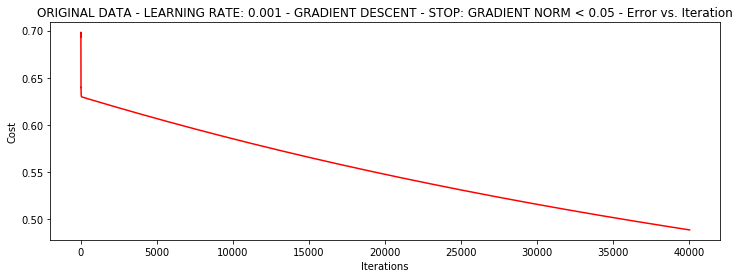

In [25]:
runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

### 对比不同的梯度下降方法

#### Stochastic descent

In [26]:
# runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

有点爆炸。。。很不稳定,再来试试把学习率调小一些

In [27]:
# runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

速度快，但稳定性差，需要很小的学习率

#### Mini-batch descent

In [28]:
# runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

浮动仍然比较大，我们来尝试下对数据进行标准化
将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1

梯度 [[-0.1        -0.28122914 -0.25098615]]
梯度 [[-0.099975   -0.28116031 -0.25092506]]
梯度 [[-0.09995001 -0.28109151 -0.250864  ]]
梯度 [[-0.09992502 -0.28102272 -0.25080294]]
梯度 [[-0.09990004 -0.28095395 -0.2507419 ]]
梯度 [[-0.09987506 -0.28088519 -0.25068088]]
梯度 [[-0.09985009 -0.28081645 -0.25061987]]
梯度 [[-0.09982513 -0.28074773 -0.25055888]]
梯度 [[-0.09980018 -0.28067903 -0.2504979 ]]
梯度 [[-0.09977523 -0.28061034 -0.25043694]]
梯度 [[-0.09975028 -0.28054167 -0.25037599]]
梯度 [[-0.09972534 -0.28047302 -0.25031505]]
梯度 [[-0.09970041 -0.28040438 -0.25025414]]
梯度 [[-0.09967549 -0.28033576 -0.25019323]]
梯度 [[-0.09965057 -0.28026716 -0.25013234]]
梯度 [[-0.09962566 -0.28019857 -0.25007147]]
梯度 [[-0.09960075 -0.28013    -0.25001061]]
梯度 [[-0.09957585 -0.28006145 -0.24994977]]
梯度 [[-0.09955096 -0.27999292 -0.24988894]]
梯度 [[-0.09952607 -0.2799244  -0.24982812]]
梯度 [[-0.09950119 -0.2798559  -0.24976732]]
梯度 [[-0.09947632 -0.27978741 -0.24970654]]
梯度 [[-0.09945145 -0.27971895 -0.24964577]]
梯度 [[-0.099

梯度 [[-0.09460862 -0.26637546 -0.23780066]]
梯度 [[-0.09458507 -0.26631052 -0.23774301]]
梯度 [[-0.09456153 -0.26624561 -0.23768537]]
梯度 [[-0.094538   -0.26618071 -0.23762775]]
梯度 [[-0.09451448 -0.26611583 -0.23757015]]
梯度 [[-0.09449096 -0.26605097 -0.23751256]]
梯度 [[-0.09446745 -0.26598613 -0.23745499]]
梯度 [[-0.09444395 -0.26592131 -0.23739743]]
梯度 [[-0.09442045 -0.2658565  -0.23733989]]
梯度 [[-0.09439696 -0.26579171 -0.23728237]]
梯度 [[-0.09437348 -0.26572694 -0.23722486]]
梯度 [[-0.09435    -0.26566219 -0.23716737]]
梯度 [[-0.09432653 -0.26559745 -0.2371099 ]]
梯度 [[-0.09430307 -0.26553274 -0.23705244]]
梯度 [[-0.09427962 -0.26546804 -0.23699499]]
梯度 [[-0.09425617 -0.26540336 -0.23693756]]
梯度 [[-0.09423272 -0.2653387  -0.23688015]]
梯度 [[-0.09420929 -0.26527405 -0.23682276]]
梯度 [[-0.09418586 -0.26520943 -0.23676538]]
梯度 [[-0.09416244 -0.26514482 -0.23670801]]
梯度 [[-0.09413902 -0.26508023 -0.23665066]]
梯度 [[-0.09411562 -0.26501566 -0.23659333]]
梯度 [[-0.09409222 -0.26495111 -0.23653602]]
梯度 [[-0.094

梯度 [[-0.08999258 -0.25362921 -0.22648169]]
梯度 [[-0.08997043 -0.25356797 -0.2264273 ]]
梯度 [[-0.08994829 -0.25350676 -0.22637292]]
梯度 [[-0.08992616 -0.25344556 -0.22631857]]
梯度 [[-0.08990404 -0.25338438 -0.22626423]]
梯度 [[-0.08988192 -0.25332322 -0.2262099 ]]
梯度 [[-0.08985981 -0.25326207 -0.2261556 ]]
梯度 [[-0.08983771 -0.25320095 -0.2261013 ]]
梯度 [[-0.08981561 -0.25313984 -0.22604703]]
梯度 [[-0.08979352 -0.25307876 -0.22599277]]
梯度 [[-0.08977144 -0.25301769 -0.22593853]]
梯度 [[-0.08974936 -0.25295664 -0.2258843 ]]
梯度 [[-0.0897273  -0.2528956  -0.22583009]]
梯度 [[-0.08970524 -0.25283459 -0.2257759 ]]
梯度 [[-0.08968318 -0.25277359 -0.22572172]]
梯度 [[-0.08966113 -0.25271262 -0.22566756]]
梯度 [[-0.08963909 -0.25265166 -0.22561341]]
梯度 [[-0.08961706 -0.25259072 -0.22555929]]
梯度 [[-0.08959504 -0.2525298  -0.22550517]]
梯度 [[-0.08957302 -0.2524689  -0.22545108]]
梯度 [[-0.089551   -0.25240801 -0.225397  ]]
梯度 [[-0.089529   -0.25234715 -0.22534293]]
梯度 [[-0.089507   -0.2522863  -0.22528889]]
梯度 [[-0.089

梯度 [[-0.08551694 -0.24123258 -0.21546865]]
梯度 [[-0.08549626 -0.24117521 -0.21541766]]
梯度 [[-0.08547559 -0.24111785 -0.21536669]]
梯度 [[-0.08545492 -0.2410605  -0.21531574]]
梯度 [[-0.08543427 -0.24100318 -0.21526481]]
梯度 [[-0.08541362 -0.24094588 -0.21521389]]
梯度 [[-0.08539298 -0.24088859 -0.21516298]]
梯度 [[-0.08537234 -0.24083132 -0.21511209]]
梯度 [[-0.08535171 -0.24077408 -0.21506122]]
梯度 [[-0.08533109 -0.24071684 -0.21501037]]
梯度 [[-0.08531048 -0.24065963 -0.21495953]]
梯度 [[-0.08528987 -0.24060244 -0.2149087 ]]
梯度 [[-0.08526927 -0.24054526 -0.2148579 ]]
梯度 [[-0.08524868 -0.24048811 -0.21480711]]
梯度 [[-0.08522809 -0.24043097 -0.21475633]]
梯度 [[-0.08520751 -0.24037385 -0.21470557]]
梯度 [[-0.08518694 -0.24031674 -0.21465483]]
梯度 [[-0.08516637 -0.24025966 -0.21460411]]
梯度 [[-0.08514582 -0.24020259 -0.2145534 ]]
梯度 [[-0.08512526 -0.24014555 -0.2145027 ]]
梯度 [[-0.08510472 -0.24008852 -0.21445202]]
梯度 [[-0.08508418 -0.24003151 -0.21440136]]
梯度 [[-0.08506365 -0.23997452 -0.21435072]]
梯度 [[-0.085

梯度 [[-0.08067753 -0.22777216 -0.20350478]]
梯度 [[-0.08065854 -0.2277192  -0.2034577 ]]
梯度 [[-0.08063955 -0.22766626 -0.20341063]]
梯度 [[-0.08062058 -0.22761333 -0.20336358]]
梯度 [[-0.0806016  -0.22756043 -0.20331654]]
梯度 [[-0.08058264 -0.22750754 -0.20326952]]
梯度 [[-0.08056368 -0.22745467 -0.20322251]]
梯度 [[-0.08054473 -0.22740181 -0.20317552]]
梯度 [[-0.08052578 -0.22734898 -0.20312855]]
梯度 [[-0.08050685 -0.22729616 -0.20308159]]
梯度 [[-0.08048792 -0.22724336 -0.20303464]]
梯度 [[-0.08046899 -0.22719057 -0.20298772]]
梯度 [[-0.08045007 -0.22713781 -0.2029408 ]]
梯度 [[-0.08043116 -0.22708506 -0.20289391]]
梯度 [[-0.08041226 -0.22703233 -0.20284703]]
梯度 [[-0.08039336 -0.22697962 -0.20280016]]
梯度 [[-0.08037447 -0.22692693 -0.20275331]]
梯度 [[-0.08035559 -0.22687425 -0.20270648]]
梯度 [[-0.08033671 -0.22682159 -0.20265966]]
梯度 [[-0.08031784 -0.22676895 -0.20261286]]
梯度 [[-0.08029898 -0.22671633 -0.20256607]]
梯度 [[-0.08028012 -0.22666372 -0.2025193 ]]
梯度 [[-0.08026127 -0.22661113 -0.20247254]]
梯度 [[-0.080

梯度 [[-0.0765375  -0.21619877 -0.19321298]]
梯度 [[-0.07652001 -0.21614974 -0.19316937]]
梯度 [[-0.07650252 -0.21610074 -0.19312578]]
梯度 [[-0.07648504 -0.21605175 -0.19308221]]
梯度 [[-0.07646757 -0.21600277 -0.19303864]]
梯度 [[-0.07645011 -0.21595382 -0.1929951 ]]
梯度 [[-0.07643265 -0.21590488 -0.19295157]]
梯度 [[-0.0764152  -0.21585596 -0.19290805]]
梯度 [[-0.07639775 -0.21580705 -0.19286455]]
梯度 [[-0.07638032 -0.21575816 -0.19282106]]
梯度 [[-0.07636288 -0.21570929 -0.19277759]]
梯度 [[-0.07634546 -0.21566043 -0.19273414]]
梯度 [[-0.07632804 -0.21561159 -0.19269069]]
梯度 [[-0.07631062 -0.21556277 -0.19264727]]
梯度 [[-0.07629322 -0.21551397 -0.19260385]]
梯度 [[-0.07627582 -0.21546518 -0.19256046]]
梯度 [[-0.07625842 -0.21541641 -0.19251708]]
梯度 [[-0.07624104 -0.21536765 -0.19247371]]
梯度 [[-0.07622365 -0.21531892 -0.19243036]]
梯度 [[-0.07620628 -0.2152702  -0.19238702]]
梯度 [[-0.07618891 -0.21522149 -0.1923437 ]]
梯度 [[-0.07617155 -0.2151728  -0.19230039]]
梯度 [[-0.07615419 -0.21512413 -0.19225709]]
梯度 [[-0.076

梯度 [[-0.07292223 -0.2060395  -0.18417468]]
梯度 [[-0.07290608 -0.205994   -0.18413419]]
梯度 [[-0.07288994 -0.20594852 -0.18409372]]
梯度 [[-0.07287381 -0.20590305 -0.18405326]]
梯度 [[-0.07285768 -0.2058576  -0.18401281]]
梯度 [[-0.07284155 -0.20581216 -0.18397238]]
梯度 [[-0.07282543 -0.20576674 -0.18393196]]
梯度 [[-0.07280932 -0.20572133 -0.18389156]]
梯度 [[-0.07279322 -0.20567595 -0.18385117]]
梯度 [[-0.07277712 -0.20563057 -0.18381079]]
梯度 [[-0.07276102 -0.20558521 -0.18377043]]
梯度 [[-0.07274494 -0.20553987 -0.18373008]]
梯度 [[-0.07272885 -0.20549455 -0.18368975]]
梯度 [[-0.07271278 -0.20544924 -0.18364943]]
梯度 [[-0.07269671 -0.20540394 -0.18360912]]
梯度 [[-0.07268064 -0.20535866 -0.18356883]]
梯度 [[-0.07266459 -0.2053134  -0.18352855]]
梯度 [[-0.07264854 -0.20526815 -0.18348829]]
梯度 [[-0.07263249 -0.20522292 -0.18344804]]
梯度 [[-0.07261645 -0.20517771 -0.18340781]]
梯度 [[-0.07260042 -0.20513251 -0.18336758]]
梯度 [[-0.07258439 -0.20508732 -0.18332738]]
梯度 [[-0.07256837 -0.20504216 -0.18328718]]
梯度 [[-0.072

梯度 [[-0.06845555 -0.19340743 -0.17293139]]
梯度 [[-0.06844108 -0.19336635 -0.17289482]]
梯度 [[-0.06842662 -0.19332529 -0.17285826]]
梯度 [[-0.06841216 -0.19328424 -0.17282171]]
梯度 [[-0.06839771 -0.19324321 -0.17278518]]
梯度 [[-0.06838326 -0.19320219 -0.17274866]]
梯度 [[-0.06836882 -0.19316118 -0.17271216]]
梯度 [[-0.06835439 -0.19312019 -0.17267566]]
梯度 [[-0.06833996 -0.19307921 -0.17263918]]
梯度 [[-0.06832553 -0.19303825 -0.17260272]]
梯度 [[-0.06831111 -0.1929973  -0.17256626]]
梯度 [[-0.0682967  -0.19295637 -0.17252982]]
梯度 [[-0.06828229 -0.19291545 -0.17249339]]
梯度 [[-0.06826789 -0.19287455 -0.17245697]]
梯度 [[-0.06825349 -0.19283366 -0.17242057]]
梯度 [[-0.0682391  -0.19279278 -0.17238418]]
梯度 [[-0.06822471 -0.19275192 -0.1723478 ]]
梯度 [[-0.06821033 -0.19271107 -0.17231143]]
梯度 [[-0.06819595 -0.19267024 -0.17227508]]
梯度 [[-0.06818158 -0.19262942 -0.17223874]]
梯度 [[-0.06816722 -0.19258861 -0.17220241]]
梯度 [[-0.06815286 -0.19254782 -0.17216609]]
梯度 [[-0.0681385  -0.19250705 -0.17212979]]
梯度 [[-0.068

梯度 [[-0.0635586  -0.17943842 -0.16049248]]
梯度 [[-0.06354597 -0.17940222 -0.16046024]]
梯度 [[-0.06353335 -0.17936604 -0.16042801]]
梯度 [[-0.06352073 -0.17932987 -0.1603958 ]]
梯度 [[-0.06350812 -0.17929371 -0.16036359]]
梯度 [[-0.06349552 -0.17925756 -0.1603314 ]]
梯度 [[-0.06348291 -0.17922143 -0.16029922]]
梯度 [[-0.06347032 -0.17918531 -0.16026705]]
梯度 [[-0.06345772 -0.1791492  -0.16023489]]
梯度 [[-0.06344514 -0.1791131  -0.16020274]]
梯度 [[-0.06343255 -0.17907702 -0.1601706 ]]
梯度 [[-0.06341998 -0.17904095 -0.16013847]]
梯度 [[-0.0634074  -0.17900489 -0.16010636]]
梯度 [[-0.06339483 -0.17896884 -0.16007425]]
梯度 [[-0.06338227 -0.17893281 -0.16004216]]
梯度 [[-0.06336971 -0.17889679 -0.16001008]]
梯度 [[-0.06335716 -0.17886078 -0.15997801]]
梯度 [[-0.06334461 -0.17882478 -0.15994595]]
梯度 [[-0.06333206 -0.1787888  -0.1599139 ]]
梯度 [[-0.06331952 -0.17875283 -0.15988186]]
梯度 [[-0.06330698 -0.17871687 -0.15984983]]
梯度 [[-0.06329445 -0.17868092 -0.15981782]]
梯度 [[-0.06328193 -0.17864499 -0.15978581]]
梯度 [[-0.063

梯度 [[-0.05911709 -0.16664056 -0.14909282]]
梯度 [[-0.05910611 -0.16660876 -0.14906449]]
梯度 [[-0.05909514 -0.16657698 -0.14903618]]
梯度 [[-0.05908417 -0.1665452  -0.14900787]]
梯度 [[-0.05907321 -0.16651344 -0.14897957]]
梯度 [[-0.05906225 -0.16648169 -0.14895129]]
梯度 [[-0.05905129 -0.16644995 -0.14892301]]
梯度 [[-0.05904034 -0.16641821 -0.14889474]]
梯度 [[-0.05902939 -0.16638649 -0.14886649]]
梯度 [[-0.05901844 -0.16635478 -0.14883824]]
梯度 [[-0.0590075  -0.16632308 -0.14881   ]]
梯度 [[-0.05899657 -0.1662914  -0.14878177]]
梯度 [[-0.05898564 -0.16625972 -0.14875355]]
梯度 [[-0.05897471 -0.16622805 -0.14872534]]
梯度 [[-0.05896378 -0.16619639 -0.14869714]]
梯度 [[-0.05895286 -0.16616475 -0.14866895]]
梯度 [[-0.05894195 -0.16613311 -0.14864077]]
梯度 [[-0.05893103 -0.16610149 -0.1486126 ]]
梯度 [[-0.05892012 -0.16606988 -0.14858444]]
梯度 [[-0.05890922 -0.16603827 -0.14855628]]
梯度 [[-0.05889832 -0.16600668 -0.14852814]]
梯度 [[-0.05888742 -0.1659751  -0.14850001]]
梯度 [[-0.05887653 -0.16594353 -0.14847188]]
梯度 [[-0.058

梯度 [[-0.05677599 -0.15983887 -0.14303363]]
梯度 [[-0.05676586 -0.15980937 -0.14300735]]
梯度 [[-0.05675574 -0.15977987 -0.14298107]]
梯度 [[-0.05674562 -0.15975039 -0.14295481]]
梯度 [[-0.05673551 -0.15972091 -0.14292855]]
梯度 [[-0.0567254  -0.15969145 -0.1429023 ]]
梯度 [[-0.05671529 -0.15966199 -0.14287606]]
梯度 [[-0.05670519 -0.15963254 -0.14284983]]
梯度 [[-0.05669509 -0.15960311 -0.14282361]]
梯度 [[-0.056685   -0.15957368 -0.14279739]]
梯度 [[-0.05667491 -0.15954426 -0.14277119]]
梯度 [[-0.05666482 -0.15951486 -0.14274499]]
梯度 [[-0.05665473 -0.15948546 -0.1427188 ]]
梯度 [[-0.05664465 -0.15945607 -0.14269262]]
梯度 [[-0.05663458 -0.1594267  -0.14266645]]
梯度 [[-0.0566245  -0.15939733 -0.14264029]]
梯度 [[-0.05661443 -0.15936797 -0.14261414]]
梯度 [[-0.05660437 -0.15933862 -0.142588  ]]
梯度 [[-0.0565943  -0.15930929 -0.14256186]]
梯度 [[-0.05658425 -0.15927996 -0.14253573]]
梯度 [[-0.05657419 -0.15925064 -0.14250962]]
梯度 [[-0.05656414 -0.15922133 -0.14248351]]
梯度 [[-0.05655409 -0.15919203 -0.14245741]]
梯度 [[-0.056

梯度 [[-0.0533464  -0.14979681 -0.13408834]]
梯度 [[-0.0533375 -0.1497706 -0.134065 ]]
梯度 [[-0.05332859 -0.14974441 -0.13404167]]
梯度 [[-0.05331969 -0.14971822 -0.13401835]]
梯度 [[-0.0533108  -0.14969204 -0.13399503]]
梯度 [[-0.05330191 -0.14966587 -0.13397172]]
梯度 [[-0.05329302 -0.14963971 -0.13394842]]
梯度 [[-0.05328413 -0.14961356 -0.13392513]]
梯度 [[-0.05327525 -0.14958742 -0.13390184]]
梯度 [[-0.05326637 -0.14956128 -0.13387856]]
梯度 [[-0.05325749 -0.14953515 -0.13385529]]
梯度 [[-0.05324861 -0.14950903 -0.13383202]]
梯度 [[-0.05323974 -0.14948292 -0.13380877]]
梯度 [[-0.05323087 -0.14945682 -0.13378552]]
梯度 [[-0.05322201 -0.14943073 -0.13376228]]
梯度 [[-0.05321315 -0.14940464 -0.13373904]]
梯度 [[-0.05320429 -0.14937856 -0.13371582]]
梯度 [[-0.05319543 -0.14935249 -0.1336926 ]]
梯度 [[-0.05318658 -0.14932643 -0.13366939]]
梯度 [[-0.05317773 -0.14930038 -0.13364618]]
梯度 [[-0.05316888 -0.14927434 -0.13362299]]
梯度 [[-0.05316004 -0.1492483  -0.1335998 ]]
梯度 [[-0.0531512  -0.14922228 -0.13357662]]
梯度 [[-0.053142

梯度 [[-0.05109121 -0.14313853 -0.12815848]]
梯度 [[-0.05108308 -0.14311445 -0.12813704]]
梯度 [[-0.05107495 -0.14309038 -0.12811561]]
梯度 [[-0.05106683 -0.14306632 -0.12809418]]
梯度 [[-0.05105871 -0.14304226 -0.12807276]]
梯度 [[-0.0510506  -0.14301821 -0.12805134]]
梯度 [[-0.05104248 -0.14299417 -0.12802994]]
梯度 [[-0.05103437 -0.14297014 -0.12800853]]
梯度 [[-0.05102626 -0.14294611 -0.12798714]]
梯度 [[-0.05101816 -0.14292209 -0.12796575]]
梯度 [[-0.05101006 -0.14289808 -0.12794437]]
梯度 [[-0.05100196 -0.14287408 -0.127923  ]]
梯度 [[-0.05099386 -0.14285009 -0.12790163]]
梯度 [[-0.05098577 -0.1428261  -0.12788027]]
梯度 [[-0.05097767 -0.14280212 -0.12785892]]
梯度 [[-0.05096958 -0.14277814 -0.12783757]]
梯度 [[-0.0509615  -0.14275418 -0.12781623]]
梯度 [[-0.05095342 -0.14273022 -0.12779489]]
梯度 [[-0.05094533 -0.14270627 -0.12777357]]
梯度 [[-0.05093726 -0.14268233 -0.12775225]]
梯度 [[-0.05092918 -0.14265839 -0.12773093]]
梯度 [[-0.05092111 -0.14263446 -0.12770963]]
梯度 [[-0.05091304 -0.14261054 -0.12768833]]
梯度 [[-0.050

梯度 [[-0.04863247 -0.13582559 -0.12164768]]
梯度 [[-0.04862516 -0.13580378 -0.12162827]]
梯度 [[-0.04861786 -0.13578198 -0.12160886]]
梯度 [[-0.04861056 -0.13576018 -0.12158945]]
梯度 [[-0.04860326 -0.13573838 -0.12157005]]
梯度 [[-0.04859597 -0.1357166  -0.12155066]]
梯度 [[-0.04858868 -0.13569482 -0.12153127]]
梯度 [[-0.04858139 -0.13567304 -0.12151189]]
梯度 [[-0.0485741  -0.13565128 -0.12149252]]
梯度 [[-0.04856681 -0.13562951 -0.12147315]]
梯度 [[-0.04855953 -0.13560776 -0.12145379]]
梯度 [[-0.04855225 -0.13558601 -0.12143443]]
梯度 [[-0.04854497 -0.13556427 -0.12141508]]
梯度 [[-0.04853769 -0.13554254 -0.12139573]]
梯度 [[-0.04853042 -0.13552081 -0.12137639]]
梯度 [[-0.04852315 -0.13549909 -0.12135706]]
梯度 [[-0.04851588 -0.13547738 -0.12133773]]
梯度 [[-0.04850861 -0.13545567 -0.12131841]]
梯度 [[-0.04850135 -0.13543397 -0.1212991 ]]
梯度 [[-0.04849409 -0.13541228 -0.12127979]]
梯度 [[-0.04848683 -0.13539059 -0.12126048]]
梯度 [[-0.04847957 -0.13536891 -0.12124118]]
梯度 [[-0.04847232 -0.13534723 -0.12122189]]
梯度 [[-0.048

梯度 [[-0.04634621 -0.1289722  -0.11554897]]
梯度 [[-0.04633964 -0.12895243 -0.11553139]]
梯度 [[-0.04633308 -0.12893268 -0.11551381]]
梯度 [[-0.04632652 -0.12891293 -0.11549624]]
梯度 [[-0.04631995 -0.12889318 -0.11547867]]
梯度 [[-0.0463134  -0.12887344 -0.11546111]]
梯度 [[-0.04630684 -0.12885371 -0.11544356]]
梯度 [[-0.04630029 -0.12883398 -0.11542601]]
梯度 [[-0.04629373 -0.12881426 -0.11540846]]
梯度 [[-0.04628718 -0.12879454 -0.11539093]]
梯度 [[-0.04628063 -0.12877483 -0.11537339]]
梯度 [[-0.04627409 -0.12875513 -0.11535586]]
梯度 [[-0.04626754 -0.12873543 -0.11533834]]
梯度 [[-0.046261   -0.12871574 -0.11532082]]
梯度 [[-0.04625446 -0.12869605 -0.11530331]]
梯度 [[-0.04624792 -0.12867637 -0.1152858 ]]
梯度 [[-0.04624139 -0.12865669 -0.11526829]]
梯度 [[-0.04623485 -0.12863702 -0.1152508 ]]
梯度 [[-0.04622832 -0.12861736 -0.1152333 ]]
梯度 [[-0.04622179 -0.1285977  -0.11521582]]
梯度 [[-0.04621527 -0.12857805 -0.11519833]]
梯度 [[-0.04620874 -0.1285584  -0.11518086]]
梯度 [[-0.04620222 -0.12853876 -0.11516338]]
梯度 [[-0.046

梯度 [[-0.04508537 -0.12516957 -0.1121667 ]]
梯度 [[-0.0450792  -0.12515091 -0.11215011]]
梯度 [[-0.04507303 -0.12513226 -0.11213353]]
梯度 [[-0.04506686 -0.12511361 -0.11211695]]
梯度 [[-0.04506069 -0.12509497 -0.11210037]]
梯度 [[-0.04505453 -0.12507634 -0.1120838 ]]
梯度 [[-0.04504837 -0.12505771 -0.11206723]]
梯度 [[-0.04504221 -0.12503908 -0.11205067]]
梯度 [[-0.04503605 -0.12502046 -0.11203411]]
梯度 [[-0.04502989 -0.12500185 -0.11201756]]
梯度 [[-0.04502373 -0.12498324 -0.11200101]]
梯度 [[-0.04501758 -0.12496464 -0.11198446]]
梯度 [[-0.04501143 -0.12494604 -0.11196793]]
梯度 [[-0.04500528 -0.12492744 -0.11195139]]
梯度 [[-0.04499913 -0.12490886 -0.11193486]]
梯度 [[-0.04499299 -0.12489027 -0.11191834]]
梯度 [[-0.04498684 -0.1248717  -0.11190182]]
梯度 [[-0.0449807  -0.12485313 -0.1118853 ]]
梯度 [[-0.04497456 -0.12483456 -0.11186879]]
梯度 [[-0.04496842 -0.124816   -0.11185229]]
梯度 [[-0.04496229 -0.12479744 -0.11183579]]
梯度 [[-0.04495615 -0.12477889 -0.11181929]]
梯度 [[-0.04495002 -0.12476035 -0.1118028 ]]
梯度 [[-0.044

梯度 [[-0.04391106 -0.12161268 -0.10900428]]
梯度 [[-0.04390524 -0.12159503 -0.1089886 ]]
梯度 [[-0.04389943 -0.12157739 -0.10897292]]
梯度 [[-0.04389362 -0.12155975 -0.10895724]]
梯度 [[-0.04388781 -0.12154212 -0.10894157]]
梯度 [[-0.04388201 -0.1215245  -0.1089259 ]]
梯度 [[-0.0438762  -0.12150688 -0.10891024]]
梯度 [[-0.0438704  -0.12148926 -0.10889458]]
梯度 [[-0.0438646  -0.12147165 -0.10887893]]
梯度 [[-0.0438588  -0.12145404 -0.10886328]]
梯度 [[-0.043853   -0.12143644 -0.10884763]]
梯度 [[-0.04384721 -0.12141885 -0.10883199]]
梯度 [[-0.04384141 -0.12140126 -0.10881635]]
梯度 [[-0.04383562 -0.12138367 -0.10880072]]
梯度 [[-0.04382983 -0.12136609 -0.10878509]]
梯度 [[-0.04382404 -0.12134851 -0.10876947]]
梯度 [[-0.04381825 -0.12133094 -0.10875385]]
梯度 [[-0.04381247 -0.12131337 -0.10873824]]
梯度 [[-0.04380668 -0.12129581 -0.10872263]]
梯度 [[-0.0438009  -0.12127826 -0.10870702]]
梯度 [[-0.04379512 -0.1212607  -0.10869142]]
梯度 [[-0.04378934 -0.12124316 -0.10867582]]
梯度 [[-0.04378356 -0.12122562 -0.10866023]]
梯度 [[-0.043

梯度 [[-0.04278233 -0.1181798  -0.10595346]]
梯度 [[-0.04277686 -0.11816311 -0.10593863]]
梯度 [[-0.04277138 -0.11814642 -0.1059238 ]]
梯度 [[-0.04276591 -0.11812974 -0.10590898]]
梯度 [[-0.04276044 -0.11811306 -0.10589416]]
梯度 [[-0.04275497 -0.11809639 -0.10587935]]
梯度 [[-0.0427495  -0.11807972 -0.10586454]]
梯度 [[-0.04274403 -0.11806306 -0.10584974]]
梯度 [[-0.04273857 -0.1180464  -0.10583494]]
梯度 [[-0.0427331  -0.11802975 -0.10582014]]
梯度 [[-0.04272764 -0.1180131  -0.10580535]]
梯度 [[-0.04272218 -0.11799645 -0.10579056]]
梯度 [[-0.04271672 -0.11797981 -0.10577577]]
梯度 [[-0.04271126 -0.11796318 -0.10576099]]
梯度 [[-0.04270581 -0.11794655 -0.10574622]]
梯度 [[-0.04270035 -0.11792992 -0.10573144]]
梯度 [[-0.0426949  -0.1179133  -0.10571668]]
梯度 [[-0.04268945 -0.11789668 -0.10570191]]
梯度 [[-0.042684   -0.11788007 -0.10568715]]
梯度 [[-0.04267855 -0.11786346 -0.1056724 ]]
梯度 [[-0.04267311 -0.11784685 -0.10565764]]
梯度 [[-0.04266766 -0.11783025 -0.1056429 ]]
梯度 [[-0.04266222 -0.11781366 -0.10562815]]
梯度 [[-0.042

梯度 [[-0.04092486 -0.11250008 -0.10090916]]
梯度 [[-0.04091992 -0.11248492 -0.1008957 ]]
梯度 [[-0.04091498 -0.11246977 -0.10088225]]
梯度 [[-0.04091005 -0.11245461 -0.1008688 ]]
梯度 [[-0.04090511 -0.11243947 -0.10085536]]
梯度 [[-0.04090017 -0.11242432 -0.10084191]]
梯度 [[-0.04089524 -0.11240919 -0.10082847]]
梯度 [[-0.04089031 -0.11239405 -0.10081504]]
梯度 [[-0.04088538 -0.11237892 -0.10080161]]
梯度 [[-0.04088045 -0.11236379 -0.10078818]]
梯度 [[-0.04087552 -0.11234867 -0.10077475]]
梯度 [[-0.04087059 -0.11233355 -0.10076133]]
梯度 [[-0.04086567 -0.11231844 -0.10074792]]
梯度 [[-0.04086074 -0.11230333 -0.1007345 ]]
梯度 [[-0.04085582 -0.11228822 -0.10072109]]
梯度 [[-0.0408509  -0.11227312 -0.10070769]]
梯度 [[-0.04084598 -0.11225802 -0.10069428]]
梯度 [[-0.04084106 -0.11224292 -0.10068088]]
梯度 [[-0.04083614 -0.11222783 -0.10066749]]
梯度 [[-0.04083123 -0.11221274 -0.10065409]]
梯度 [[-0.04082631 -0.11219766 -0.10064071]]
梯度 [[-0.0408214  -0.11218258 -0.10062732]]
梯度 [[-0.04081649 -0.11216751 -0.10061394]]
梯度 [[-0.040

array([[0.3080807 , 0.86494967, 0.77367651]])

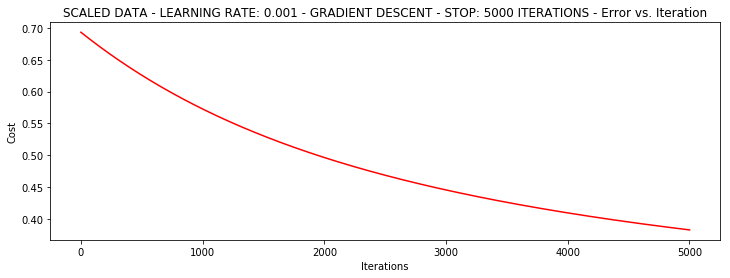

In [29]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

它好多了！原始数据，只能达到达到0.61，而我们得到了0.38个在这里！
所以对数据做预处理是非常重要的

In [30]:
# runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

更多的迭代次数会使得损失下降的更多！

In [31]:
# theta = runExpe(scaled_data, theta, 1, STOP_GRAD, thresh=0.002/5, alpha=0.001)

随机梯度下降更快，但是我们需要迭代的次数也需要更多，所以还是用batch的比较合适！！！

In [32]:
# runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.002*2, alpha=0.001)

## 精度

In [33]:
#设定阈值
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

In [34]:
print(theta)
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
print(correct)
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

[[0. 0. 0.]]
[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
accuracy = 60%
